# Network Buffer for Charlotte, NC

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [1]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [2]:
#conda activate geo_env


In [3]:
#python -m ipykernel install --user --name geo_env

In [4]:
import geopandas as gpd

In [5]:
import pandas as pd
from functools import reduce

In [6]:
import sys
'geopandas' in sys.modules

True

In [7]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

In [9]:
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [10]:
#buffer size in meter
#size=804.672 #in m, this input is also required for area conversation

In [663]:
# Import streetlight and strava
ss=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
ss=ss[ss["region"]=="Charlotte"]
ss=ss[ss["year"]==2019]
ss=ss.drop_duplicates(subset='site_id')
ss.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
166  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
167  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
168  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
169  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
170  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

          AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
166  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
167  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
168   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
169  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
170   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                               comment  
166             On top of bridge; Sidewalk + bike lane  
167  Sidewalk + bike lane, Street is divided in str...  
168  Separated Sidewalk North, divided in strava-os...  
169                                                NaN  
170                                                NaN

In [664]:
# Get the count location 
c1=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Charlotte"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
#c1=c1[c1["sensor_type"]=="permanent"]
c1.head(5)
# #print(c1.shape)

site_id  osm_id_sensor
414  P001CHA     55186886.0
415  P002CHA     16701397.0
416  P003CHA    493705004.0
417  P004CHA     34764115.0
418  P005CHA    322993730.0

In [665]:
# Import the non-fill buffer shape file
nf=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Charlotte-net-buff-60m-2019.shp")
nf.head(5)

buff_dist  site_id                                           geometry
0       2.0  P001CHA  POLYGON ((440897.711 160720.453, 440892.093 16...
1       1.5  P001CHA  POLYGON ((440788.242 161721.675, 440785.185 16...
2       1.0  P001CHA  POLYGON ((439621.439 162220.093, 439620.560 16...
3      0.75  P001CHA  POLYGON ((439674.315 162575.438, 439672.862 16...
4       0.5  P001CHA  POLYGON ((440174.178 162989.805, 440174.751 16...

In [666]:
# merge by site_id
ss1=pd.merge(ss,c1, right_on='site_id', left_on='site_id',how='inner')
ss1.head(5)

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
2  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
2   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
3  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
4   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                             comment  osm_id_sensor  
0             On top of bridge; Sidewalk + bike lane     55186886.0  
1  Sidewalk + bike lane, Street is divided in str...     16701397.0  
2  Separated Sidewalk North, divided in strava-os...    493705004.0  
3                                                NaN     34764115.0  
4                                                NaN    322993730.0

In [667]:
nf1=pd.merge(ss1,nf, left_on='site_id', right_on='site_id',how='inner')
nf1 = gpd.GeoDataFrame(nf1)
nf1.head(5)

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor buff_dist  \
0  On top of bridge; Sidewalk + bike lane     55186886.0       2.0   
1  On top of bridge; Sidewalk + bike lane     55186886.0       1.5   
2  On top of bridge; Sidewalk + bike lane     55186886.0       1.0   
3  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
4  On top of bridge; Sidewalk + bike lane     55186886.0       0.5   

                                            geometry  
0  POLYGON ((440897.711 160720.453, 440892.093 16...  
1  POLYGON ((440788.242 161721.675, 440785.185 16...  
2  POLYGON ((439621.439 162220.093, 439620.560 16...  
3  POLYGON ((439674.315 162575.438, 439672.862 16...  
4  POLYGON ((440174.178 162989.805, 440174.751 16...

In [668]:
emerging_data=ss1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   1236.0
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740    740.0
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205    328.0
3   34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   2049.0
4  322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   1443.0

# Change your Buffer size Here

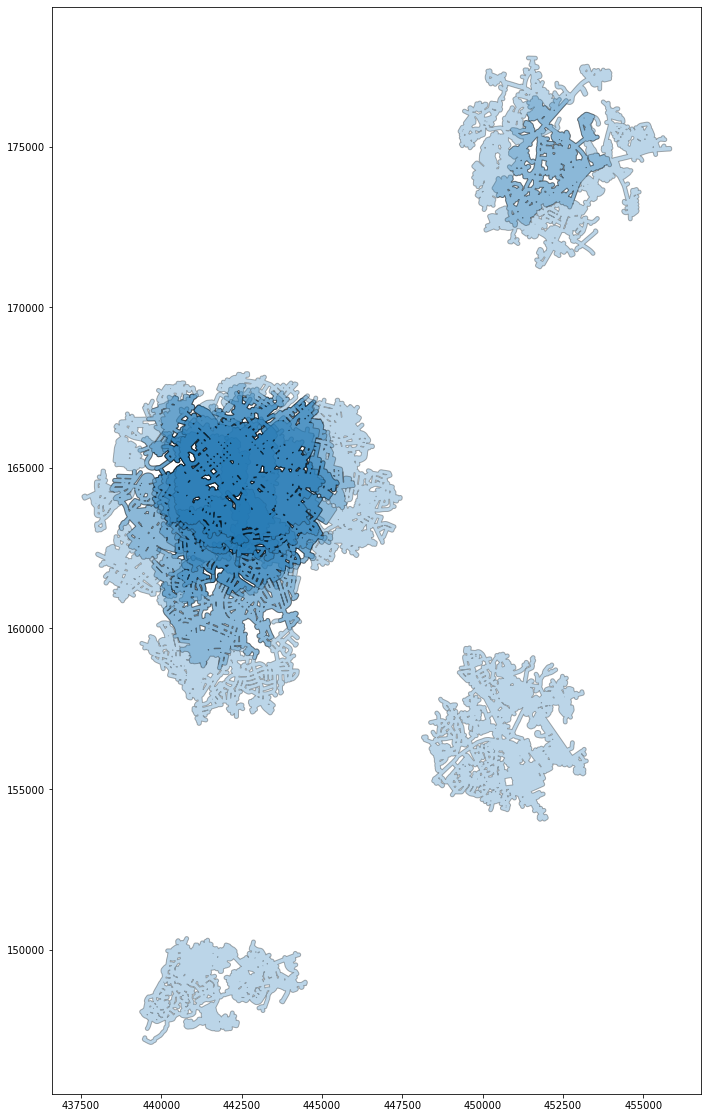

In [671]:
nf2=nf1[nf1['region']=='Charlotte']
nf3=nf2[nf1['buff_dist']=='2.0']
ax = nf3.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [672]:
nf3.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0   393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
7   160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
14   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
21  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
28   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                                           geometry  
0        2.0  POLYGON ((440897.711 160720.453, 440892.093 16...  
7        2.0  POLYGON ((443453.241 162049.175, 443453.674 16...  
14       2.0  POLYGON ((441235.371 157020.639, 441234.600 15...  
21       2.0  POLYGON ((442384.419 162107.353, 442378.535 16...  
28       2.0  POLYGON ((442137.092 161061.125, 442136.991 16...

# Input the Strava Annual Network shape file here

In [673]:
strava=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Charlotte_strava_osm_buffer_3mi.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=3358)

epsg:4326


# Input Bike share data here

bs1=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_01.csv")
bs2=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_02.csv")
bs3=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_03.csv")
bs4=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_04.csv")
bs5=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_05.csv")
bs6=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_06.csv")
bs7=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_07.csv")
bs8=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_08.csv")
bs9=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_09.csv")
bs10=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_10.csv")
bs11=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_11.csv")
bs12=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/2019_12.csv")
bs_all=pd.concat([bs1,bs2,bs3,bs4,bs5,bs6,bs7,bs8,bs9,bs10,bs11,bs12],axis=0,ignore_index=True)
bs_all.head(5)

# Input OSM file here

In [23]:
# Input OSM land use shape file here
luse = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
#place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

# Import OSM Building shape file to get CBD (City Hall)

In [24]:
# Input OSM road shape file here
building = gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [25]:
# Input the block group shape file of your study area here
bg=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/NC_blck_grp_2019.shp")

# Input Race csv file here
race=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/education.csv")

# Import school enrollmemt 
scll=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/School Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Bike_commute_nc_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [26]:
# Input job csv file here
Number_job=pd.read_csv("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/nc_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/tabblock2010_37_pophu.shp")


# Import slope file

In [27]:
eu = rasterio.open('E:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/Charlotte.img')

# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [674]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')

In [675]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

<AxesSubplot:>

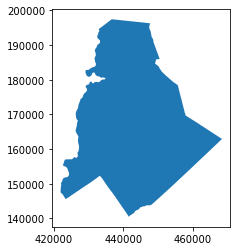

In [676]:
region = "Charlotte"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

<AxesSubplot:>

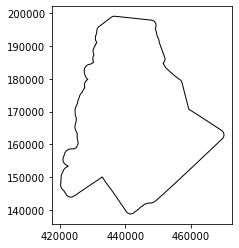

In [677]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

<AxesSubplot:>

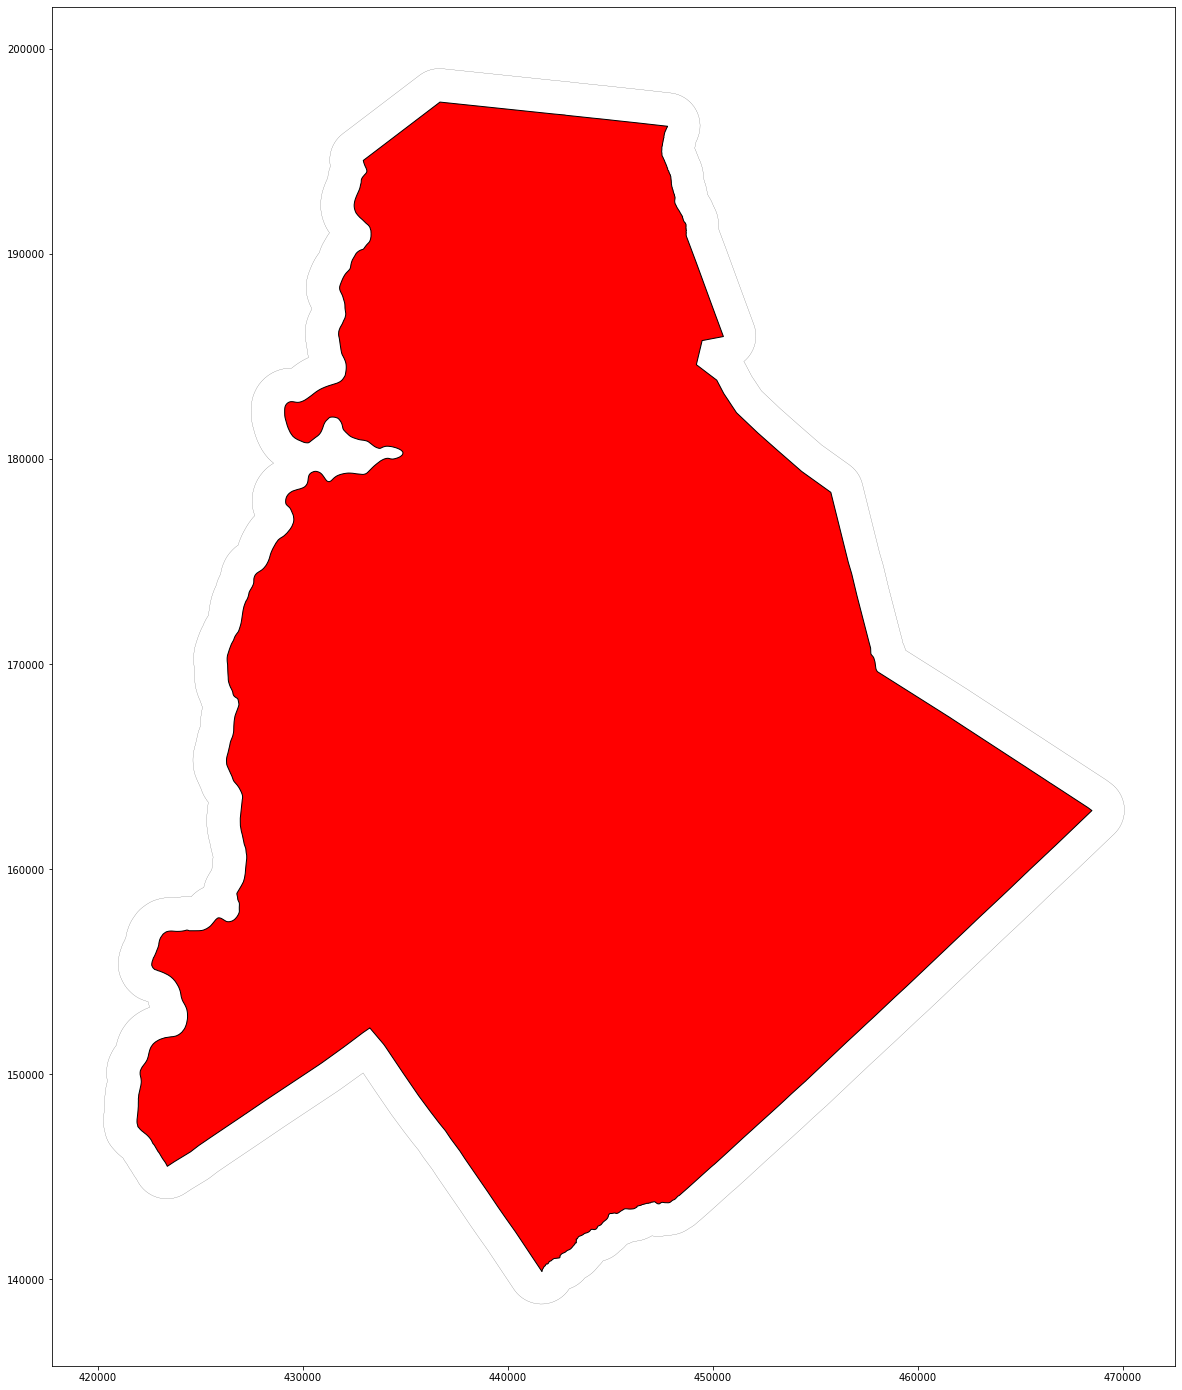

In [678]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the counter location file as gdf

In [679]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor buff_dist  \
0  On top of bridge; Sidewalk + bike lane     55186886.0       2.0   
1  On top of bridge; Sidewalk + bike lane     55186886.0       1.5   
2  On top of bridge; Sidewalk + bike lane     55186886.0       1.0   
3  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
4  On top of bridge; Sidewalk + bike lane     55186886.0       0.5   

                     geometry  
0  POINT (-80.86114 35.20964)  
1  POINT (-80.86114 35.20964)  
2  POINT (-80.86114 35.20964)  
3  POINT (-80.86114 35.20964)  
4  POINT (-80.86114 35.20964)

In [680]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=3358)
eco_proj.head()

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor buff_dist  \
0  On top of bridge; Sidewalk + bike lane     55186886.0       2.0   
1  On top of bridge; Sidewalk + bike lane     55186886.0       1.5   
2  On top of bridge; Sidewalk + bike lane     55186886.0       1.0   
3  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
4  On top of bridge; Sidewalk + bike lane     55186886.0       0.5   

                        geometry  
0  POINT (440167.090 163506.089)  
1  POINT (440167.090 163506.089)  
2  POINT (440167.090 163506.089)  
3  POINT (440167.090 163506.089)  
4  POINT (440167.090 163506.089)

In [681]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   

                                  comment  osm_id_sensor buff_dist  \
0  On top of bridge; Sidewalk + bike lane     55186886.0       2.0   
1  On top of bridge; Sidewalk + bike lane     55186886.0       1.5   
2  On top of bridge; Sidewalk + bike lane     55186886.0       1.0   
3  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
4  On top of bridge; Sidewalk + bike lane     55186886.0       0.5   

                        geometry  
0  POINT (440167.090 163506.089)  
1  POINT (440167.090 163506.089)  
2  POINT (440167.090 163506.089)  
3  POINT (440167.090 163506.089)  
4  POINT (440167.090 163506.089)

# Filter the location by Extended Study area Boundary

In [682]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

site_id                               site_name sensor_type  year  \
84  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   
86  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   
87  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   
88  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   
90  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   

       region  travel_pattern      AADBT   stv_adb  stv_c_adb  stl_raw  \
84  Charlotte             1.0  34.413822  4.917808   2.684932    318.0   
86  Charlotte             1.0  34.413822  4.917808   2.684932    318.0   
87  Charlotte             1.0  34.413822  4.917808   2.684932    318.0   
88  Charlotte             1.0  34.413822  4.917808   2.684932    318.0   
90  Charlotte             1.0  34.413822  4.917808   2.684932    318.0   

     latitude  longitude comment  osm_id_sensor buff_dist  \
84  35.224233 -80.835569     NaN     51062797.0       2.0   
86  35.224233 -80.835569     NaN     51062797.0       1.0   
87  35.224233 -80.835569     NaN     51062797.0      0.75   
88  35.224233 -80.835569     NaN     51062797.0       0.5   
90  35.224233 -80.835569     NaN     51062797.0       0.1   

                         geometry  
84  POINT (442524.665 165081.281)  
86  POINT (442524.665 165081.281)  
87  POINT (442524.665 165081.281)  
88  POINT (442524.665 165081.281)  
90  POINT (442524.665 165081.281)

In [683]:
count_station=ecoshort.copy()

In [684]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort

site_id                               site_name sensor_type  year  \
84  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   
39  P006CHA      University City Boulevard Sidepath   permanent  2019   
64  P012CHA     Mallard Creek Gwy at Toby/Kirk Farm   permanent  2019   
42  P007CHA                Four Mile Creek Greenway   permanent  2019   
74  P013CHA                 McAlpine Creek Greenway   permanent  2019   
16  P003CHA                           Selwyn Avenue   permanent  2019   
50  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
1   P001CHA                         Blue Line Trail   permanent  2019   
31  P005CHA                        Stonewall Street   permanent  2019   
62  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   
10  P002CHA                               Pecan Ave   permanent  2019   
82  S001CHA                7th St east of M. Street  short-term  2019   
21  P004CHA                      South Tryon Street   permanent  2019   

       region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
84  Charlotte             1.0   34.413822   4.917808   2.684932    318.0   
39  Charlotte             2.0   45.565476   0.082192   0.027397    110.0   
64  Charlotte             3.0  396.686309   3.794521   0.534247    527.0   
42  Charlotte             3.0  585.875325   4.753425   0.739726    795.0   
74  Charlotte             3.0  469.027381   6.041096   0.561644    620.0   
16  Charlotte             3.0   39.364881  15.465753   2.945205    328.0   
50  Charlotte             3.0  727.206548  14.178082   4.438356    574.0   
1   Charlotte             3.0  393.654456  18.547945   5.958904   1236.0   
31  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0   
62  Charlotte             3.0  687.448701  14.465753   4.534247    907.0   
10  Charlotte             3.0  160.742460  16.082192   4.602740    740.0   
82  Charlotte             3.0   21.728088  11.821918   5.397260    996.0   
21  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0   

     latitude  longitude                                            comment  \
84  35.224233 -80.835569                                                NaN   
39  35.306830 -80.722970                                                NaN   
64  35.319003 -80.734167                                                NaN   
42  35.074886 -80.839853                                                NaN   
74  35.148433 -80.743575                                                NaN   
16  35.178440 -80.837250  Separated Sidewalk North, divided in strava-os...   
50  35.189526 -80.843660                                                NaN   
1   35.209640 -80.861140             On top of bridge; Sidewalk + bike lane   
31  35.214680 -80.838340                                                NaN   
62  35.216025 -80.834937                                                NaN   
10  35.218280 -80.814360  Sidewalk + bike lane, Street is divided in str...   
82  35.221863 -80.830717                                                NaN   
21  35.221640 -80.850360                                                NaN   

    osm_id_sensor buff_dist                       geometry  
84     51062797.0       2.0  POINT (442524.665 165081.281)  
39    492433486.0       0.5  POINT (452931.589 174058.792)  
64    169185539.0       1.5  POINT (451937.166 175426.726)  
42    156886419.0       2.0  POINT (441827.732 148524.391)  
74     16694967.0       0.5  POINT (450749.567 156523.166)  
16    493705004.0       1.0  POINT (442277.682 160005.150)  
50    235076258.0       1.5  POINT (441716.811 161245.530)  
1      55186886.0       1.5  POINT (440167.090 163506.089)  
31    322993730.0      0.75  POINT (442252.867 164026.406)  
62    422138643.0       0.1  POINT (442565.399 164169.850)  
10     16701397.0      0.75  POINT (444442.876 164385.527)  
82     51062957.0      0.25  POINT (442961.429 164810.274)  
21     34764115.

<AxesSubplot:>

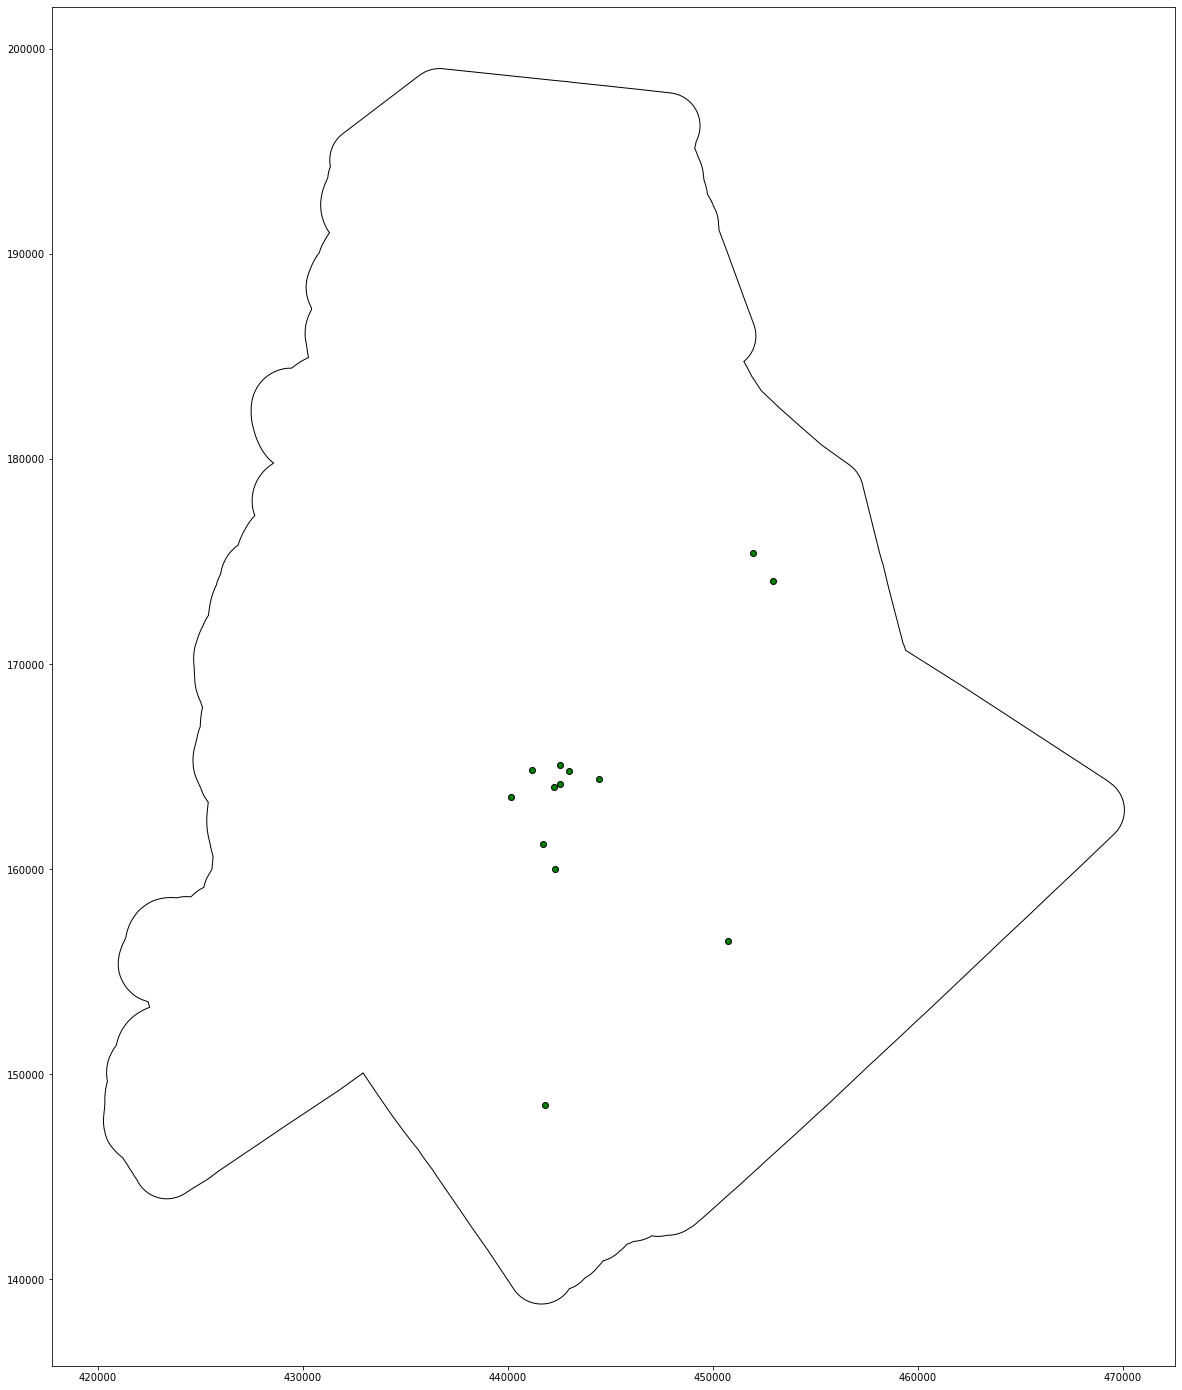

In [685]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [686]:
# Buffer file
gdf1=nf3
gdf1['buffer_area']=gdf1.area*3.86102e-7 # in mile square
gdf1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0   393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
7   160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
14   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
21  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
28   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                                           geometry  buffer_area  
0        2.0  POLYGON ((440897.711 160720.453, 440892.093 16...     7.064167  
7        2.0  POLYGON ((443453.241 162049.175, 443453.674 16...     7.855091  
14       2.0  POLYGON ((441235.371 157020.639, 441234.600 15...     6.533043  
21       2.0  POLYGON ((442384.419 162107.353, 442378.535 16...     7.930375  
28       2.0  POLYGON ((442137.092 161061.125, 442136.991 16...     7.981257

In [687]:
#gdf1 = ecoshort.copy()
#gdf1['geometry'] = gdf1['geometry'].buffer(size)
#gdf1

In [688]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

#https://geopandas.org/gallery/plotting_basemap_background.html

In [689]:
import contextily as ctx

In [690]:
print(gdf1.crs)

epsg:3358


In [691]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =3358 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:3358") # provided by PSU
gdfm = gdfm.to_crs(epsg=3358) # This EPSG just for ploting

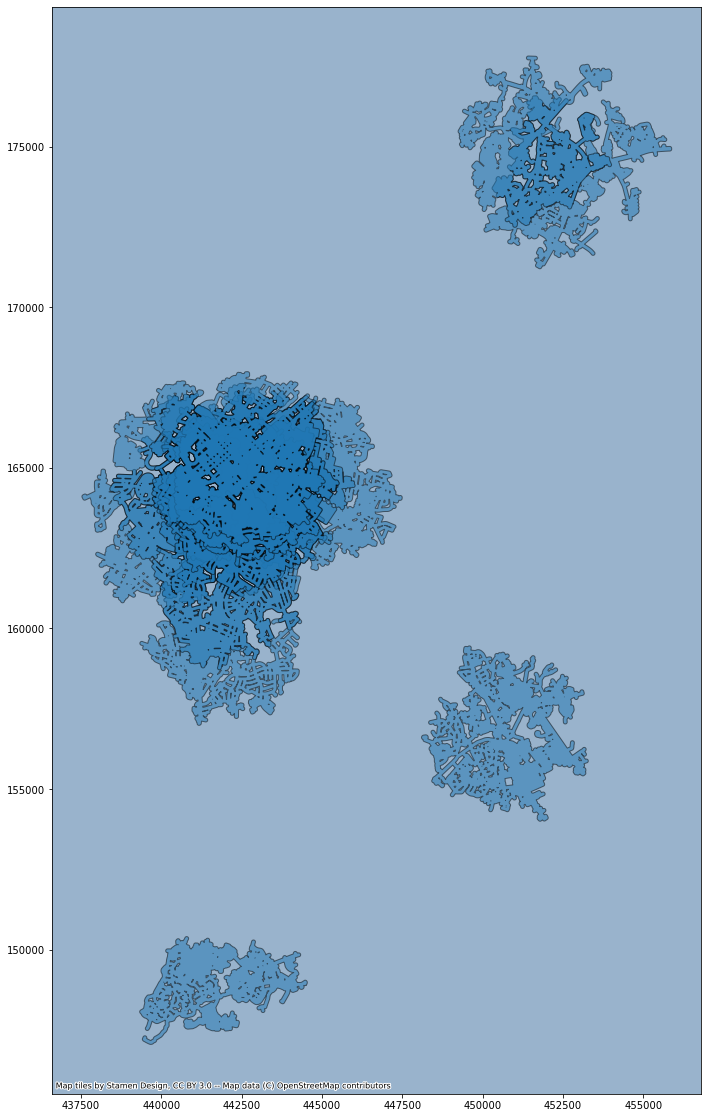

In [692]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

bs_all.head(5)

# BS Origin

In [982]:
# Origin
#bso = gpd.GeoDataFrame(
#    bs_all, geometry=gpd.points_from_xy(bs_all.StartLongitude, bs_all.StartLatitude))
#bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
#bso.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [983]:
# set the co-ordinate system first
#bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bso1_proj = bso1.to_crs(epsg=2845)
#bso1_proj.head(5)

In [984]:
# Clip the data using GeoPandas clip
#bso1_clip = gpd.clip(bso1_proj, gdf1)
#bso1_clip.head(5)

In [985]:
# int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
# int_bso.head(5)

In [986]:
#int_bso.geometry.plot()
#ax = gdf1.plot(figsize=(40, 30))
#int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [987]:
#output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_origin.columns=["osm_id","Bike Share Origin"]
#output_origin

# BS destination

In [988]:
# Destination
#bsd = gpd.GeoDataFrame(
#    bs_all, geometry=gpd.points_from_xy(bs_all.EndLongitude, bs_all.EndLatitude))
#bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
#bsd.head(5)

In [989]:
# set the co-ordinate system first
#bsd1 = bsd.set_crs("EPSG:4211")
# Reproject the geometries by replacing the values with projected ones
#bsd1_proj = bsd1.to_crs(epsg=3358)
#bsd1_proj.head(5)

In [990]:
# Clip the data using GeoPandas clip
#bsd1_clip = gpd.clip(bsd1_proj, gdf1)
#bsd1_clip.head(5)

In [991]:
#int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
#int_bsd.head(5)

In [992]:
#int_bsd.geometry.plot()
#plotting    
#ax = gdf1.plot(figsize=(40, 30))
#int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [993]:
#output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_destination.columns=["osm_id","Bike Share Destination"]
#output_destination

# Bike Share OD line Crossing

In [994]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
#import shapely.geometry as geom
#bs_all_od=bs_all.copy()
#bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
#bs_all_od.head(5)

In [995]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-122)&(bs_all_od.StartLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-122)&(bs_all_od1.EndLongitude>=-124)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=45)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

In [996]:
#bs_all_od1.dtypes

In [997]:
#print(bs_all_od1.info())

In [998]:
#bs_all_od2 = gpd.GeoDataFrame(bs_all_od1, geometry='geometry', crs={'init': 'epsg:4211'})
#bs_all_od2.head(5)

In [999]:
#print(bs_all_od2.crs)

In [1000]:
#print(bs_all_od2.info())

In [1001]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
#bs_all_od2_proj = bs_all_od2.to_crs(epsg=3358)
#bs_all_od2_proj.head(5)

In [1002]:
#bs_all_od2_proj.shape

In [1003]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1004]:
#spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

In [1005]:
#spj.head(5)

In [1006]:
#spj.shape

In [1007]:
# Clip the data using GeoPandas clip
#odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
#odc1_clip.head(5)

In [1008]:
#int_odl=gpd.overlay(gdf1, bs_all_od2_proj, how='intersection', make_valid=True, keep_geom_type=False)
#int_odl.head(5)

In [1009]:
#fig, ax = plt.subplots(figsize = (30,25)) 
#gdf1.plot(ax=ax,color="red")
#spj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1010]:
#output_odl=spj.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
#output_odl.columns=["osm_id","Bike Share Crossing"]
#output_odl

# Now import land use shape file

In [1011]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

osm_id            name          type  \
0  33142125            None  conservation   
1  33153532      Long Tract  conservation   
2  33177699   Carl A. Saine  conservation   
3  33177769  Harriet Melton  conservation   
4  33177826   Carl A. Saine  conservation   

                                            geometry  
0  POLYGON ((-80.73212 35.55451, -80.73202 35.555...  
1  POLYGON ((-81.29272 35.52509, -81.29287 35.525...  
2  POLYGON ((-81.37837 35.44677, -81.37749 35.449...  
3  POLYGON ((-80.68862 35.45999, -80.68844 35.459...  
4  POLYGON ((-81.37837 35.44677, -81.37784 35.444...

# Define and then Convert the co-ordinate system

In [1012]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1013]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=3358)
luse_proj.head(5)

osm_id            name          type  \
0  33142125            None  conservation   
1  33153532      Long Tract  conservation   
2  33177699   Carl A. Saine  conservation   
3  33177769  Harriet Melton  conservation   
4  33177826   Carl A. Saine  conservation   

                                            geometry  
0  POLYGON ((452579.049 201544.193, 452590.394 20...  
1  POLYGON ((401692.062 199312.355, 401677.906 19...  
2  POLYGON ((393718.126 190809.082, 393804.683 19...  
3  POLYGON ((456343.583 190992.629, 456359.607 19...  
4  POLYGON ((393718.126 190809.082, 393761.620 19...

# Visualize

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

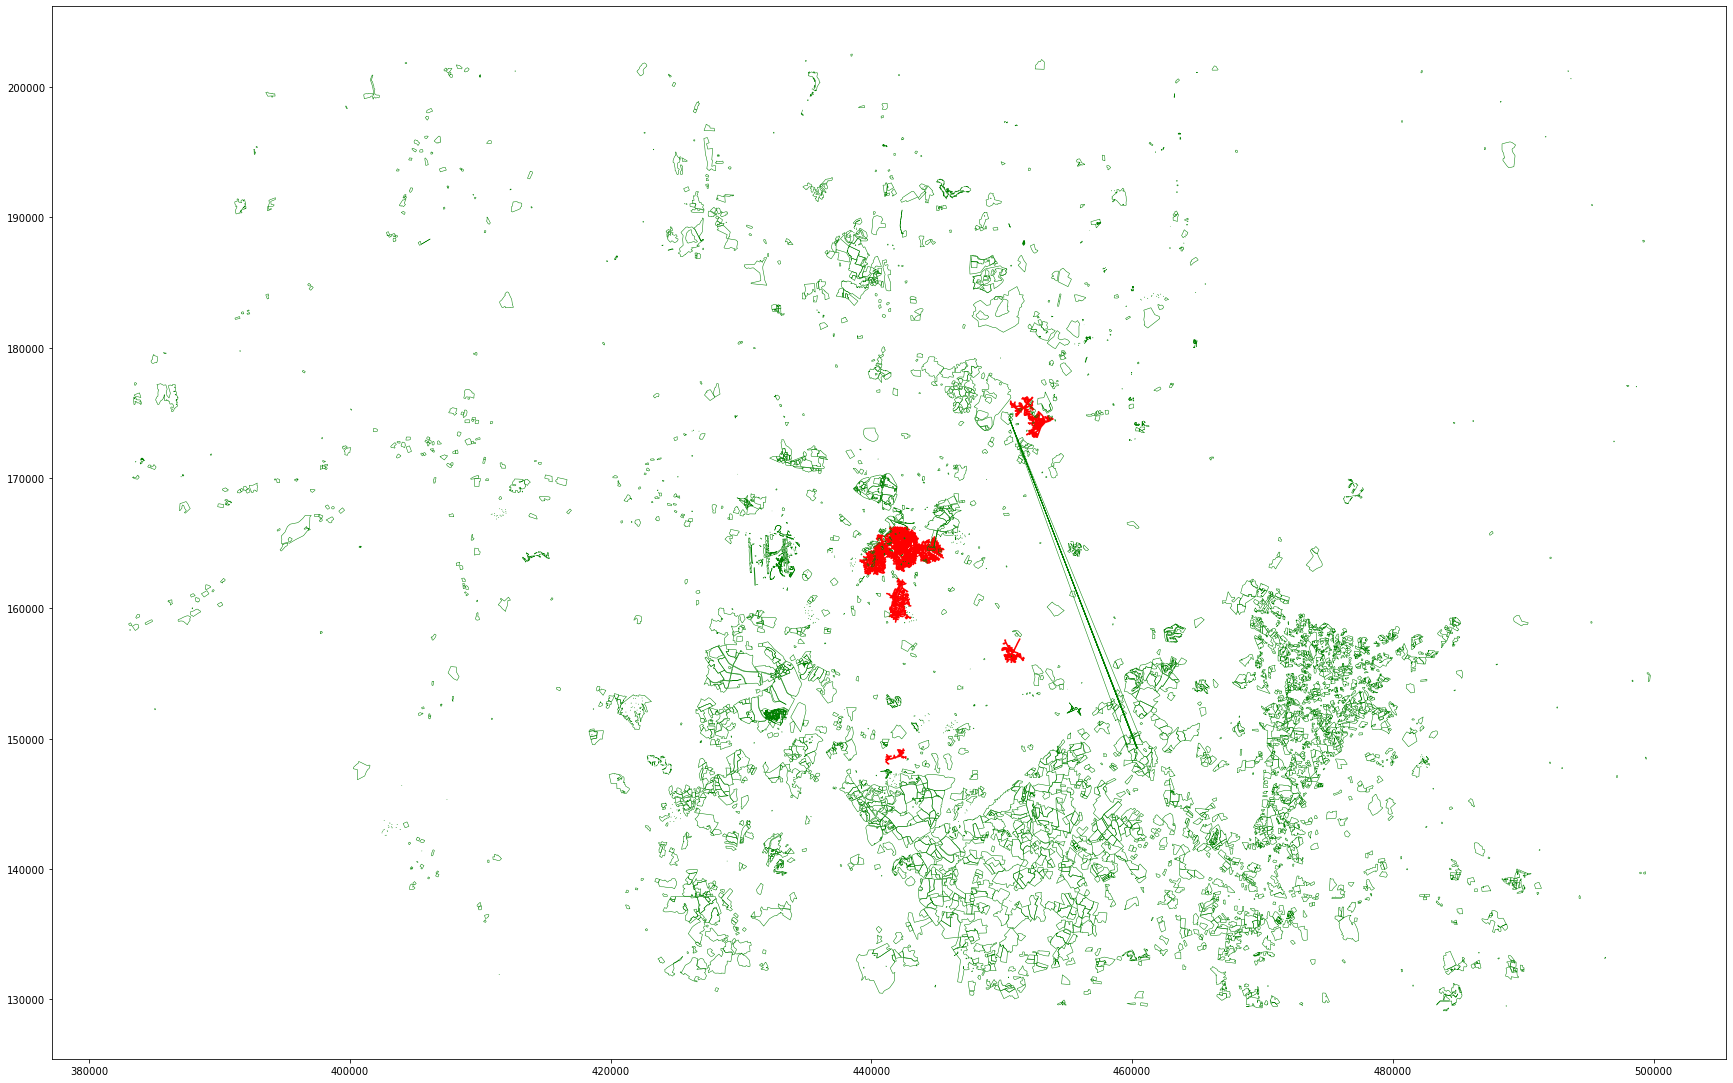

In [1014]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [1015]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1016]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [1017]:
#luse_proj.exterior.type

In [1018]:
#gdf1.exterior.type

In [1019]:
#luse_proj.exterior.is_valid

In [1020]:
#gdf1.exterior.is_valid

In [1021]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id            name          type  \
0  33142125            None  conservation   
1  33153532      Long Tract  conservation   
2  33177699   Carl A. Saine  conservation   
3  33177769  Harriet Melton  conservation   
4  33177826   Carl A. Saine  conservation   

                                            geometry  
0  POLYGON ((452579.049 201544.193, 452590.394 20...  
1  POLYGON ((401692.062 199312.355, 401677.906 19...  
2  POLYGON ((393718.126 190809.082, 393804.683 19...  
3  POLYGON ((456343.583 190992.629, 456359.607 19...  
4  POLYGON ((393718.126 190809.082, 393761.620 19...

In [1022]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name              type  \
23   62005659                  None  recreation_groun   
50  159022595      Elmwood Cemetery          cemetery   
51  169278790                  None            meadow   
52  169460851  Bonnie Cone Memorial          cemetery   
53  169462409  Susie Harwood Garden  greenhouse_horti   

                                             geometry  
23  MULTIPOLYGON (((452129.540 175699.040, 452131....  
50  MULTIPOLYGON (((441608.654 166195.906, 441608....  
51  POLYGON ((452592.335 174773.575, 452506.438 17...  
52  POLYGON ((452483.605 174029.091, 452492.451 17...  
53  POLYGON ((452367.980 174259.215, 452414.051 17...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


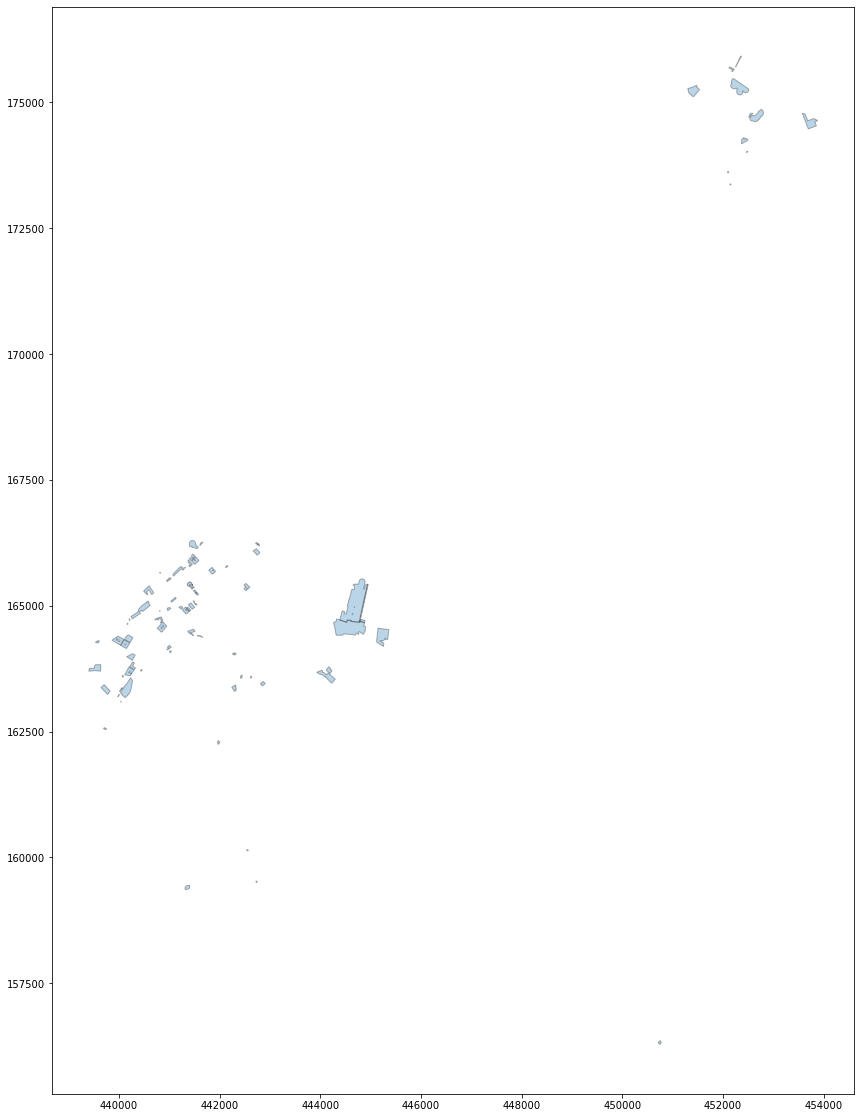

In [1023]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [1024]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
4  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   

                                  comment  osm_id_sensor buff_dist  \
0  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
1  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
2  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
3  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
4                                     NaN     34764115.0      0.75   

   buffer_area     osm_id                            name          type  \
0     1.161319  259488001                 Shopping Center        retail   
1     1.161319  547111806  Design Center of the Carolinas    commercial   
2     1.161319  547158341        Atherton Mill and Market        retail   
3     1.161319  547660396         The Square at South End  construction   
4     1.030269  547660396         The Square at South End  construction   

                                            geometry  
0  POLYGON ((439754.164 162548.211, 439752.872 16...  
1  POLYGON ((440198.821 163780.243, 440297.176 16...  
2  POLYGON ((440269.334 163508.049, 440263.159 16...  
3  POLYGON ((440324.018 164019.057, 440263.808 16...  
4  POLYGON ((440317.330 164013.163, 440317.212 16...

In [1025]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
4  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   

                                  comment osm_id_sensor  buff_dist  \
0  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
1  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
2  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
3  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
4                                     NaN    34764115.0       0.75   

  buffer_area     osm_id                            name          type  \
0    1.161319  259488001                 Shopping Center        retail   
1    1.161319  547111806  Design Center of the Carolinas    commercial   
2    1.161319  547158341        Atherton Mill and Market        retail   
3    1.161319  547660396         The Square at South End  construction   
4    1.030269  547660396         The Square at South End  construction   

                                            geometry           Area  
0  POLYGON ((439754.164 162548.211, 439752.872 16...   12680.160723  
1  POLYGON ((440198.821 163780.243, 440297.176 16...  179332.170896  
2  POLYGON ((440269.334 163508.049, 440263.159 16...  480385.890028  
3  POLYGON ((440324.018 164019.057, 440263.808 16...  119032.752394  
4  POLYGON ((440317.330 164013.163, 440317.212 16...   27464.977231  

[5 rows x 21 columns]

#https://geopandas.org/docs/user_guide/set_operations.html

In [1026]:
#intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [1027]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

osm_id         type          Area
0  16694967.0        grass  2.599842e+04
1  16701397.0        grass  5.061437e+04
2  16701397.0     military  6.154110e+05
3  16701397.0    religious  4.228023e+04
4  16701397.0  residential  2.876045e+06

In [1028]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Commercial Area 
0  55186886.0     179332.170896

In [1029]:
gdf1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
3   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
10  P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
17  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
24  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
31  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
3   393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
10  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
17   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
24  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
31   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                              comment  osm_id_sensor  \
3              On top of bridge; Sidewalk + bike lane     55186886.0   
10  Sidewalk + bike lane, Street is divided in str...     16701397.0   
17  Separated Sidewalk North, divided in strava-os...    493705004.0   
24                                                NaN     34764115.0   
31                                                NaN    322993730.0   

   buff_dist                                           geometry  buffer_area  
3       0.75  POLYGON ((439674.315 162575.438, 439672.862 16...     1.161319  
10      0.75  POLYGON ((444340.093 163406.253, 444334.737 16...     1.039467  
17      0.75  POLYGON ((441894.325 158905.573, 441890.242 15...     0.821662  
24      0.75  POLYGON ((441404.268 163870.846, 441404.134 16...     1.030269  
31      0.75  POLYGON ((442378.849 162830.204, 442373.016 16...     1.052487

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

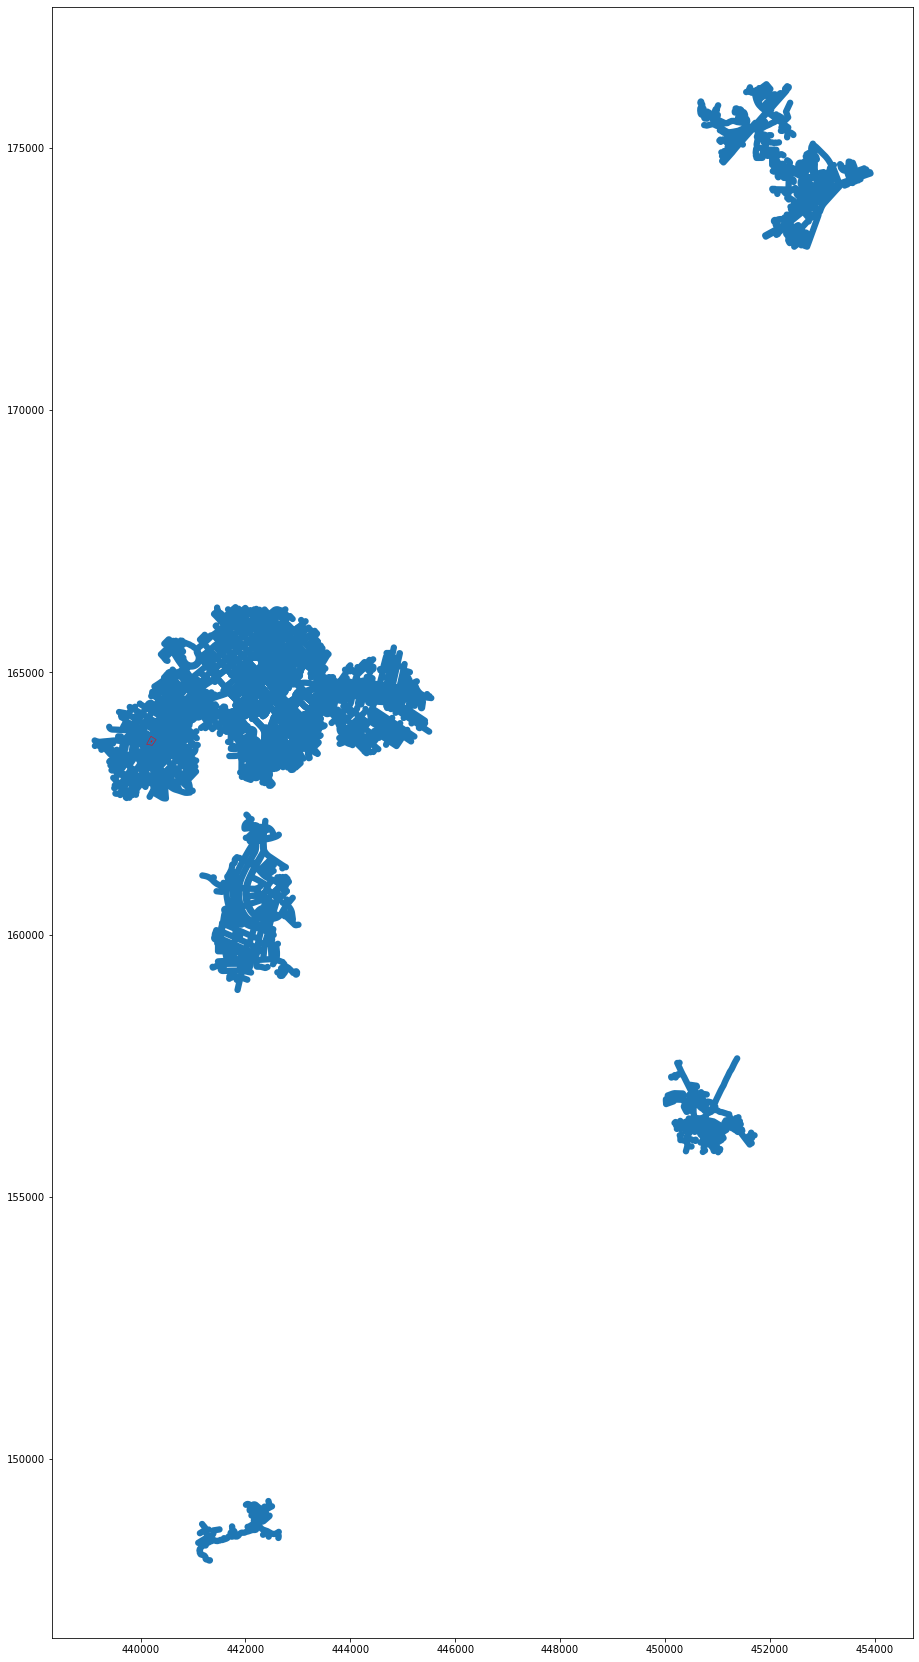

In [1030]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1031]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, Industrial Area ]
Index: []

In [1032]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Area 
0   16701397.0       2.876045e+06
1   34764115.0       1.383859e+03
2   55186886.0       5.658674e+05
3  169185539.0       6.252554e+05
4  322993730.0       1.113230e+05

In [1033]:
residential.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
20  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
21  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
22  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
23  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
27  P002CHA        Pecan Ave   permanent  2019  Charlotte             3.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
20  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
21  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
22  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
23  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
27  160.742460  16.082192   4.602740    740.0  ...  -80.81436   

                                              comment osm_id_sensor  \
20             On top of bridge; Sidewalk + bike lane    55186886.0   
21             On top of bridge; Sidewalk + bike lane    55186886.0   
22             On top of bridge; Sidewalk + bike lane    55186886.0   
23             On top of bridge; Sidewalk + bike lane    55186886.0   
27  Sidewalk + bike lane, Street is divided in str...    16701397.0   

    buff_dist buffer_area     osm_id  name         type  \
20       0.75    1.161319  780734121  None  residential   
21       0.75    1.161319  780737121  None  residential   
22       0.75    1.161319  781940549  None  residential   
23       0.75    1.161319  790614484  None  residential   
27       0.75    1.039467  369316282  None  residential   

                                             geometry           Area  
20  POLYGON ((440278.863 164365.446, 440221.228 16...  152856.450134  
21  POLYGON ((440149.008 164147.489, 440037.483 16...  174659.353852  
22  POLYGON ((440095.883 164329.733, 440097.493 16...  216174.979364  
23  POLYGON ((439539.381 164275.693, 439542.796 16...   22176.604165  
27  POLYGON ((444208.262 163478.203, 444208.124 16...  313838.240223  

[5 rows x 21 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

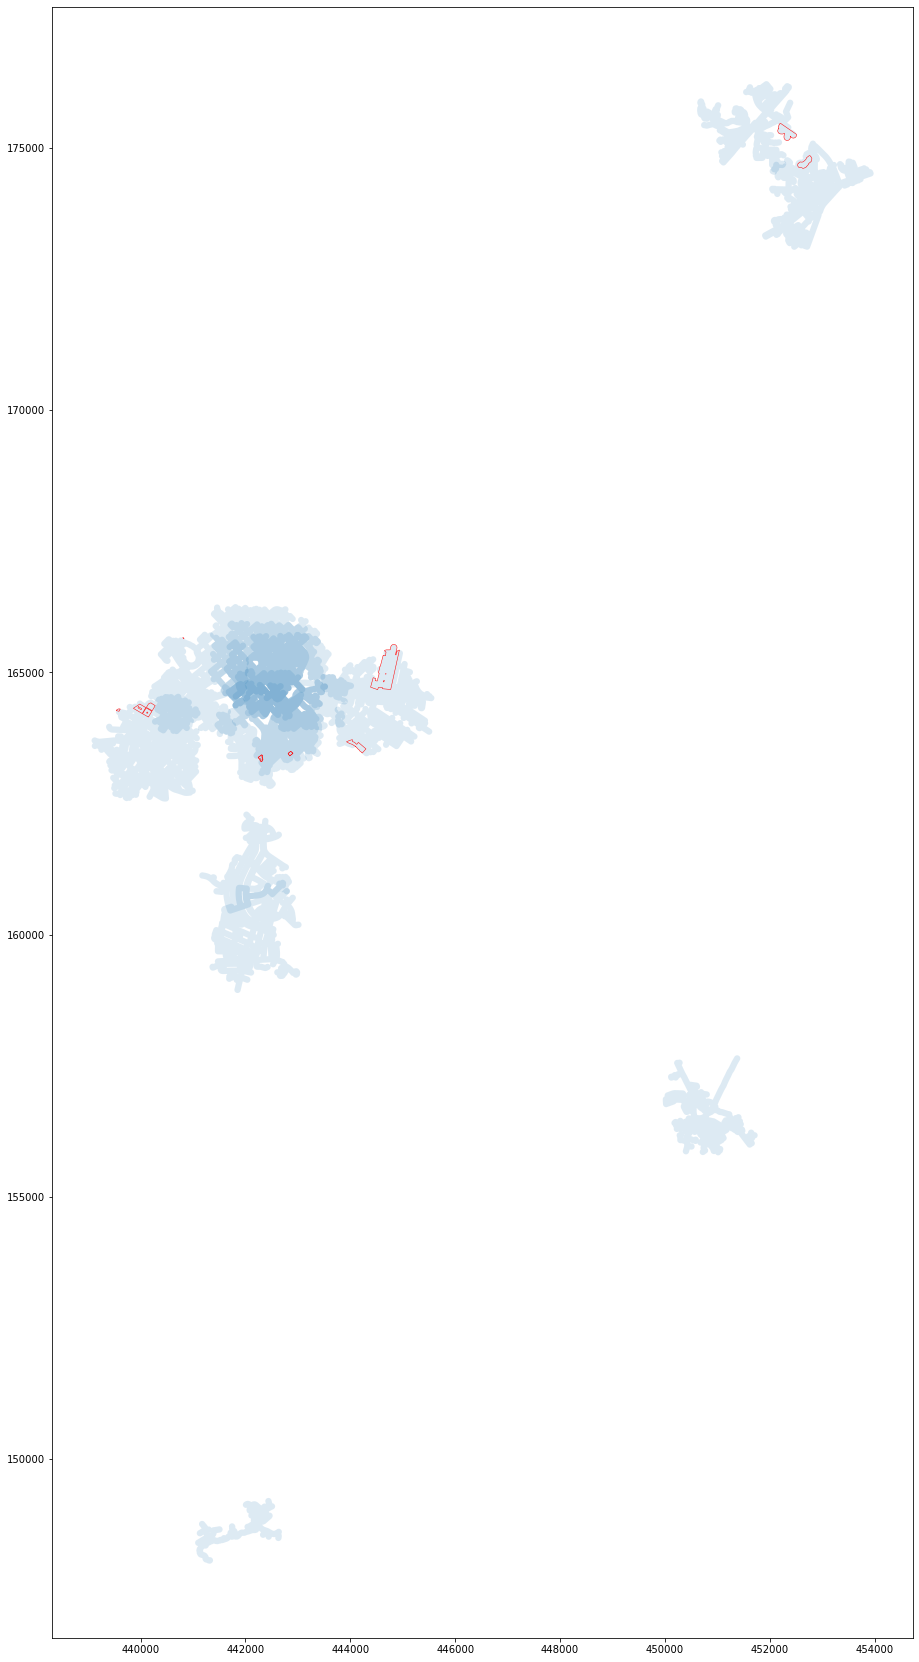

In [1034]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1035]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Retail Area
0   16701397.0  1.741495e+06
1   34764115.0  3.945208e+04
2   51062797.0  3.945208e+04
3   55186886.0  4.930661e+05
4  169185539.0  3.186808e+05

In [1036]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Grass Area
0  16694967.0   25998.419780
1  16701397.0   50614.367108
2  34764115.0  463144.773306
3  51062797.0  269304.440719
4  51062957.0   90349.173587

In [1037]:
output_grass.index

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=10, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [1038]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((-80.90901 35.06030, -80.90856 35.060...  
1  POLYGON ((-81.00779 34.95860, -81.00766 34.958...  
2  POLYGON ((-80.41479 35.55536, -80.41462 35.555...  
3  POLYGON ((-80.63218 35.51301, -80.63218 35.512...  
4  POLYGON ((-80.63538 35.50982, -80.63515 35.509...

In [1039]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=3358)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [1040]:
#nature_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

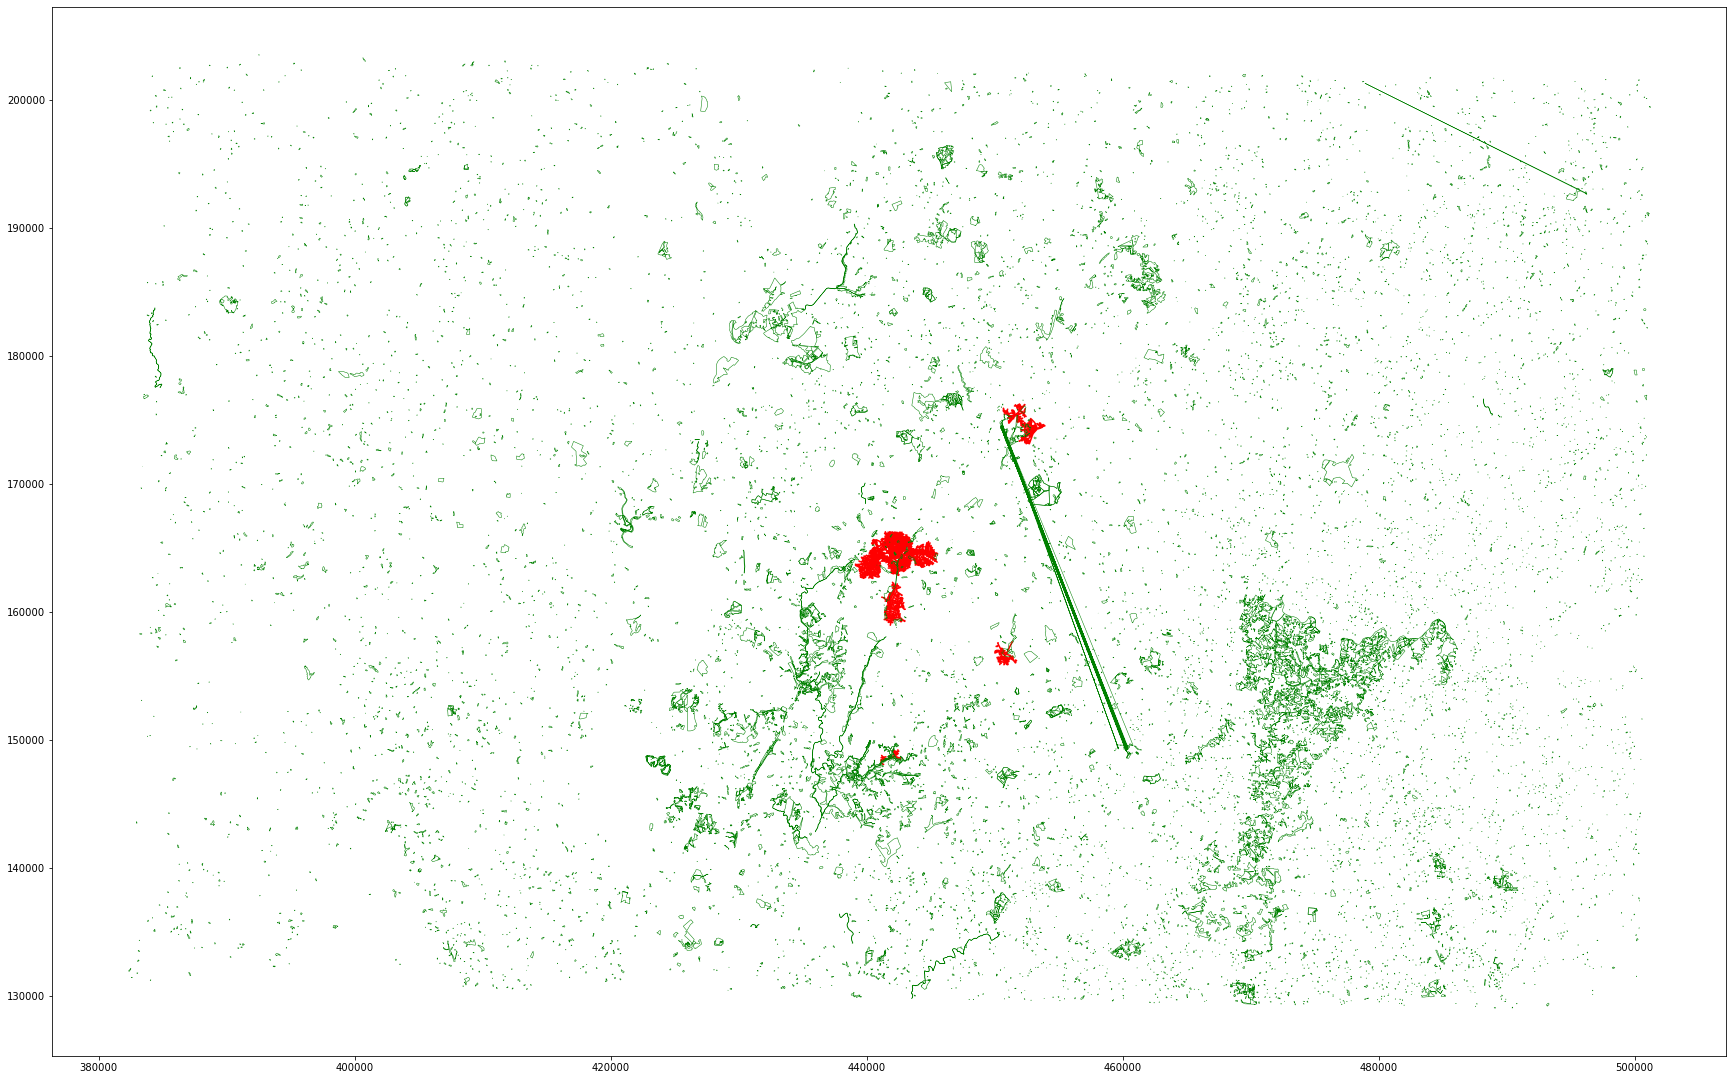

In [1041]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [1042]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  \
0  POLYGON ((435491.760 147025.118, 435532.019 14...   
1  POLYGON ((426255.504 135924.201, 426267.436 13...   
2  POLYGON ((481345.309 201183.155, 481360.678 20...   
3  POLYGON ((461562.704 196787.723, 461561.621 19...   
4  POLYGON ((461266.224 196439.110, 461286.351 19...   

                                           geometry2  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [1043]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                           geometry2  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [1044]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [1045]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name    type  \
42     38619507  Fourth Ward Park    park   
1098   41364336              None   water   
8306   47588319              None   water   
8754   47590788              None   water   
9236   47592411              None   water   
9418  131139738     Marshall Park    park   
9419  131139739         The Green    park   
9423  146306520              None    park   
9430  169278784              None  forest   
9431  169278785              None  forest   

                                               geometry  
42    POLYGON ((441841.219 165919.643, 441971.216 16...  
1098  POLYGON ((451767.344 175802.108, 451775.282 17...  
8306  POLYGON ((450995.576 156721.030, 450987.951 15...  
8754  POLYGON ((444168.842 164892.444, 444156.377 16...  
9236  POLYGON ((441771.442 161479.433, 441764.703 16...  
9418  POLYGON ((442165.756 164666.526, 442193.735 16...  
9419  POLYGON ((441484.888 165112.195, 441513.045 16...  
9423  POLYGON ((440806.415 163638.551, 440795.924 16...  
9430  POLYGON ((452100.216 174091.414, 452104.076 17...  
9431  POLYGON ((452836.383 174378.215, 452831.897 17...

In [1046]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id         site_name sensor_type  year     region  travel_pattern  \
0  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P005CHA  Stonewall Street   permanent  2019  Charlotte             2.0   
3  P002CHA         Pecan Ave   permanent  2019  Charlotte             3.0   
4  P002CHA         Pecan Ave   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
2   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   
3  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
4  160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   

                                             comment  osm_id_sensor buff_dist  \
0             On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
1             On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
2                                                NaN    322993730.0      0.75   
3  Sidewalk + bike lane, Street is divided in str...     16701397.0      0.75   
4  Sidewalk + bike lane, Street is divided in str...     16701397.0      0.75   

   buffer_area     osm_id           name   type  \
0     1.161319  146306520           None   park   
1     1.161319  256838595     Latta Park   park   
2     1.052487  256838595     Latta Park   park   
3     1.039467   47590788           None  water   
4     1.039467  325790266  Veterans Park   park   

                                            geometry  
0  POLYGON ((440795.924 163628.218, 440787.862 16...  
1  POLYGON ((441128.930 163568.925, 441124.337 16...  
2  POLYGON ((441864.567 163042.323, 441863.383 16...  
3  POLYGON ((444156.377 164909.769, 444159.046 16...  
4  MULTIPOLYGON (((445467.601 164459.271, 445442....

In [1047]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id         site_name sensor_type  year     region  travel_pattern  \
0  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA   Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P005CHA  Stonewall Street   permanent  2019  Charlotte             2.0   
3  P002CHA         Pecan Ave   permanent  2019  Charlotte             3.0   
4  P002CHA         Pecan Ave   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
2   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   
3  160.742460  16.082192   4.602740    740.0  ...  -80.81436   
4  160.742460  16.082192   4.602740    740.0  ...  -80.81436   

                                             comment osm_id_sensor  buff_dist  \
0             On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
1             On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
2                                                NaN   322993730.0       0.75   
3  Sidewalk + bike lane, Street is divided in str...    16701397.0       0.75   
4  Sidewalk + bike lane, Street is divided in str...    16701397.0       0.75   

  buffer_area     osm_id           name   type  \
0    1.161319  146306520           None   park   
1    1.161319  256838595     Latta Park   park   
2    1.052487  256838595     Latta Park   park   
3    1.039467   47590788           None  water   
4    1.039467  325790266  Veterans Park   park   

                                            geometry           Area  
0  POLYGON ((440795.924 163628.218, 440787.862 16...    1812.522242  
1  POLYGON ((441128.930 163568.925, 441124.337 16...   83150.406430  
2  POLYGON ((441864.567 163042.323, 441863.383 16...   49015.704959  
3  POLYGON ((444156.377 164909.769, 444159.046 16...    6724.248967  
4  MULTIPOLYGON (((445467.601 164459.271, 445442....  451694.931718  

[5 rows x 21 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

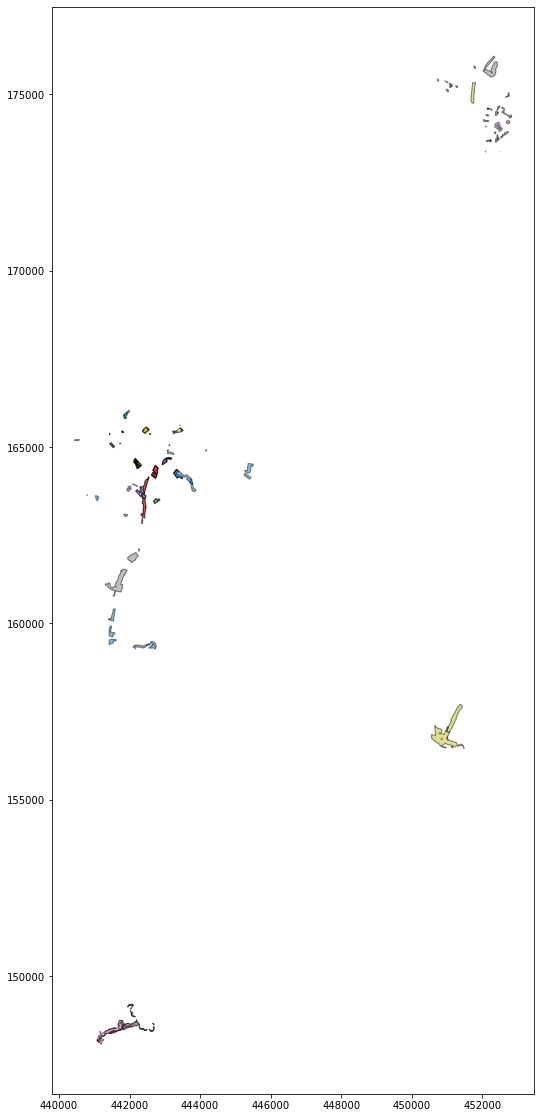

In [1048]:
inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

In [1049]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    type          Area
0     16694967.0    park  3.064079e+06
1     16694967.0   water  1.488787e+04
2     16701397.0    park  6.963903e+05
3     16701397.0   water  6.724249e+03
4     34764115.0  forest  3.289391e+04

In [1050]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Park Area
0  16694967.0  3.064079e+06
1  16701397.0  6.963903e+05
2  34764115.0  8.343735e+04
3  51062797.0  1.580314e+06
4  51062957.0  1.800681e+06

In [1051]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Water Area
0  16694967.0  14887.869925
1  16701397.0   6724.248967
2  34764115.0   2772.087229
3  51062797.0  69345.517721
4  51062957.0  46324.448589

In [1052]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Forest Area
0   34764115.0   32893.913962
1   51062797.0   54425.322482
2   51062957.0  144840.224653
3  156886419.0  948711.775019
4  169185539.0    9301.025962

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [1053]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name              type                    geometry
0   34192424      None  None  motorway_junctio  POINT (-81.48188 35.15605)
1  110066155      None  None  motorway_junctio  POINT (-81.47758 35.15888)
2  110073796      None  None  motorway_junctio  POINT (-81.44946 35.16576)
3  110140240      None  None  motorway_junctio  POINT (-81.45184 35.16432)
4  110192271      None  None              stop  POINT (-81.47950 35.15589)

In [1054]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=3358)
pts_proj.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name              type                       geometry
0   34192424      None  None  motorway_junctio  POINT (383518.625 158798.761)
1  110066155      None  None  motorway_junctio  POINT (383917.497 159103.168)
2  110073796      None  None  motorway_junctio  POINT (386497.922 159801.838)
3  110140240      None  None  motorway_junctio  POINT (386276.538 159647.350)
4  110192271      None  None              stop  POINT (383734.588 158775.409)
5  110220634      None  None    level_crossing  POINT (383028.080 157037.202)
6  110220639      None  None            switch  POINT (383321.024 157601.020)
7  110263313      None  None              stop  POINT (386338.459 157050.736)
8  110263442      None  None              stop  POINT (386261.983 158157.262)
9  110291033      None  None    turning_circle  POINT (385313.315 156542.371)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

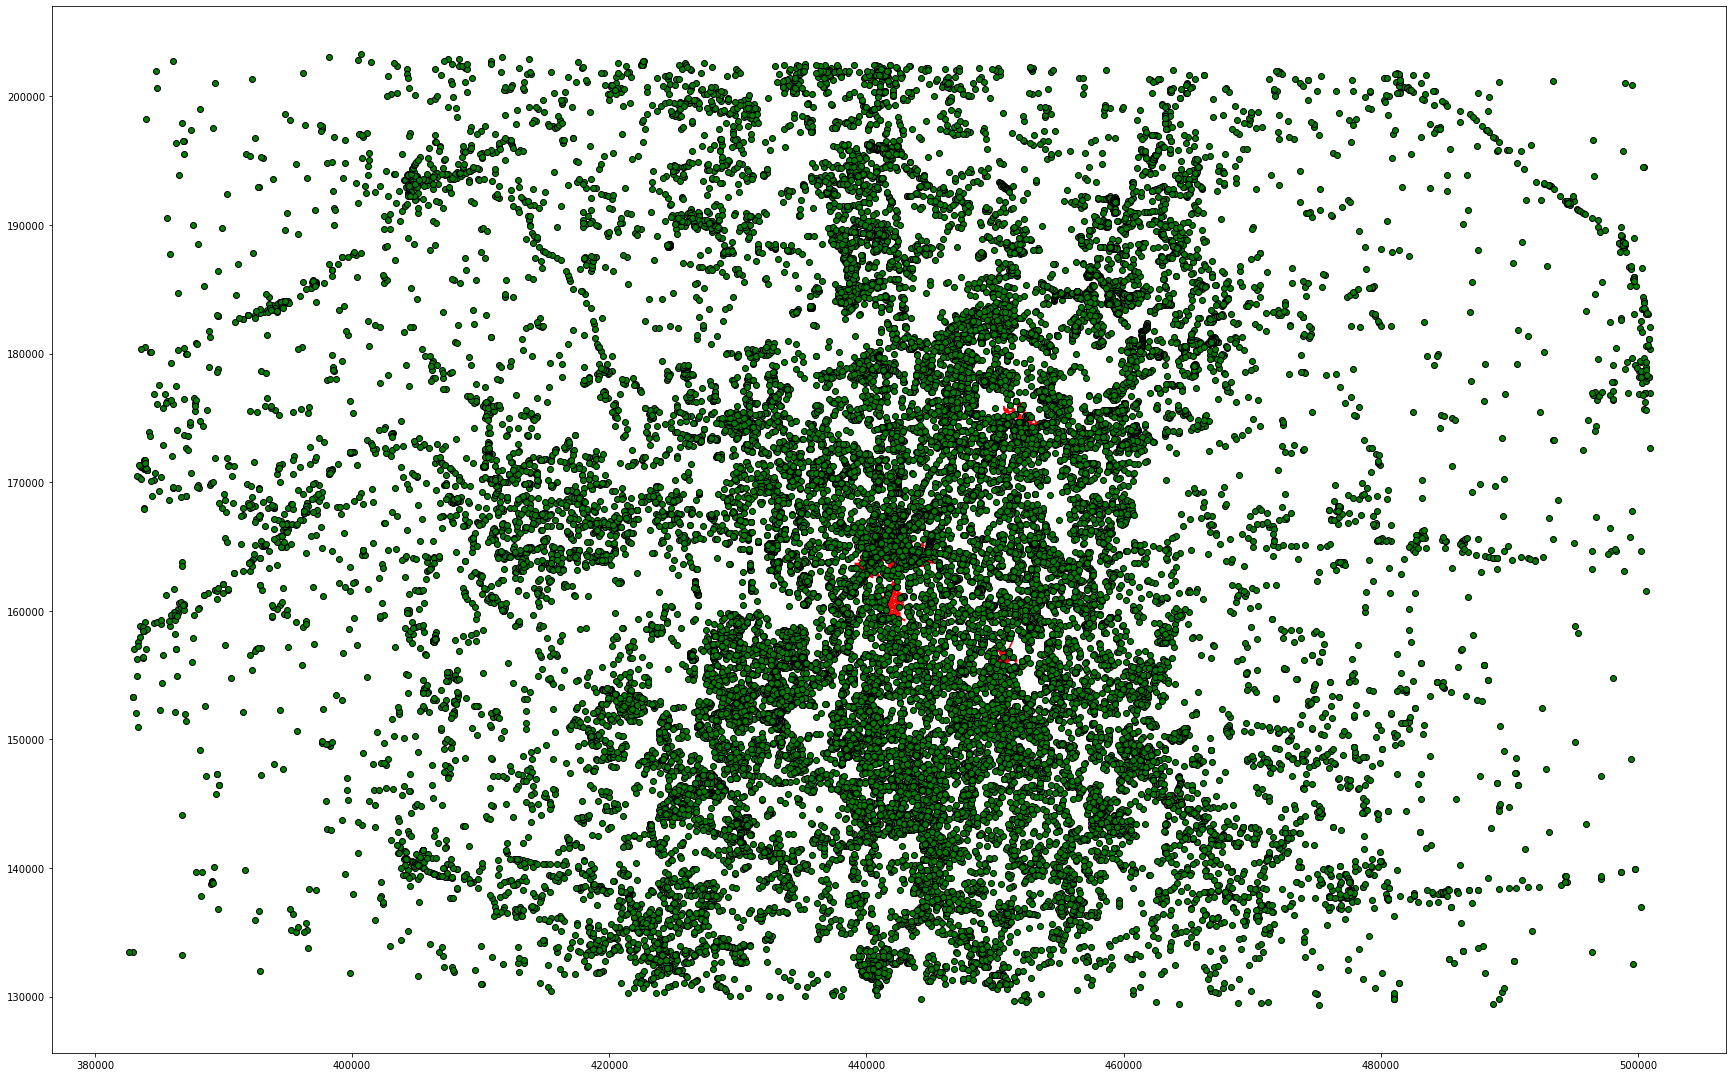

In [1055]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [1056]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name              type  \
3703  172132377      None  None   traffic_signals   
3736  172138680      None  None  motorway_junctio   
3743  172140020      None  None   traffic_signals   
3758  172142295      None  None   traffic_signals   
3765  172142717      None  None  motorway_junctio   
3781  172144084      None  None   traffic_signals   
3795  172146943      None  None   traffic_signals   
3837  172152417      None  None  motorway_junctio   
3838  172152497      None  None   traffic_signals   
3844  172153205      None  None  motorway_junctio   

                           geometry  
3703  POINT (442938.554 163921.371)  
3736  POINT (441926.460 164132.836)  
3743  POINT (442452.121 166104.145)  
3758  POINT (441613.018 164715.907)  
3765  POINT (441903.533 164185.797)  
3781  POINT (441114.484 165006.381)  
3795  POINT (443011.979 165699.933)  
3837  POINT (442591.433 164368.892)  
3838  POINT (442457.876 164358.248)  
3844  POINT (443118.034 165047.703)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


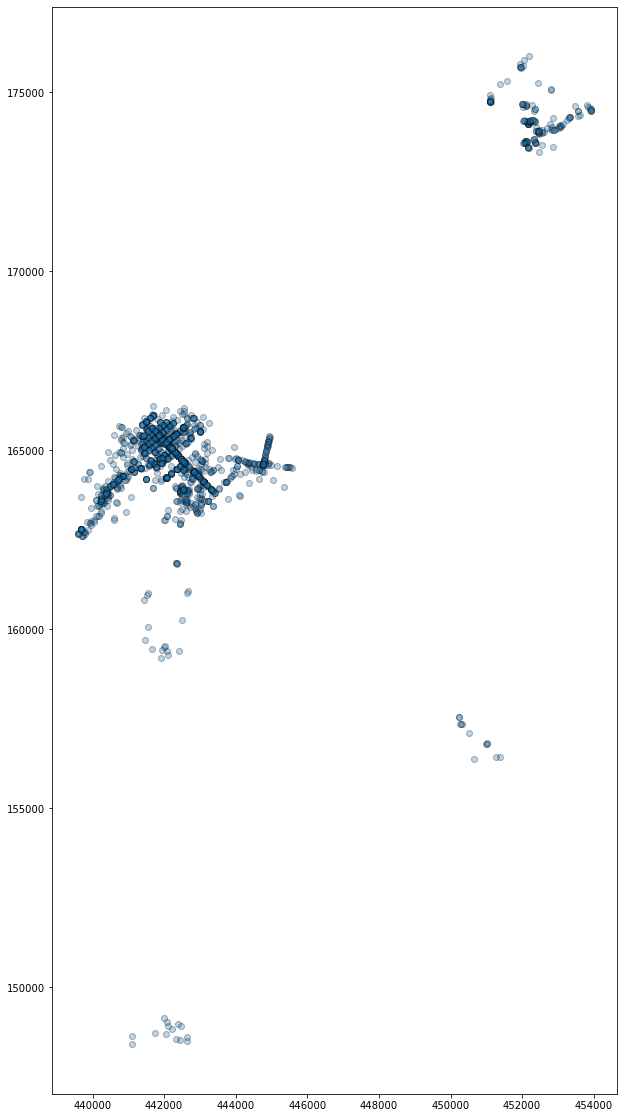

In [1057]:
ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1058]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
1  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
2  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
3  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
4  393.654456  18.547945   5.958904   1236.0  ...  -80.86114   

                                  comment osm_id_sensor  buff_dist  \
0  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
1  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
2  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
3  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   
4  On top of bridge; Sidewalk + bike lane    55186886.0       0.75   

  buffer_area     osm_id  timestamp  name             type  \
0    1.161319  172167419       None  None  traffic_signals   
1    1.161319  172167437       None  None  traffic_signals   
2    1.161319  172169004       None  None   turning_circle   
3    1.161319  172182622       None  None  traffic_signals   
4    1.161319  172200386       None  None  traffic_signals   

                        geometry  
0  POINT (440484.147 163733.603)  
1  POINT (440690.272 163537.250)  
2  POINT (440595.636 163102.543)  
3  POINT (439776.994 162708.930)  
4  POINT (440039.342 163049.723)  

[5 rows x 21 columns]

# Calculate the bicycle parking

In [1059]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                               site_name sensor_type  year  \
141  P001CHA                         Blue Line Trail   permanent  2019   
142  P004CHA                      South Tryon Street   permanent  2019   
599  P004CHA                      South Tryon Street   permanent  2019   
600  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   
601  S003CHA   6th St west of Brevard St (Bike Lane)  short-term  2019   

        region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
141  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0   
142  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0   
599  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0   
600  Charlotte             1.0   34.413822   4.917808   2.684932    318.0   
601  Charlotte             1.0   44.115166   4.671233   2.452055   1142.0   

     ...  longitude                                 comment osm_id_sensor  \
141  ... -80.861140  On top of bridge; Sidewalk + bike lane    55186886.0   
142  ... -80.850360                                     NaN    34764115.0   
599  ... -80.850360                                     NaN    34764115.0   
600  ... -80.835569                                     NaN    51062797.0   
601  ... -80.838214                                     NaN    51062797.0   

     buff_dist buffer_area      osm_id  timestamp  name             type  \
141       0.75    1.161319  1278639703       None  None  bicycle_parking   
142       0.75    1.030269  1278639703       None  None  bicycle_parking   
599       0.75    1.030269  -293345358       None  None  bicycle_parking   
600       0.75    1.096798  -293345358       None  None  bicycle_parking   
601       0.75    1.119319  -293345358       None  None  bicycle_parking   

                          geometry  
141  POINT (440417.742 163898.120)  
142  POINT (440417.742 163898.120)  
599  POINT (441713.770 165330.737)  
600  POINT (441713.770 165330.737)  
601  POINT (441713.770 165330.737)  

[5 rows x 21 columns]

In [1060]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bicycle Parking
0   34764115.0                5
1   51062797.0                4
2   51062957.0                1
3   55186886.0                1
4  322993730.0                2

# Calculate bus stops

In [1061]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                               site_name sensor_type  year  \
153  P001CHA                         Blue Line Trail   permanent  2019   
250  P002CHA                               Pecan Ave   permanent  2019   
251  P002CHA                               Pecan Ave   permanent  2019   
593  P004CHA                      South Tryon Street   permanent  2019   
594  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   

        region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
153  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0   
250  Charlotte             3.0  160.742460  16.082192   4.602740    740.0   
251  Charlotte             3.0  160.742460  16.082192   4.602740    740.0   
593  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0   
594  Charlotte             1.0   34.413822   4.917808   2.684932    318.0   

     ...  longitude                                            comment  \
153  ... -80.861140             On top of bridge; Sidewalk + bike lane   
250  ... -80.814360  Sidewalk + bike lane, Street is divided in str...   
251  ... -80.814360  Sidewalk + bike lane, Street is divided in str...   
593  ... -80.850360                                                NaN   
594  ... -80.835569                                                NaN   

    osm_id_sensor  buff_dist buffer_area      osm_id  timestamp  name  \
153    55186886.0       0.75    1.161319  1469340296       None  None   
250    16701397.0       0.75    1.039467 -1808600489       None  None   
251    16701397.0       0.75    1.039467 -1808588787       None  None   
593    34764115.0       0.75    1.030269  -293356293       None  None   
594    51062797.0       0.75    1.096798  -293356293       None  None   

         type                       geometry  
153  bus_stop  POINT (440434.134 163797.070)  
250  bus_stop  POINT (445399.855 164522.540)  
251  bus_stop  POINT (445425.606 164529.706)  
593  bus_stop  POINT (441818.913 165438.635)  
594  bus_stop  POINT (441818.913 165438.635)  

[5 rows x 21 columns]

In [1062]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bus Stops
0  16701397.0          2
1  34764115.0          1
2  51062797.0          6
3  51062957.0          1
4  55186886.0          1

# Calculate school/college/university

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


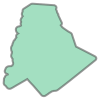

In [1063]:
#sc= inter_pts[inter_pts['type'].str.contains('school|college')]
#sc
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [1064]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [1065]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=3358)
scl_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type                       geometry  \
0  node/357767103  357767103         node  POINT (435343.832 169354.287)   
1  node/357767768  357767768         node  POINT (437593.437 163809.337)   
2  node/357768646  357768646         node  POINT (442001.828 166308.104)   
3  node/357768730  357768730         node  POINT (440625.664 167928.773)   
4  node/357769156  357769156         node  POINT (448970.329 168023.182)   

  amenity  ele gnis:county_id gnis:created gnis:feature_id gnis:state_id  ...  \
0  school  218            119   01/01/2000          980117            37  ...   
1  school  195            119   01/01/2000          980586            37  ...   
2  school  231            119   06/17/1980          981243            37  ...   
3  school  221            119   06/17/1980          981295            37  ...   
4  school  227            119   01/01/2000          981861            37  ...   

  grades nodes source height addr:housename designation email description  \
0    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
1    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
2    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
3    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
4    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   

  school building:levels  
0    NaN             NaN  
1    NaN             NaN  
2    NaN             NaN  
3    NaN             NaN  
4    NaN             NaN  

[5 rows x 39 columns]

In [1066]:
scl_proj['geometry']=scl_proj['geometry'].centroid
scl_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type                       geometry  \
0  node/357767103  357767103         node  POINT (435343.832 169354.287)   
1  node/357767768  357767768         node  POINT (437593.437 163809.337)   
2  node/357768646  357768646         node  POINT (442001.828 166308.104)   
3  node/357768730  357768730         node  POINT (440625.664 167928.773)   
4  node/357769156  357769156         node  POINT (448970.329 168023.182)   

  amenity  ele gnis:county_id gnis:created gnis:feature_id gnis:state_id  ...  \
0  school  218            119   01/01/2000          980117            37  ...   
1  school  195            119   01/01/2000          980586            37  ...   
2  school  231            119   06/17/1980          981243            37  ...   
3  school  221            119   06/17/1980          981295            37  ...   
4  school  227            119   01/01/2000          981861            37  ...   

  grades nodes source height addr:housename designation email description  \
0    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
1    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
2    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
3    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   
4    NaN   NaN    NaN    NaN            NaN         NaN   NaN         NaN   

  school building:levels  
0    NaN             NaN  
1    NaN             NaN  
2    NaN             NaN  
3    NaN             NaN  
4    NaN             NaN  

[5 rows x 39 columns]

In [1067]:
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P002CHA        Pecan Ave   permanent  2019  Charlotte             3.0   
4  P002CHA        Pecan Ave   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  393.654456  18.547945   5.958904   1236.0  ...   
1  393.654456  18.547945   5.958904   1236.0  ...   
2  393.654456  18.547945   5.958904   1236.0  ...   
3  160.742460  16.082192   4.602740    740.0  ...   
4  160.742460  16.082192   4.602740    740.0  ...   

                                               nodes  source height  \
0                                                NaN     NaN    NaN   
1                                                NaN     NaN    NaN   
2  [172332984, 172823906, 172823914, 172250610, 2...     NaN    NaN   
3                                                NaN     NaN    NaN   
4  [3323988376, 5625422852, 7801947420, 780194742...     NaN    NaN   

   addr:housename designation  email description  school building:levels  \
0             NaN         NaN    NaN         NaN     NaN             NaN   
1             NaN         NaN    NaN         NaN     NaN             NaN   
2             NaN         NaN    NaN         NaN     NaN             NaN   
3             NaN         NaN    NaN         NaN     NaN             NaN   
4             NaN         NaN    NaN         NaN     NaN             NaN   

                        geometry  
0  POINT (441077.668 163698.183)  
1  POINT (439872.656 164183.010)  
2  POINT (441062.509 163731.207)  
3  POINT (444895.565 164629.465)  
4  POINT (444927.727 164640.353)  

[5 rows x 55 columns]

In [1068]:
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0  16701397.0       3
1  34764115.0       1
2  51062797.0       6
3  51062957.0       4
4  55186886.0       3

# Closest distance to school

In [1069]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1070]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance=output_school_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_school_distance.head()

osm_id  min_dist_to_school
0    55186886.0         2421.857994
7    16701397.0         1687.108336
14  493705004.0         3001.458672
21   34764115.0         2534.811945
28  322993730.0         2069.054243

In [1071]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=3358)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1072]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  college
0   51062797.0        3
1   51062957.0        4
2  322993730.0        3
3  422138643.0        3

# Closest distance to college

In [1073]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance=output_college_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0    55186886.0          9586.368741
7    16701397.0          4478.048087
14  493705004.0         14595.415186
21   34764115.0          5169.515202
28  322993730.0          2614.970164

In [1074]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=3358)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1075]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  University
0   51062797.0           1
1   51062957.0           1
2  235076258.0           1

In [1076]:
#scu=pd.concat([sc,u],axis=0)
#scu

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Closest distance to university

In [1077]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance=output_university_distance.drop_duplicates(subset=['osm_id'],keep='first')
output_university_distance.head()

osm_id  min_dist_to_university
0    55186886.0             8278.354216
7    16701397.0             7268.572020
14  493705004.0             3924.702931
21   34764115.0             3389.043815
28  322993730.0             5081.975065

# Calculate intersection density

In [1078]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1079]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
from shapely.geometry.multipolygon import MultiPolygon
from shapely import wkt


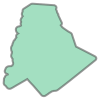

In [1080]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon


In [1081]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [1082]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y          x  street_count highway  ref  \
osmid                                                        
113239070  35.053852 -80.895221             2     NaN  NaN   
113245563  35.024882 -80.867952             3     NaN  NaN   
113245566  35.024575 -80.868082             3     NaN  NaN   
113254734  34.989299 -80.840746             1     NaN  NaN   
113254737  34.989520 -80.839831             3     NaN  NaN   

                             geometry  
osmid                                  
113239070  POINT (-80.89522 35.05385)  
113245563  POINT (-80.86795 35.02488)  
113245566  POINT (-80.86808 35.02458)  
113254734  POINT (-80.84075 34.98930)  
113254737  POINT (-80.83983 34.98952)

In [1083]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=3358)
node_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y          x  street_count highway  ref  \
osmid                                                        
113239070  35.053852 -80.895221             2     NaN  NaN   
113245563  35.024882 -80.867952             3     NaN  NaN   
113245566  35.024575 -80.868082             3     NaN  NaN   
113254734  34.989299 -80.840746             1     NaN  NaN   
113254737  34.989520 -80.839831             3     NaN  NaN   

                                geometry  
osmid                                     
113239070  POINT (436735.165 146285.761)  
113245563  POINT (439161.674 143025.627)  
113245566  POINT (439149.136 142991.791)  
113254734  POINT (441570.525 139032.734)  
113254737  POINT (441654.504 139055.719)

In [1084]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y          x  street_count highway  ref  \
osmid                                                        
172129669  35.214033 -80.844833             3     NaN  NaN   
172129670  35.213401 -80.845853             2     NaN  NaN   
172129671  35.213327 -80.845967             4     NaN  NaN   
172129672  35.213229 -80.846120             2     NaN  NaN   
172129673  35.213088 -80.846342             2     NaN  NaN   

                                geometry  
osmid                                     
172129669  POINT (441660.798 163964.844)  
172129670  POINT (441566.651 163896.475)  
172129671  POINT (441556.122 163888.460)  
172129672  POINT (441541.993 163877.850)  
172129673  POINT (441521.495 163862.587)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


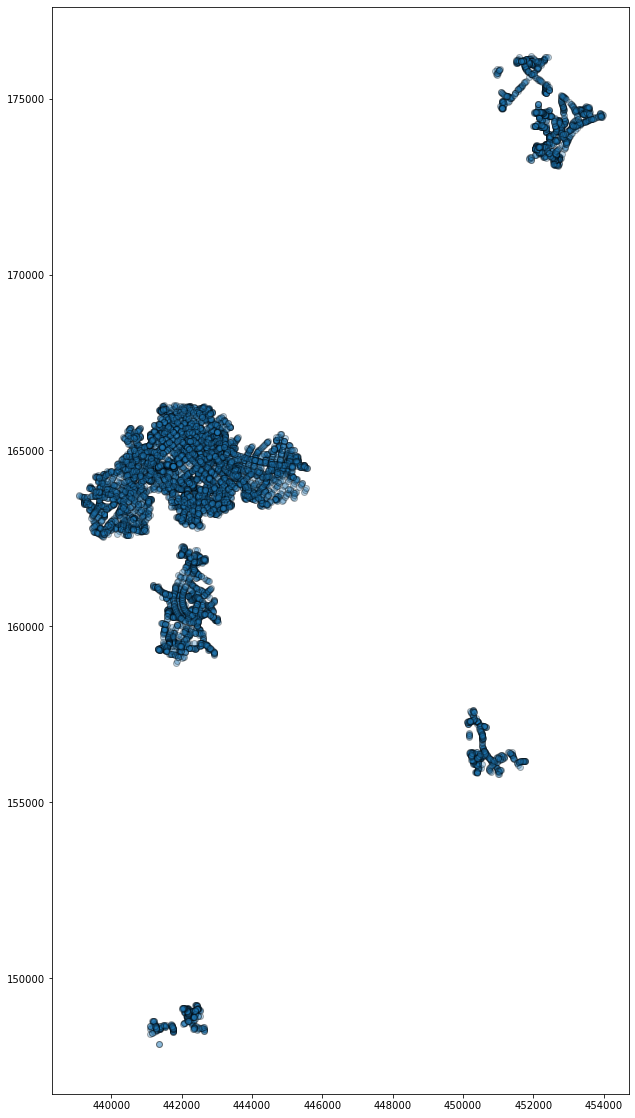

In [1085]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1086]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  393.654456  18.547945   5.958904   1236.0  ...   
1  393.654456  18.547945   5.958904   1236.0  ...   
2  393.654456  18.547945   5.958904   1236.0  ...   
3  393.654456  18.547945   5.958904   1236.0  ...   
4  393.654456  18.547945   5.958904   1236.0  ...   

                                  comment  osm_id_sensor buff_dist  \
0  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
1  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
2  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
3  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   
4  On top of bridge; Sidewalk + bike lane     55186886.0      0.75   

   buffer_area          y          x  street_count  highway  ref  \
0     1.161319  35.203244 -80.866489             2      NaN  NaN   
1     1.161319  35.213813 -80.869712             2      NaN  NaN   
2     1.161319  35.213615 -80.869639             3      NaN  NaN   
3     1.161319  35.213521 -80.869602             2      NaN  NaN   
4     1.161319  35.213477 -80.869578             2      NaN  NaN   

                        geometry  
0  POINT (439667.117 162805.081)  
1  POINT (439395.794 163982.817)  
2  POINT (439402.025 163960.731)  
3  POINT (439405.197 163950.242)  
4  POINT (439407.290 163945.321)  

[5 rows x 22 columns]

In [1087]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12=output_intersection_density.reset_index()
output_intersection_density12

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  geometry
0      16694967.0       372
1      16701397.0       908
2      34764115.0      1356
3      51062797.0      3472
4      51062957.0      1760
5      55186886.0      1165
6     156886419.0       256
7     169185539.0       389
8     235076258.0       510
9     322993730.0      1653
10    422138643.0      1557
11    492433486.0       906
12    493705004.0       779

In [1088]:
b_area=gdf1.loc[:,['osm_id_sensor','buffer_area']]
b_area

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffer_area
3      55186886.0     1.161319
10     16701397.0     1.039467
17    493705004.0     0.821662
24     34764115.0     1.030269
31    322993730.0     1.052487
38    492433486.0     0.726326
45    156886419.0     0.247004
52    235076258.0     0.554821
59    422138643.0     0.933192
66    169185539.0     0.599340
73     16694967.0     0.547705
80     51062957.0     1.112059
87     51062797.0     1.096798
94     51062797.0     1.119319

In [1089]:
output_intersection_density1=pd.merge(output_intersection_density12,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1["Intersection Density"]=output_intersection_density1["geometry"]/output_intersection_density1["buffer_area"]
output_intersection_density1=output_intersection_density1.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1.columns=['osm_id','OSM_node_Density']
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  16694967.0        679.197896
1  16701397.0        873.524892
2  34764115.0       1316.161384
3  51062797.0       3165.578646
4  51062797.0       3101.886976

# Calculate the intersection density

In [1090]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1091]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=3358)
nodea_proj.head(5)

y          x  street_count highway  ref  \
osmid                                                        
113245563  35.024882 -80.867952             3     NaN  NaN   
113245566  35.024575 -80.868082             3     NaN  NaN   
113254734  34.989299 -80.840746             1     NaN  NaN   
113254737  34.989520 -80.839831             3     NaN  NaN   
113260476  35.025563 -80.870002             3     NaN  NaN   

                                geometry  
osmid                                     
113245563  POINT (439161.674 143025.627)  
113245566  POINT (439149.136 142991.791)  
113254734  POINT (441570.525 139032.734)  
113254737  POINT (441654.504 139055.719)  
113260476  POINT (438976.022 143104.633)

In [1092]:
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
output_intersection_densitya= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()
output_intersection_density12a=output_intersection_densitya.reset_index()
output_intersection_density1a=pd.merge(output_intersection_density12a,b_area,left_on="osm_id_sensor",right_on='osm_id_sensor',how="inner")
output_intersection_density1a["Intersection Density"]=output_intersection_density1a["geometry"]/output_intersection_density1a["buffer_area"]
output_intersection_density1a=output_intersection_density1a.loc[:,['osm_id_sensor','Intersection Density']]
output_intersection_density1a.columns=['osm_id','Intersection_Density']
output_intersection_density1a.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Intersection_Density
0  16694967.0             83.986837
1  16701397.0            165.469473
2  34764115.0            168.887965
3  51062797.0            422.137936
4  51062797.0            413.644490

# Calculate the Number of Lanes

In [1093]:
edges.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   
113245566 113245563  0     12443810      NaN       Prime Lane  residential   
          113291861  0     12451483      NaN       Prime Lane  residential   
          113291858  0     12451483      NaN       Prime Lane  residential   
113254734 113254737  0     12445277      NaN              NaN  residential   
113254737 113254734  0     12445277      NaN              NaN  residential   

                          oneway  length lanes maxspeed bridge access tunnel  \
u         v          key                                                       
113239070 3340121615 0     False  12.973   NaN      NaN    NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN      NaN    NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN      NaN    NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN      NaN    NaN    NaN    NaN   
          113286752  0     False  23.463   NaN      NaN    NaN    NaN    NaN   
113245566 113245563  0     False  36.154   NaN      NaN    NaN    NaN    NaN   
          113291861  0     False  17.574   NaN      NaN    NaN    NaN    NaN   
          113291858  0     False  20.530   NaN      NaN    NaN    NaN    NaN   
113254734 113254737  0     False  86.916   NaN      NaN    NaN    NaN    NaN   
113254737 113254734  0     False  86.916   NaN      NaN    NaN    NaN    NaN   

                         junction area  \
u         v          key                 
113239070 3340121615 0        NaN  NaN   
          3340121616 0        NaN  NaN   
113245563 113245566  0        NaN  NaN   
          4950059198 0        NaN  NaN   
          113286752  0        NaN  NaN   
113245566 113245563  0        NaN  NaN   
          113291861  0        NaN  NaN   
          113291858  0        NaN  NaN   
113254734 113254737  0        NaN  NaN   
113254737 113254734  0        NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (-80.89522 35.05385, -80.89524 35.0...  
          3340121616 0    LINESTRING (-80.89522 35.05385, -80.89519 35.0...  
113245563 113245566  0    LINESTRING (-80.86795 35.02488, -80.86808 35.0...  
          4950059198 0    LINESTRING (-80.86795 35.02488, -80.86823 35.0...  
          113286752  0    LINESTRING (-80.86795 35.02488, -80.86769 35.0...  
113245566 113245563  0    LINESTRING (-80.86808 35.02458, -80.86795 35.0...  
          113291861  0    LINESTRING (-80.86808 35.02458, -80.86825 35.0...  
          113291858  0    LINESTRING (-80.86808 35.02458, -80.86801 35.0...  
113254734 113254737  0    LINESTRING (-80.84075 34.98930, -80.83983 34.9...  
113254737 113254734  0    LINESTRING (-80.83983 34.98952, -80.84075 34.9...

In [1094]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1095]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=3358)
edge_proj.head(5)

osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes maxspeed bridge access tunnel  \
u         v          key                                                       
113239070 3340121615 0     False  12.973   NaN      NaN    NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN      NaN    NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN      NaN    NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN      NaN    NaN    NaN    NaN   
          113286752  0     False  23.463   NaN      NaN    NaN    NaN    NaN   

                         junction area  \
u         v          key                 
113239070 3340121615 0        NaN  NaN   
          3340121616 0        NaN  NaN   
113245563 113245566  0        NaN  NaN   
          4950059198 0        NaN  NaN   
          113286752  0        NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (436735.165 146285.761, 436733.421 ...  
          3340121616 0    LINESTRING (436735.165 146285.761, 436737.755 ...  
113245563 113245566  0    LINESTRING (439161.674 143025.627, 439149.136 ...  
          4950059198 0    LINESTRING (439161.674 143025.627, 439136.727 ...  
          113286752  0    LINESTRING (439161.674 143025.627, 439185.137 ...

In [1096]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid     ref                  name  \
u         v          key                                            
113261351 113286999  0     12450644     NaN       Harrisburg Road   
          4600213998 0     12450644     NaN       Harrisburg Road   
113273966 113290579  0    253130383  US 521     Charlotte Highway   
113275140 8154475894 0    261992778     NaN           Marvin Road   
          6456756600 0    261992778     NaN           Marvin Road   
113275985 7062534695 0    764483867     NaN     Henry Harris Road   
113278554 6456756600 0    261992778     NaN           Marvin Road   
          5903152990 0    261992778     NaN           Marvin Road   
113281274 7017018113 0     12454791     NaN  Black Horse Run Road   
          113310771  0     12454791     NaN  Black Horse Run Road   

                              highway  oneway   length lanes maxspeed bridge  \
u         v          key                                                       
113261351 113286999  0       tertiary   False   19.683     2      NaN    NaN   
          4600213998 0       tertiary   False    8.945     2      NaN    NaN   
113273966 113290579  0          trunk    True   57.884     2      NaN    NaN   
113275140 8154475894 0       tertiary   False    2.319     2      NaN    NaN   
          6456756600 0       tertiary   False   82.380     2      NaN    NaN   
113275985 7062534695 0       tertiary   False  179.215     2      NaN    NaN   
113278554 6456756600 0       tertiary   False   12.950     2      NaN    NaN   
          5903152990 0       tertiary   False   10.250     2      NaN    NaN   
113281274 7017018113 0    residential   False   18.893     2      NaN    NaN   
          113310771  0    residential   False   46.100     2      NaN    NaN   

                         access tunnel junction area  \
u         v          key                               
113261351 113286999  0      NaN    NaN      NaN  NaN   
          4600213998 0      NaN    NaN      NaN  NaN   
113273966 113290579  0      NaN    NaN      NaN  NaN   
113275140 8154475894 0      NaN    NaN      NaN  NaN   
          6456756600 0      NaN    NaN      NaN  NaN   
113275985 7062534695 0      NaN    NaN      NaN  NaN   
113278554 6456756600 0      NaN    NaN      NaN  NaN   
          5903152990 0      NaN    NaN      NaN  NaN   
113281274 7017018113 0      NaN    NaN      NaN  NaN   
          113310771  0      NaN    NaN      NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113261351 113286999  0    LINESTRING (440225.238 141494.098, 440216.015 ...  
          4600213998 0    LINESTRING (440225.238 141494.098, 440229.196 ...  
113273966 113290579  0    LINESTRING (440382.062 141036.418, 440364.811 ...  
113275140 8154475894 0    LINESTRING (440525.155 139548.512, 440523.197 ...  
          6456756600 0    LINESTRING (440525.155 139548.512, 440594.289 ...  
113275985 7062534695 0    LINESTRING (441328.228 138830.626, 441328.590 ...  
113278554 6456756600 0    LINESTRING (440605.159 139496.528, 440594.289 ...  
          5903152990 0    LINESTRING (440605.159 139496.528, 440613.868 ...  
113281274 7017018113 0    LINESTRING (440795.673 140055.931, 440795.823 ...  
          113310771  0    LINESTRING (440795.673 140055.931, 440770.578 ...

In [1097]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1098]:
ecoshort_lane

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                               site_name sensor_type  year  \
0   P001CHA                         Blue Line Trail   permanent  2019   
7   P002CHA                               Pecan Ave   permanent  2019   
14  P003CHA                           Selwyn Avenue   permanent  2019   
21  P004CHA                      South Tryon Street   permanent  2019   
28  P005CHA                        Stonewall Street   permanent  2019   
35  P006CHA      University City Boulevard Sidepath   permanent  2019   
42  P007CHA                Four Mile Creek Greenway   permanent  2019   
49  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
56  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   
63  P012CHA     Mallard Creek Gwy at Toby/Kirk Farm   permanent  2019   
70  P013CHA                 McAlpine Creek Greenway   permanent  2019   
77  S001CHA                7th St east of M. Street  short-term  2019   
84  S002CHA  6th St east of Davidson St (Bike Lane)  short-term  2019   

       region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0   Charlotte             3.0  393.654456  18.547945   5.958904   1236.0   
7   Charlotte             3.0  160.742460  16.082192   4.602740    740.0   
14  Charlotte             3.0   39.364881  15.465753   2.945205    328.0   
21  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0   
28  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0   
35  Charlotte             2.0   45.565476   0.082192   0.027397    110.0   
42  Charlotte             3.0  585.875325   4.753425   0.739726    795.0   
49  Charlotte             3.0  727.206548  14.178082   4.438356    574.0   
56  Charlotte             3.0  687.448701  14.465753   4.534247    907.0   
63  Charlotte             3.0  396.686309   3.794521   0.534247    527.0   
70  Charlotte             3.0  469.027381   6.041096   0.561644    620.0   
77  Charlotte             3.0   21.728088  11.821918   5.397260    996.0   
84  Charlotte             1.0   34.413822   4.917808   2.684932    318.0   

     latitude  longitude                                            comment  \
0   35.209640 -80.861140             On top of bridge; Sidewalk + bike lane   
7   35.218280 -80.814360  Sidewalk + bike lane, Street is divided in str...   
14  35.178440 -80.837250  Separated Sidewalk North, divided in strava-os...   
21  35.221640 -80.850360                                                NaN   
28  35.214680 -80.838340                                                NaN   
35  35.306830 -80.722970                                                NaN   
42  35.074886 -80.839853                                                NaN   
49  35.189526 -80.843660                                                NaN   
56  35.216025 -80.834937                                                NaN   
63  35.319003 -80.734167                                                NaN   
70  35.148433 -80.743575                                                NaN   
77  35.221863 -80.830717                                                NaN   
84  35.224233 -80.835569                                                NaN   

    osm_id_sensor buff_dist                       geometry  \
0      55186886.0       2.0  POINT (440167.090 163506.089)   
7      16701397.0       2.0  POINT (444442.876 164385.527)   
14    493705004.0       2.0  POINT (442277.682 160005.150)   
21     34764115.0       2.0  POINT (441173.175 164818.677)   
28    322993730.0       2.0  POINT (442252.867 164026.406)   
35    492433486.0       2.0  POINT (452931.589 174058.792)   
42    156886419.0       2.0  POINT (441827.732 148524.391)   
49    235076258.0       2.0  POINT (441716.811 161245.530)   
56    422138643.0       2.0  POINT (442565.399 164169.850)   
63    169185539.0       2.0  POINT (451937.166 175426.726)   
70     16694967.0       2.0  POINT (450749.567 156523.166)   
77     51062957.0       2.0  POINT (442961.429 164810.274)   
84 

In [1099]:
# The above lanes need manual cleaning as current aggregation is odd
#pd.DataFrame.to_csv(ecoshort_lane, 'lane_portland.csv', sep=',', na_rep='.', index=False)
# edit this file manually

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1100]:
# now import again after edit
#lane_modified=pd.read_csv("C:/Users/mxm5116/Desktop/Bike Fusion/lane_portland1.csv")
#lane_modified

In [1101]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane=output_lane.drop_duplicates(subset=['osm_id'],keep='first')
output_lane.head()

osm_id lanes
0    55186886.0     4
7    16701397.0     2
14  493705004.0     2
21   34764115.0     2
28  322993730.0     2

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [1102]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1103]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [1104]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [1105]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [1106]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes service maxspeed bridge access  \
u         v          key                                                        
113239070 3340121615 0     False  12.973   NaN     NaN      NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN     NaN      NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN     NaN      NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN     NaN      NaN    NaN    NaN   
          113286752  0     False  23.463   NaN     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
113239070 3340121615 0             NaN            NaN    NaN      NaN   
          3340121616 0             NaN            NaN    NaN      NaN   
113245563 113245566  0             NaN            NaN    NaN      NaN   
          4950059198 0             NaN            NaN    NaN      NaN   
          113286752  0             NaN            NaN    NaN      NaN   

                         junction width area  \
u         v          key                       
113239070 3340121615 0        NaN   NaN  NaN   
          3340121616 0        NaN   NaN  NaN   
113245563 113245566  0        NaN   NaN  NaN   
          4950059198 0        NaN   NaN  NaN   
          113286752  0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (-80.89522 35.05385, -80.89524 35.0...  
          3340121616 0    LINESTRING (-80.89522 35.05385, -80.89519 35.0...  
113245563 113245566  0    LINESTRING (-80.86795 35.02488, -80.86808 35.0...  
          4950059198 0    LINESTRING (-80.86795 35.02488, -80.86823 35.0...  
          113286752  0    LINESTRING (-80.86795 35.02488, -80.86769 35.0...

In [1107]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=3358)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref             name      highway  \
u         v          key                                                     
113239070 3340121615 0    239953923  S-29-64  Harrisburg Road     tertiary   
          3340121616 0    239953923  S-29-64  Harrisburg Road     tertiary   
113245563 113245566  0     12443810      NaN       Prime Lane  residential   
          4950059198 0    690321084  S-29-64  Harrisburg Road     tertiary   
          113286752  0    690321084  S-29-64  Harrisburg Road     tertiary   

                          oneway  length lanes service maxspeed bridge access  \
u         v          key                                                        
113239070 3340121615 0     False  12.973   NaN     NaN      NaN    NaN    NaN   
          3340121616 0     False  15.623   NaN     NaN      NaN    NaN    NaN   
113245563 113245566  0     False  36.154   NaN     NaN      NaN    NaN    NaN   
          4950059198 0     False  25.165   NaN     NaN      NaN    NaN    NaN   
          113286752  0     False  23.463   NaN     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
113239070 3340121615 0             NaN            NaN    NaN      NaN   
          3340121616 0             NaN            NaN    NaN      NaN   
113245563 113245566  0             NaN            NaN    NaN      NaN   
          4950059198 0             NaN            NaN    NaN      NaN   
          113286752  0             NaN            NaN    NaN      NaN   

                         junction width area  \
u         v          key                       
113239070 3340121615 0        NaN   NaN  NaN   
          3340121616 0        NaN   NaN  NaN   
113245563 113245566  0        NaN   NaN  NaN   
          4950059198 0        NaN   NaN  NaN   
          113286752  0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
113239070 3340121615 0    LINESTRING (436735.165 146285.761, 436733.421 ...  
          3340121616 0    LINESTRING (436735.165 146285.761, 436737.755 ...  
113245563 113245566  0    LINESTRING (439161.674 143025.627, 439149.136 ...  
          4950059198 0    LINESTRING (439161.674 143025.627, 439136.727 ...  
          113286752  0    LINESTRING (439161.674 143025.627, 439185.137 ...

In [1108]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid  ref                  name      highway  \
u         v          key                                                      
172129669 7479177513 0     16660927  NaN         Oriole Street  residential   
          5727946724 0    159072217  NaN  East Morehead Street    secondary   
          172811763  0    159072217  NaN  East Morehead Street    secondary   
172129670 172129671  0     16660927  NaN         Oriole Street  residential   
          7479177509 0     16660927  NaN         Oriole Street  residential   

                          oneway  length lanes service maxspeed bridge access  \
u         v          key                                                        
172129669 7479177513 0     False  31.074     2     NaN      NaN    NaN    NaN   
          5727946724 0     False  23.311     4     NaN      NaN    NaN    NaN   
          172811763  0     False  28.925     4     NaN      NaN    NaN    NaN   
172129670 172129671  0     False  13.227     2     NaN      NaN    NaN    NaN   
          7479177509 0     False  50.349     2     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
172129669 7479177513 0             NaN            NaN    NaN      NaN   
          5727946724 0             NaN            NaN    NaN      NaN   
          172811763  0             NaN            NaN    NaN      NaN   
172129670 172129671  0             NaN            NaN    NaN      NaN   
          7479177509 0             NaN            NaN    NaN      NaN   

                         junction width area  \
u         v          key                       
172129669 7479177513 0        NaN   NaN  NaN   
          5727946724 0        NaN   NaN  NaN   
          172811763  0        NaN   NaN  NaN   
172129670 172129671  0        NaN   NaN  NaN   
          7479177509 0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
172129669 7479177513 0    LINESTRING (441660.798 163964.844, 441635.646 ...  
          5727946724 0    LINESTRING (441660.798 163964.844, 441674.497 ...  
          172811763  0    LINESTRING (441660.798 163964.844, 441643.380 ...  
172129670 172129671  0    LINESTRING (441566.651 163896.475, 441556.122 ...  
          7479177509 0    LINESTRING (441566.651 163896.475, 441607.411 ...

In [1109]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  bridge  access  \
0  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
1  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
2  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
3  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   
4  393.654456  18.547945   5.958904   1236.0  ...     NaN     NaN   

  cycleway:left  cycleway:right tunnel  cycleway  junction width area  \
0           NaN             NaN    NaN      lane       NaN   NaN  NaN   
1           NaN             NaN    NaN      lane       NaN   NaN  NaN   
2           NaN             NaN    NaN       NaN       NaN   NaN  NaN   
3           NaN             NaN    NaN       NaN       NaN   NaN  NaN   
4           NaN             NaN    NaN       NaN       NaN   NaN  NaN   

                                            geometry  
0  LINESTRING (439667.117 162805.081, 439652.653 ...  
1  LINESTRING (439667.117 162805.081, 439676.119 ...  
2  LINESTRING (439964.115 164459.912, 439981.442 ...  
3  LINESTRING (439384.197 164017.998, 439395.794 ...  
4  LINESTRING (439395.794 163982.817, 439402.025 ...  

[5 rows x 35 columns]

In [1110]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  access  cycleway:left  \
0  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
1  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
2  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
3  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   
4  393.654456  18.547945   5.958904   1236.0  ...     NaN            NaN   

  cycleway:right  tunnel cycleway  junction  width area  \
0            NaN     NaN     lane       NaN    NaN  NaN   
1            NaN     NaN     lane       NaN    NaN  NaN   
2            NaN     NaN      NaN       NaN    NaN  NaN   
3            NaN     NaN      NaN       NaN    NaN  NaN   
4            NaN     NaN      NaN       NaN    NaN  NaN   

                                            geometry      Length  
0  LINESTRING (439667.117 162805.081, 439652.653 ...   69.222541  
1  LINESTRING (439667.117 162805.081, 439676.119 ...   43.979706  
2  LINESTRING (439964.115 164459.912, 439981.442 ...  132.680435  
3  LINESTRING (439384.197 164017.998, 439395.794 ...  121.534231  
4  LINESTRING (439395.794 163982.817, 439402.025 ...   75.287482  

[5 rows x 36 columns]

In [1111]:
inter_cycleway['cycleway:right'].describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count      475
unique       3
top       lane
freq       215
Name: cycleway:right, dtype: object

In [1112]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  16694967.0         653.323418
1  16701397.0        2484.266558
2  34764115.0        8589.621054
3  51062797.0       12483.845446
4  51062957.0        7004.999564

In [1113]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
cycleway_lane.head()
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
lane_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty GeoDataFrame
Columns: [osmid, ref, name, highway, oneway, length, lanes_x, service, maxspeed, bridge, access, cycleway:left, cycleway:right, tunnel, cycleway, junction, width, area, geometry_x, site_id, site_name, sensor_type, year, region, travel_pattern, AADBT, stv_adb, stv_c_adb, stl_raw, latitude, longitude, comment, osm_id_sensor, buff_dist, geometry_y, min_dist_to_school, min_dist_to_college, min_dist_to_university, lanes_y]
Index: []

[0 rows x 39 columns]

In [1114]:
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_lane_binary]
Index: []

In [1115]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all
0   51062797.0         7647.561028
1   51062957.0         3823.780514
2  422138643.0         2247.537830

In [1116]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid  ref             name    highway  oneway  \
u         v          key                                                      
172190628 172190626  0    51062797  NaN  East 6th Street  secondary    True   
172190631 172190628  0    51062797  NaN  East 6th Street  secondary    True   
172190634 6491338174 0    51062797  NaN  East 6th Street  secondary    True   
172190637 7227394341 0    51062797  NaN  East 6th Street  secondary    True   
172190640 172190637  0    51062797  NaN  East 6th Street  secondary    True   

                          length lanes service maxspeed bridge access  \
u         v          key                                                
172190628 172190626  0    17.368     3     NaN      NaN    NaN    NaN   
172190631 172190628  0    70.136     3     NaN      NaN    NaN    NaN   
172190634 6491338174 0    10.783     3     NaN      NaN    NaN    NaN   
172190637 7227394341 0    55.472     3     NaN      NaN    NaN    NaN   
172190640 172190637  0    14.458     3     NaN      NaN    NaN    NaN   

                         cycleway:left cycleway:right tunnel cycleway  \
u         v          key                                                
172190628 172190626  0             NaN          track    NaN      NaN   
172190631 172190628  0             NaN          track    NaN      NaN   
172190634 6491338174 0             NaN          track    NaN      NaN   
172190637 7227394341 0             NaN          track    NaN      NaN   
172190640 172190637  0             NaN          track    NaN      NaN   

                         junction width area  \
u         v          key                       
172190628 172190626  0        NaN   NaN  NaN   
172190631 172190628  0        NaN   NaN  NaN   
172190634 6491338174 0        NaN   NaN  NaN   
172190637 7227394341 0        NaN   NaN  NaN   
172190640 172190637  0        NaN   NaN  NaN   

                                                                   geometry  
u         v          key                                                     
172190628 172190626  0    LINESTRING (442263.509 165367.270, 442251.728 ...  
172190631 172190628  0    LINESTRING (442312.283 165316.883, 442263.509 ...  
172190634 6491338174 0    LINESTRING (442328.870 165298.158, 442321.718 ...  
172190637 7227394341 0    LINESTRING (442413.210 165201.735, 442376.701 ...  
172190640 172190637  0    LINESTRING (442422.658 165190.798, 442413.210 ...

In [1117]:
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
track_merged_inner.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid  ref             name    highway  oneway  length lanes_x service  \
0  51062797  NaN  East 6th Street  secondary    True  17.368       3     NaN   
1  51062797  NaN  East 6th Street  secondary    True  70.136       3     NaN   
2  51062797  NaN  East 6th Street  secondary    True  10.783       3     NaN   
3  51062797  NaN  East 6th Street  secondary    True  55.472       3     NaN   
4  51062797  NaN  East 6th Street  secondary    True  14.458       3     NaN   

  maxspeed bridge  ...   latitude  longitude comment osm_id_sensor buff_dist  \
0      NaN    NaN  ...  35.224233 -80.835569     NaN    51062797.0       2.0   
1      NaN    NaN  ...  35.224233 -80.835569     NaN    51062797.0       2.0   
2      NaN    NaN  ...  35.224233 -80.835569     NaN    51062797.0       2.0   
3      NaN    NaN  ...  35.224233 -80.835569     NaN    51062797.0       2.0   
4      NaN    NaN  ...  35.224233 -80.835569     NaN    51062797.0       2.0   

                      geometry_y min_dist_to_school min_dist_to_college  \
0  POINT (442524.665 165081.281)         1579.39017         1532.591446   
1  POINT (442524.665 165081.281)         1579.39017         1532.591446   
2  POINT (442524.665 165081.281)         1579.39017         1532.591446   
3  POINT (442524.665 165081.281)         1579.39017         1532.591446   
4  POINT (442524.665 165081.281)         1579.39017         1532.591446   

  min_dist_to_university lanes_y  
0            1526.561398       3  
1            1526.561398       3  
2            1526.561398       3  
3            1526.561398       3  
4            1526.561398       3  

[5 rows x 39 columns]

In [1118]:
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_track_all_binary
0  51062797.0                          1

# OSM Functional System Programming

In [1119]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (-81.47824 35.15246, -81.47756 35.1...  
1  LINESTRING (-81.40164 35.14910, -81.40156 35.1...  
2  LINESTRING (-81.40124 35.14871, -81.40131 35.1...  
3  LINESTRING (-81.47421 35.16671, -81.47419 35.1...  
4  LINESTRING (-81.42322 35.09320, -81.42329 35.0...

In [1120]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1121]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [1122]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=3358)
road_proj.head(5)

osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (383839.456 158392.305, 383903.780 ...  
1  LINESTRING (390807.757 157847.719, 390814.730 ...  
2  LINESTRING (390843.218 157803.631, 390836.804 ...  
3  LINESTRING (384246.161 159963.739, 384248.089 ...  
4  LINESTRING (388690.740 151697.084, 388684.485 ...

In [1123]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

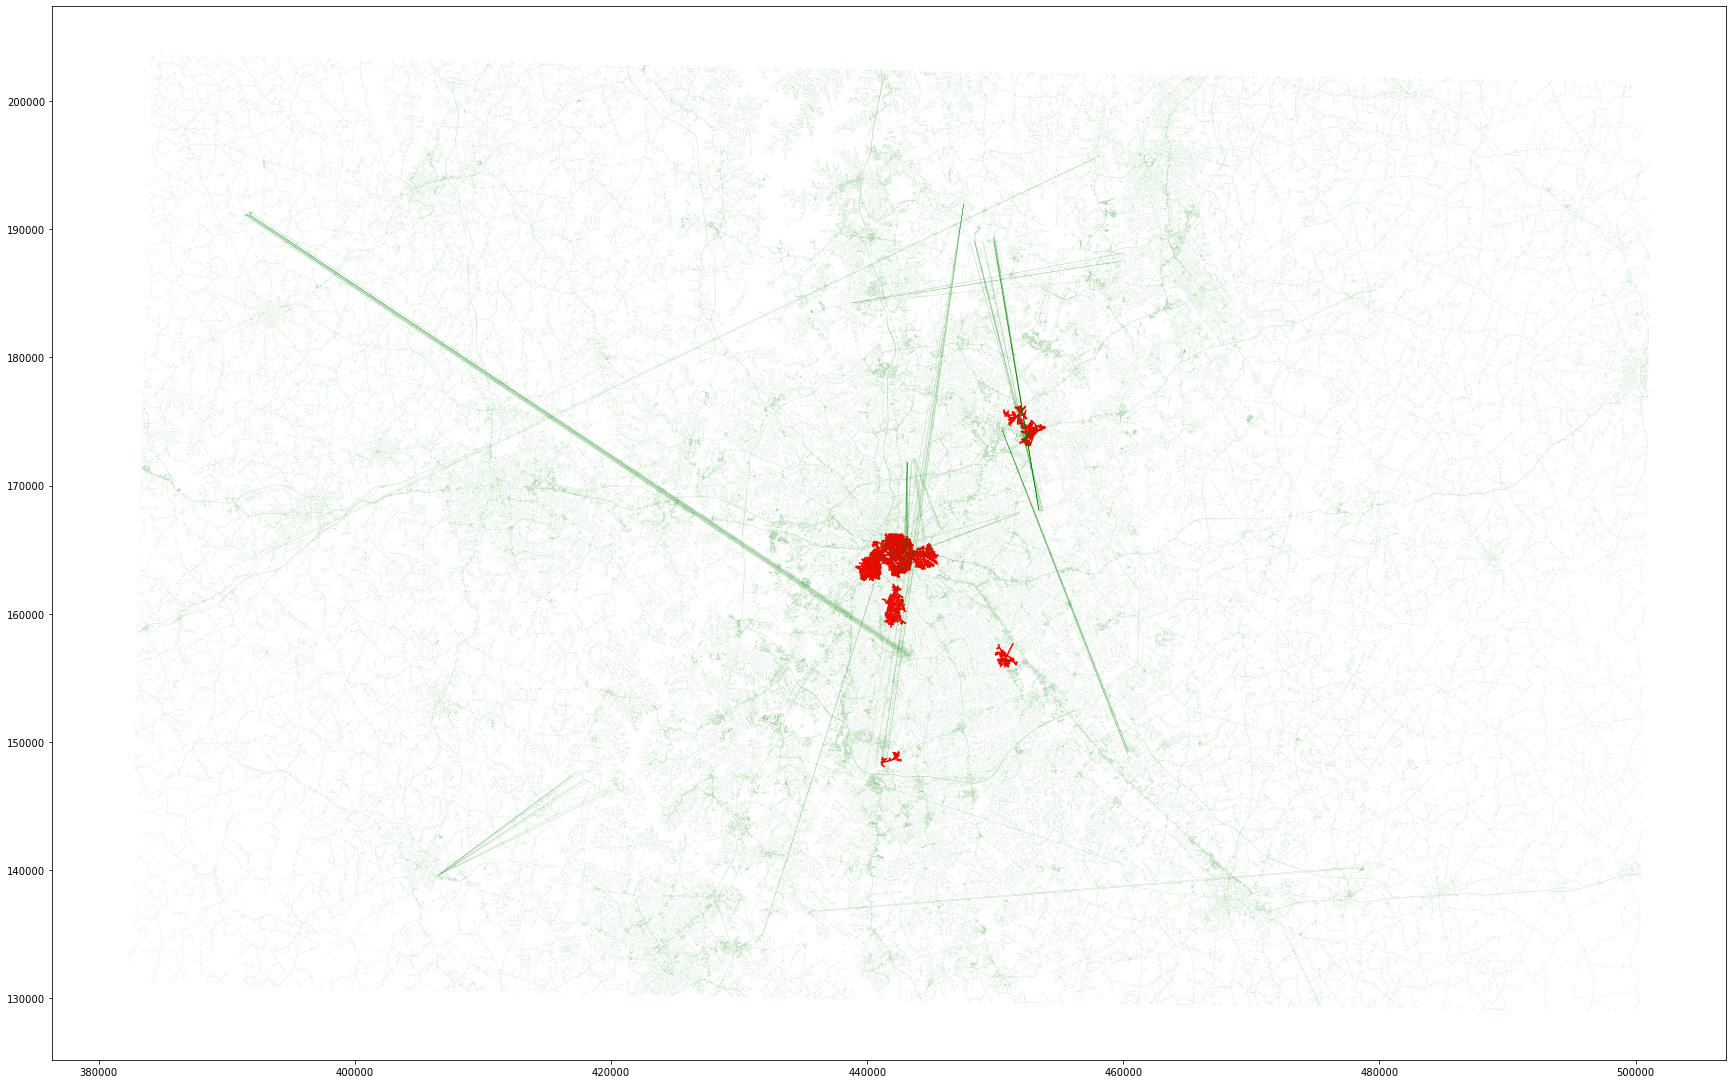

In [1124]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [1125]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                    name    ref           type  oneway  bridge  \
22444  16660927           Oriole Street   None    residential       0       0   
22477  16661103         East 3rd Street  NC 16        primary       1       0   
22479  16661116                    None   None  motorway_link       1       0   
22504  16661325  John Belk Freeway West   None  motorway_link       1       0   
22542  16661548                    None   None  motorway_link       1       0   

       maxspeed                                           geometry  
22444       NaN  LINESTRING (441660.798 163964.844, 441635.646 ...  
22477       NaN  LINESTRING (442931.864 163932.844, 442926.345 ...  
22479       NaN  LINESTRING (442702.976 165980.336, 442650.238 ...  
22504       NaN  LINESTRING (441362.647 164652.176, 441415.011 ...  
22542       NaN  MULTILINESTRING ((442169.721 164120.870, 44216...

In [1126]:
#ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Intersect

In [1127]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  buff_dist  buffer_area  \
0  393.654456  18.547945   5.958904   1236.0  ...       0.75     1.161319   
1  393.654456  18.547945   5.958904   1236.0  ...       0.75     1.161319   
2  393.654456  18.547945   5.958904   1236.0  ...       0.75     1.161319   
3  393.654456  18.547945   5.958904   1236.0  ...       0.75     1.161319   
4  393.654456  18.547945   5.958904   1236.0  ...       0.75     1.161319   

     osm_id                 name   ref         type  oneway bridge maxspeed  \
0  16662829        Wilmore Drive  None  residential       0      0      NaN   
1  16662982     Lyndhurst Avenue  None  residential       0      0      NaN   
2  16663139  Mather Green Avenue  None  residential       0      0      NaN   
3  16663203       East Boulevard  None    secondary       0      0      NaN   
4  16663215  Distribution Street  None  residential       0      0      NaN   

                                            geometry  
0  LINESTRING (439384.197 164017.998, 439395.794 ...  
1  LINESTRING (440989.124 163649.386, 440971.272 ...  
2  LINESTRING (440304.191 162896.085, 440315.165 ...  
3  LINESTRING (440398.522 163816.000, 440401.060 ...  
4  LINESTRING (439724.594 163275.759, 439706.855 ...  

[5 rows x 24 columns]

# Calculate the length of the road segments

In [1128]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id        site_name sensor_type  year     region  travel_pattern  \
0  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
2  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA  Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  buffer_area    osm_id  \
0  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16662829   
1  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16662982   
2  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16663139   
3  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16663203   
4  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16663215   

                  name   ref         type  oneway  bridge maxspeed  \
0        Wilmore Drive  None  residential       0       0      NaN   
1     Lyndhurst Avenue  None  residential       0       0      NaN   
2  Mather Green Avenue  None  residential       0       0      NaN   
3       East Boulevard  None    secondary       0       0      NaN   
4  Distribution Street  None  residential       0       0      NaN   

                                            geometry       Length  
0  LINESTRING (439384.197 164017.998, 439395.794 ...   196.821713  
1  LINESTRING (440989.124 163649.386, 440971.272 ...  3583.991408  
2  LINESTRING (440304.191 162896.085, 440315.165 ...   442.536782  
3  LINESTRING (440398.522 163816.000, 440401.060 ...   389.952740  
4  LINESTRING (439724.594 163275.759, 439706.855 ...  1255.950529  

[5 rows x 25 columns]

# Aggregrate the road functional class

In [1129]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type        
16694967.0     footway          5737.684346
               path             9460.919565
               residential     19938.703572
               secondary        6683.759938
               service         50682.304071
                                   ...     
493705004.0    primary_link      192.543075
               residential     56394.953137
               service         32504.968898
               tertiary        20496.774737
               unclassified      230.002157
Name: Length, Length: 162, dtype: float64

# Calculate the primary road

In [1130]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id       Primary
0   34764115.0  20099.671456
1   51062797.0  26227.720779
2   51062957.0  15584.165339
3   55186886.0  13441.874864
4  169185539.0  45031.440811

In [1131]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Secondary
0  16694967.0    6683.759938
1  16701397.0   35183.323831
2  34764115.0   64021.967749
3  51062797.0  234554.890492
4  51062957.0   87213.646190

In [1132]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Tertiary
0  16694967.0    653.323418
1  16701397.0  17707.160223
2  34764115.0   3845.626440
3  51062797.0   3497.621835
4  51062957.0   8851.083569

In [1133]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  16694967.0      19938.703572
1  16701397.0      74790.431584
2  34764115.0      41498.975111
3  51062797.0     138289.498552
4  51062957.0      79879.874786

In [1134]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         Path
0   16694967.0  9460.919565
1   51062797.0   789.413174
2   51062957.0   432.876720
3  156886419.0   499.267494
4  169185539.0  4174.986250

In [1135]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id       Cycleway
0  16701397.0   21078.195295
1  34764115.0   12191.675151
2  51062797.0   87259.997051
3  51062957.0  102741.507719
4  55186886.0   10139.920596

In [1136]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id        Footway
0  16694967.0    5737.684346
1  16701397.0   11615.264410
2  34764115.0   54575.228972
3  51062797.0  256910.756742
4  51062957.0  124153.695673

# Calculcate the mean Speed

In [1137]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    341.000000
mean      38.577713
std       12.883550
min       10.000000
25%       25.000000
50%       45.000000
75%       50.000000
max       55.000000
Name: maxspeed, dtype: float64

In [1138]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id           site_name sensor_type  year     region  travel_pattern  \
6   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   
12  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
13  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
15  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  buffer_area    osm_id  \
6   393.654456  18.547945   5.958904   1236.0  ...     1.161319  16663359   
7    33.307341   2.438356   1.136986   1443.0  ...     1.052487  16663359   
12  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16664222   
13  149.292520  11.630137   4.780822   2049.0  ...     1.030269  16664222   
15  393.654456  18.547945   5.958904   1236.0  ...     1.161319  16664916   

                    name   ref         type  oneway  bridge maxspeed  \
6            Romany Road  None  residential       0       0     25.0   
7            Romany Road  None  residential       0       0     25.0   
12  West Kingston Avenue  None  residential       0       0     35.0   
13  West Kingston Avenue  None  residential       0       0     35.0   
15        Hawkins Street  None  residential       0       0     35.0   

                                             geometry       Length  
6   LINESTRING (441089.143 163613.836, 441091.214 ...   197.282550  
7   LINESTRING (441839.990 163097.018, 441843.541 ...   586.947257  
12  LINESTRING (440469.494 163948.010, 440434.022 ...  2759.880406  
13  LINESTRING (440469.494 163948.010, 440434.022 ...   929.138476  
15  LINESTRING (440339.369 164025.338, 440324.834 ...  3307.494206  

[5 rows x 25 columns]

In [1139]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id        site_name sensor_type  year     region  \
0    362  P001CHA  Blue Line Trail   permanent  2019  Charlotte   
1   1327  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
2   1328  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
3   1330  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
4   1357  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  ...  buffer_area  \
0             3.0  393.654456  18.547945   5.958904  ...     1.161319   
1             3.0   39.364881  15.465753   2.945205  ...     0.821662   
2             3.0   39.364881  15.465753   2.945205  ...     0.821662   
3             3.0   39.364881  15.465753   2.945205  ...     0.821662   
4             3.0   39.364881  15.465753   2.945205  ...     0.821662   

      osm_id            name     ref     type oneway  bridge  maxspeed  \
0  748536651  West Boulevard  NC 160  primary      0       0      55.0   
1  550789886   Woodlawn Road   CLT 4  primary      0       0      35.0   
2  550789887   Woodlawn Road   CLT 4  primary      1       0      35.0   
3  550789889   Woodlawn Road   CLT 4  primary      1       0      35.0   
4  652215875  Runnymede Lane   CLT 4  primary      0       0      35.0   

                                            geometry       Length  
0  LINESTRING (439532.623 164260.998, 439533.689 ...  2117.950735  
1  LINESTRING (441634.606 159197.018, 441652.574 ...   559.775829  
2  LINESTRING (441325.434 159341.255, 441326.084 ...   227.692025  
3  LINESTRING (441398.132 159314.001, 441383.372 ...   289.698529  
4  LINESTRING (442091.563 159120.831, 442058.649 ...   646.061941  

[5 rows x 26 columns]

In [1140]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id        site_name sensor_type  year     region  \
0    362  P001CHA  Blue Line Trail   permanent  2019  Charlotte   
1   1327  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
2   1328  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
3   1330  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   
4   1357  P003CHA    Selwyn Avenue   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  ...  buffer_area  \
0             3.0  393.654456  18.547945   5.958904  ...     1.161319   
1             3.0   39.364881  15.465753   2.945205  ...     0.821662   
2             3.0   39.364881  15.465753   2.945205  ...     0.821662   
3             3.0   39.364881  15.465753   2.945205  ...     0.821662   
4             3.0   39.364881  15.465753   2.945205  ...     0.821662   

      osm_id            name     ref     type oneway  bridge  maxspeed  \
0  748536651  West Boulevard  NC 160  primary      0       0      55.0   
1  550789886   Woodlawn Road   CLT 4  primary      0       0      35.0   
2  550789887   Woodlawn Road   CLT 4  primary      1       0      35.0   
3  550789889   Woodlawn Road   CLT 4  primary      1       0      35.0   
4  652215875  Runnymede Lane   CLT 4  primary      0       0      35.0   

                                            geometry       Length  
0  LINESTRING (439532.623 164260.998, 439533.689 ...  2117.950735  
1  LINESTRING (441634.606 159197.018, 441652.574 ...   559.775829  
2  LINESTRING (441325.434 159341.255, 441326.084 ...   227.692025  
3  LINESTRING (441398.132 159314.001, 441383.372 ...   289.698529  
4  LINESTRING (442091.563 159120.831, 442058.649 ...   646.061941  

[5 rows x 26 columns]

In [1141]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].agg(lambda x: pd.Series.mode(x).iat[0]).reset_index() # revised
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  16694967.0      25.0
1  16701397.0      35.0
2  34764115.0      35.0
3  51062797.0      30.0
4  51062957.0      15.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [1142]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1143]:
ecoshort.head()

site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  latitude  longitude  \
0   393.654456  18.547945   5.958904   1236.0  35.20964  -80.86114   
7   160.742460  16.082192   4.602740    740.0  35.21828  -80.81436   
14   39.364881  15.465753   2.945205    328.0  35.17844  -80.83725   
21  149.292520  11.630137   4.780822   2049.0  35.22164  -80.85036   
28   33.307341   2.438356   1.136986   1443.0  35.21468  -80.83834   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                       geometry  min_dist_to_school  \
0        2.0  POINT (440167.090 163506.089)         2421.857994   
7        2.0  POINT (444442.876 164385.527)         1687.108336   
14       2.0  POINT (442277.682 160005.150)         3001.458672   
21       2.0  POINT (441173.175 164818.677)         2534.811945   
28       2.0  POINT (442252.867 164026.406)         2069.054243   

    min_dist_to_college  min_dist_to_university lanes  
0           9586.368741             8278.354216     4  
7           4478.048087             7268.572020     2  
14         14595.415186             3924.702931     2  
21          5169.515202             3389.043815     2  
28          2614.970164             5081.975065     2

In [1144]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (383839.456 158392.305, 383903.780 ...  
1  LINESTRING (390807.757 157847.719, 390814.730 ...  
2  LINESTRING (390843.218 157803.631, 390836.804 ...  
3  LINESTRING (384246.161 159963.739, 384248.089 ...  
4  LINESTRING (388690.740 151697.084, 388684.485 ...

In [1145]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:3358
epsg:3358


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1146]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index    osm_id                       name     ref     type  oneway  \
0    147  12155255                   S-11-658    None  primary       0   
1    401  12454692             Waxhaw Highway   SC 75  primary       0   
2   1147  12553511         Highway 321 Bypass  US 321  primary       0   
3   1189  12553602  South Dave Lyle Boulevard  SC 122  primary       0   
4   1339  12553897  South Dave Lyle Boulevard    None  primary       0   

   bridge  maxspeed                                           geometry  
0       0       NaN  LINESTRING (386249.747 159481.689, 386260.745 ...  
1       0       NaN  LINESTRING (444689.062 130420.094, 445381.236 ...  
2       0      45.0  LINESTRING (404486.558 139040.278, 404472.086 ...  
3       1       NaN  LINESTRING (424023.491 132228.429, 424042.762 ...  
4       0       NaN  LINESTRING (423952.850 132159.921, 423911.406 ...

# In the below pline distance, you can see counter is located little far away from the link

In [1147]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1148]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [1149]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [1150]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1151]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0   393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
7   160.742460  16.082192   4.602740    740.0  ...  -80.81436   
14   39.364881  15.465753   2.945205    328.0  ...  -80.83725   
21  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   
28   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   

                                              comment osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane    55186886.0   
7   Sidewalk + bike lane, Street is divided in str...    16701397.0   
14  Separated Sidewalk North, divided in strava-os...   493705004.0   
21                                                NaN    34764115.0   
28                                                NaN   322993730.0   

    buff_dist                       geometry min_dist_to_school  \
0         2.0  POINT (440167.090 163506.089)        2421.857994   
7         2.0  POINT (444442.876 164385.527)        1687.108336   
14        2.0  POINT (442277.682 160005.150)        3001.458672   
21        2.0  POINT (441173.175 164818.677)        2534.811945   
28        2.0  POINT (442252.867 164026.406)        2069.054243   

    min_dist_to_college  min_dist_to_university  lanes maxspeed  
0           9586.368741             8278.354216      4     35.0  
7           4478.048087             7268.572020      2     25.0  
14         14595.415186             3924.702931      2     25.0  
21          5169.515202             3389.043815      2     20.0  
28          2614.970164             5081.975065      2     25.0  

[5 rows x 21 columns]

In [1152]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id  site_name sensor_type  year     region  travel_pattern      AADBT  \
0  P002CHA  Pecan Ave   permanent  2019  Charlotte             3.0  160.74246   

     stv_adb  stv_c_adb  stl_raw  ...  maxspeed_x  index    osm_id  \
0  16.082192    4.60274    740.0  ...        25.0  33127  16701397   

           name   ref      type  oneway  bridge  maxspeed_y  \
0  Pecan Avenue  None  tertiary       0       0        25.0   

                                          geometry_y  
0  LINESTRING (444110.190 163719.167, 444122.366 ...  

[1 rows x 30 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

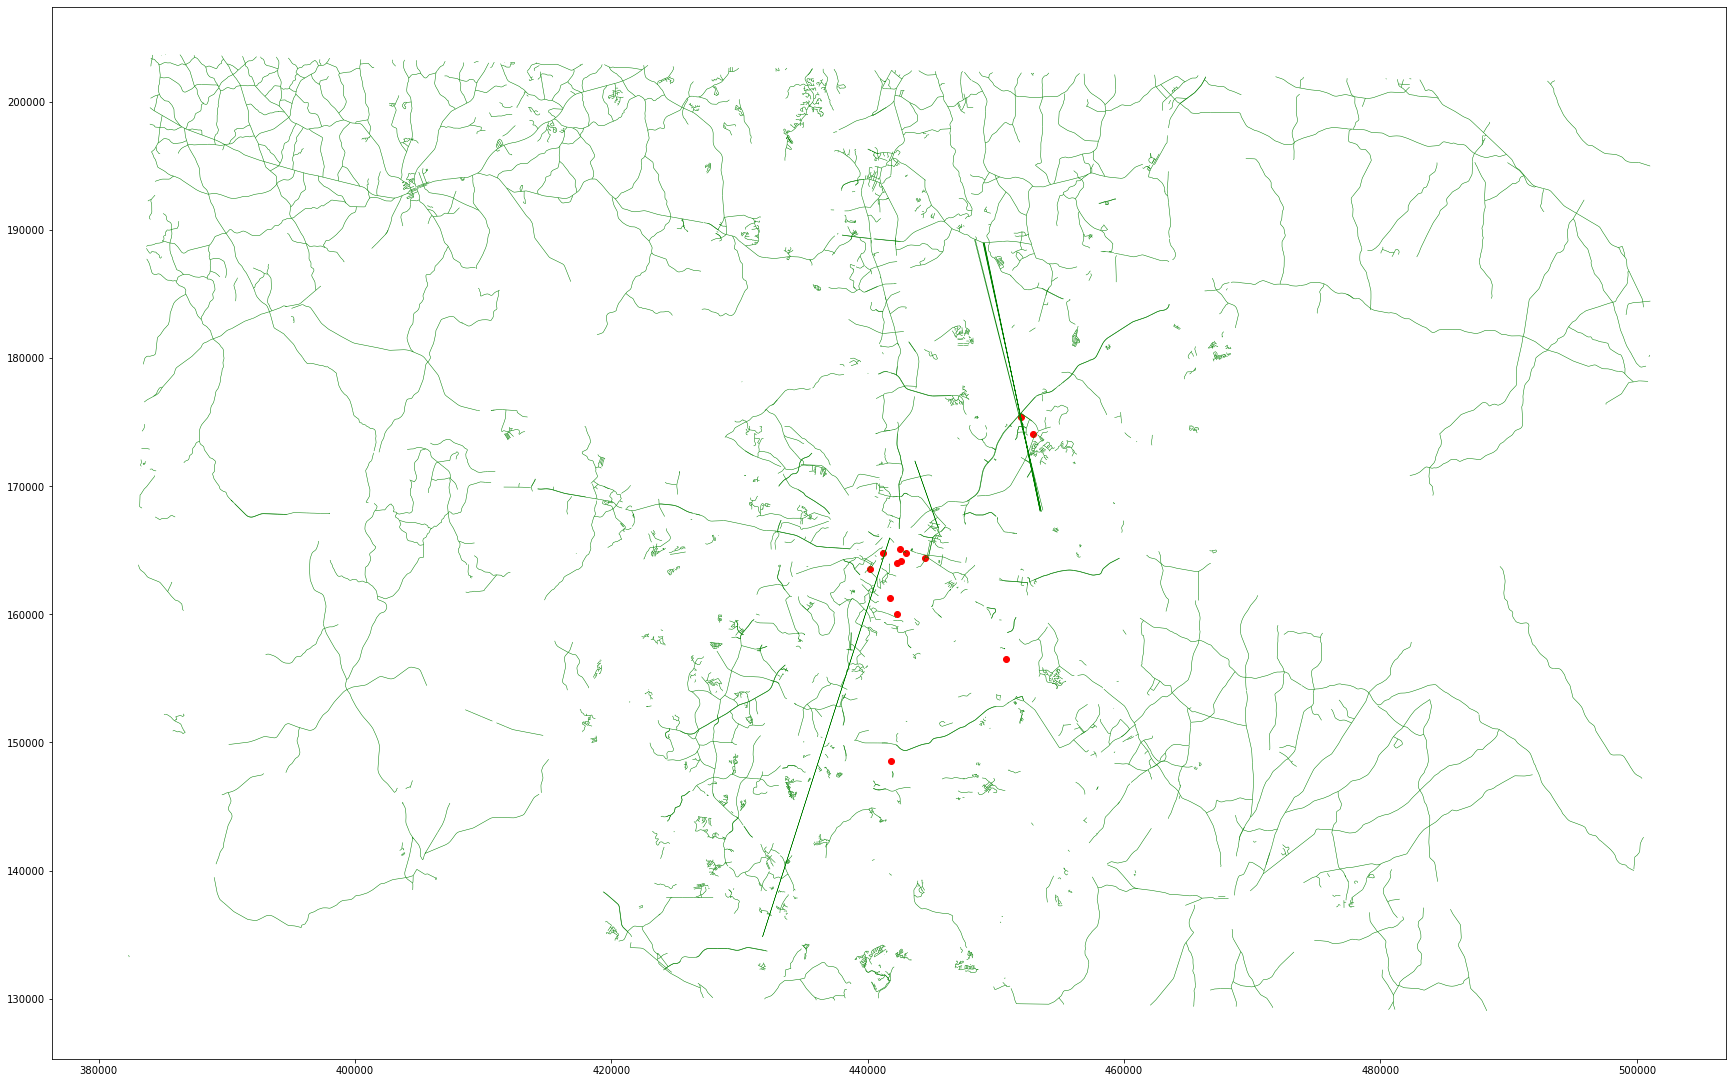

In [1153]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [1154]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0      16694967.0      25.0
1      16701397.0      25.0
2      34764115.0      20.0
3      51062797.0      30.0
4      51062957.0      30.0
5      55186886.0      35.0
6     156886419.0      35.0
7     169185539.0      55.0
8     235076258.0      30.0
9     322993730.0      25.0
10    422138643.0      30.0
11    492433486.0      45.0
12    493705004.0      25.0

In [1155]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0    16694967.0         25.0
1    16701397.0         25.0
2    34764115.0         20.0
3    51062797.0         30.0
4    51062957.0         30.0
5    55186886.0         35.0
6   156886419.0         35.0
7   169185539.0         55.0
8   235076258.0         30.0
9   322993730.0         25.0
10  422138643.0         30.0
11  492433486.0         45.0
12  493705004.0         25.0

In [1156]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'buff_dist',
       'geometry_x', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_x', 'index', 'osm_id',
       'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [1157]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0  16701397.0      25.0

# Calculate the road type of the closest link of count station

In [1158]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1159]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index    osm_id                       name     ref     type  oneway  \
0    147  12155255                   S-11-658    None  primary       0   
1    401  12454692             Waxhaw Highway   SC 75  primary       0   
2   1147  12553511         Highway 321 Bypass  US 321  primary       0   
3   1189  12553602  South Dave Lyle Boulevard  SC 122  primary       0   
4   1339  12553897  South Dave Lyle Boulevard    None  primary       0   

   bridge  maxspeed                                           geometry  
0       0       NaN  LINESTRING (386249.747 159481.689, 386260.745 ...  
1       0       NaN  LINESTRING (444689.062 130420.094, 445381.236 ...  
2       0      45.0  LINESTRING (404486.558 139040.278, 404472.086 ...  
3       1       NaN  LINESTRING (424023.491 132228.429, 424042.762 ...  
4       0       NaN  LINESTRING (423952.850 132159.921, 423911.406 ...

In [1160]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1161]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt

In [1162]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                   name   ref       type  oneway  bridge  \
0  44460   34764115     South Tryon Street  None  secondary       0       1   
1  45211   51062797        East 6th Street  None  secondary       1       0   
2  59911  322993730  East Stonewall Street  None  secondary       1       0   
3  33127   16701397           Pecan Avenue  None   tertiary       0       0   
4  45345   55186886   Charlotte Rail Trail  None   cycleway       0       0   

   maxspeed_x                                         geometry_x  site_id  \
0         NaN  LINESTRING (441220.192 164887.503, 441189.112 ...  P004CHA   
1         NaN  LINESTRING (442500.410 165107.257, 442463.640 ...  S002CHA   
2         NaN  LINESTRING (441780.898 164516.839, 441794.824 ...  P005CHA   
3        25.0  LINESTRING (444110.190 163719.167, 444122.366 ...  P002CHA   
4         NaN  LINESTRING (439676.119 162795.148, 439681.703 ...  P001CHA   

   ...  longitude                                            comment  \
0  ... -80.850360                                                NaN   
1  ... -80.835569                                                NaN   
2  ... -80.838340                                                NaN   
3  ... -80.814360  Sidewalk + bike lane, Street is divided in str...   
4  ... -80.861140             On top of bridge; Sidewalk + bike lane   

   osm_id_sensor buff_dist                     geometry_y  min_dist_to_school  \
0     34764115.0       2.0  POINT (441173.175 164818.677)         2534.811945   
1     51062797.0       2.0  POINT (442524.665 165081.281)         1579.390170   
2    322993730.0       2.0  POINT (442252.867 164026.406)         2069.054243   
3     16701397.0       2.0  POINT (444442.876 164385.527)         1687.108336   
4     55186886.0       2.0  POINT (440167.090 163506.089)         2421.857994   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed_y  
0          5169.515202             3389.043815      2        20.0  
1          1532.591446             1526.561398      3        30.0  
2          2614.970164             5081.975065      2        25.0  
3          4478.048087             7268.572020      2        25.0  
4          9586.368741             8278.354216      4        35.0  

[5 rows x 30 columns]

In [1163]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1164]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'buff_dist', 'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [1165]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id  road_type
0   34764115.0  secondary
1   51062797.0  secondary
2  322993730.0  secondary
3   16701397.0   tertiary
4   55186886.0   cycleway

# Convert this road catagory to binary as follows- 0 and 1

In [1166]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  road_type  primary_binary  secondary_binary  tertiary_binary  \
0   34764115.0  secondary               0                 1                0   
1   51062797.0  secondary               0                 1                0   
2  322993730.0  secondary               0                 1                0   
3   16701397.0   tertiary               0                 0                1   
4   55186886.0   cycleway               0                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                1               0

In [1167]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2=pt_road_type2.drop_duplicates(subset=['osm_id'],keep='first')
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0   34764115.0               0                 1                0   
1   51062797.0               0                 1                0   
2  322993730.0               0                 1                0   
3   16701397.0               0                 0                1   
4   55186886.0               0                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                1               0

# Calculate the Bridges

In [1168]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  16694967.0       1
1  16701397.0       1
2  34764115.0       1
3  51062797.0       1
4  51062957.0       1

# Calculate the bridge from spatial join of count location and bridge line shape file

In [1169]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id              name   ref         type  oneway  bridge  maxspeed  \
0  12144302       Quarry Road  None  residential       0       0       NaN   
1  12144313  Norman Lake Road  None  residential       0       0       NaN   
2  12144317  Norman Lake Road  None  residential       0       0       NaN   
3  12144336              None  None  residential       0       0       NaN   
4  12144365              None  None  residential       0       0       NaN   

                                            geometry  
0  LINESTRING (383839.456 158392.305, 383903.780 ...  
1  LINESTRING (390807.757 157847.719, 390814.730 ...  
2  LINESTRING (390843.218 157803.631, 390836.804 ...  
3  LINESTRING (384246.161 159963.739, 384248.089 ...  
4  LINESTRING (388690.740 151697.084, 388684.485 ...

In [1170]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [1171]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                 site_name sensor_type  year     region  \
0  P001CHA           Blue Line Trail   permanent  2019  Charlotte   
1  P002CHA                 Pecan Ave   permanent  2019  Charlotte   
2  P004CHA        South Tryon Street   permanent  2019  Charlotte   
3  P005CHA          Stonewall Street   permanent  2019  Charlotte   
4  P007CHA  Four Mile Creek Greenway   permanent  2019  Charlotte   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  lanes  \
0             3.0  393.654456  18.547945   5.958904   1236.0  ...      4   
1             3.0  160.742460  16.082192   4.602740    740.0  ...      2   
2             1.0  149.292520  11.630137   4.780822   2049.0  ...      2   
3             2.0   33.307341   2.438356   1.136986   1443.0  ...      2   
4             3.0  585.875325   4.753425   0.739726    795.0  ...      1   

   maxspeed_x     osm_id                      name   ref       type  oneway  \
0        35.0   55186886      Charlotte Rail Trail  None   cycleway       0   
1        25.0   16701397              Pecan Avenue  None   tertiary       0   
2        20.0   34764115        South Tryon Street  None  secondary       0   
3        25.0  322993730     East Stonewall Street  None  secondary       1   
4        35.0  156886419  Four Mile Creek Greenway  None   cycleway       0   

   bridge  maxspeed_y                                         geometry_y  
0       0         NaN  LINESTRING (439676.119 162795.148, 439681.703 ...  
1       0        25.0  LINESTRING (444110.190 163719.167, 444122.366 ...  
2       1         NaN  LINESTRING (441220.192 164887.503, 441189.112 ...  
3       0         NaN  LINESTRING (441780.898 164516.839, 441794.824 ...  
4       0         NaN  LINESTRING (441775.076 148537.578, 441783.858 ...  

[5 rows x 29 columns]

In [1172]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1173]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0     16701397.0       0
1     34764115.0       1
2     51062797.0       0
3     55186886.0       0
4    156886419.0       0

In [1174]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0   16701397.0             2
1   34764115.0             1
2   51062797.0             2
3   55186886.0             2
4  156886419.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [1175]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1176]:
nature_proj1.head(5)

osm_id                 name   type  \
0  23814228        Heritage Lake  water   
1  27479035          Cherry Park   park   
2  33153050  Rockwell Playground   park   
3  33173089    Bakers Creek Park   park   
4  33173423        Greenway Park   park   

                                            geometry  
0  POLYGON ((435491.760 147025.118, 435532.019 14...  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...

In [1177]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name  type  \
1  27479035          Cherry Park  park   
2  33153050  Rockwell Playground  park   
3  33173089    Bakers Creek Park  park   
4  33173423        Greenway Park  park   
5  33177241       Richfield Park  park   

                                            geometry  
1  POLYGON ((426255.504 135924.201, 426267.436 13...  
2  POLYGON ((481345.309 201183.155, 481360.678 20...  
3  POLYGON ((461562.704 196787.723, 461561.621 19...  
4  POLYGON ((461266.224 196439.110, 461286.351 19...  
5  POLYGON ((495209.223 192092.807, 495171.699 19...

In [1178]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  longitude  \
0   393.654456  18.547945   5.958904   1236.0  ...  -80.86114   
7   160.742460  16.082192   4.602740    740.0  ...  -80.81436   
14   39.364881  15.465753   2.945205    328.0  ...  -80.83725   
21  149.292520  11.630137   4.780822   2049.0  ...  -80.85036   
28   33.307341   2.438356   1.136986   1443.0  ...  -80.83834   

                                              comment osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane    55186886.0   
7   Sidewalk + bike lane, Street is divided in str...    16701397.0   
14  Separated Sidewalk North, divided in strava-os...   493705004.0   
21                                                NaN    34764115.0   
28                                                NaN   322993730.0   

    buff_dist                       geometry min_dist_to_school  \
0         2.0  POINT (440167.090 163506.089)        2421.857994   
7         2.0  POINT (444442.876 164385.527)        1687.108336   
14        2.0  POINT (442277.682 160005.150)        3001.458672   
21        2.0  POINT (441173.175 164818.677)        2534.811945   
28        2.0  POINT (442252.867 164026.406)        2069.054243   

    min_dist_to_college  min_dist_to_university  lanes maxspeed  
0           9586.368741             8278.354216      4     35.0  
7           4478.048087             7268.572020      2     25.0  
14         14595.415186             3924.702931      2     25.0  
21          5169.515202             3389.043815      2     20.0  
28          2614.970164             5081.975065      2     25.0  

[5 rows x 21 columns]

In [1179]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   393.654456  18.547945   5.958904   1236.0  ...   
7   160.742460  16.082192   4.602740    740.0  ...   
14   39.364881  15.465753   2.945205    328.0  ...   
21  149.292520  11.630137   4.780822   2049.0  ...   
28   33.307341   2.438356   1.136986   1443.0  ...   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (440167.090 163506.089)        2421.857994   
7        2.0  POINT (444442.876 164385.527)        1687.108336   
14       2.0  POINT (442277.682 160005.150)        3001.458672   
21       2.0  POINT (441173.175 164818.677)        2534.811945   
28       2.0  POINT (442252.867 164026.406)        2069.054243   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0          9586.368741             8278.354216      4      35.0   
7          4478.048087             7268.572020      2      25.0   
14        14595.415186             3924.702931      2      25.0   
21         5169.515202             3389.043815      2      20.0   
28         2614.970164             5081.975065      2      25.0   

   min_dist_to_polygon  
0          2080.997334  
7          2446.198254  
14         2421.852145  
21         1246.154834  
28          423.076936  

[5 rows x 22 columns]

In [1180]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1=Park_distance1.drop_duplicates(subset=['osm_id'],keep='first')
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0    55186886.0       2080.997334
7    16701397.0       2446.198254
14  493705004.0       2421.852145
21   34764115.0       1246.154834
28  322993730.0        423.076936

# cc distance to park

In [1181]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1=parkcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0    55186886.0              2111.537047
7    16701397.0              3040.452097
14  493705004.0              2614.827927
21   34764115.0              1335.506123
28  322993730.0               758.692676

# Distance to water body

In [1182]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id           name   type  \
0   23814228  Heritage Lake  water   
60  38967384           None  water   
61  38975259           None  water   
62  38975267           None  water   
63  38975307           None  water   

                                             geometry  
0   POLYGON ((435491.760 147025.118, 435532.019 14...  
60  POLYGON ((384380.315 179890.384, 384384.689 17...  
61  POLYGON ((388594.128 135719.286, 388608.634 13...  
62  POLYGON ((385500.663 160908.324, 385497.196 16...  
63  POLYGON ((388155.219 187935.740, 388156.531 18...

In [1183]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   393.654456  18.547945   5.958904   1236.0  ...   
7   160.742460  16.082192   4.602740    740.0  ...   
14   39.364881  15.465753   2.945205    328.0  ...   
21  149.292520  11.630137   4.780822   2049.0  ...   
28   33.307341   2.438356   1.136986   1443.0  ...   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (440167.090 163506.089)        2421.857994   
7        2.0  POINT (444442.876 164385.527)        1687.108336   
14       2.0  POINT (442277.682 160005.150)        3001.458672   
21       2.0  POINT (441173.175 164818.677)        2534.811945   
28       2.0  POINT (442252.867 164026.406)        2069.054243   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0          9586.368741             8278.354216      4      35.0   
7          4478.048087             7268.572020      2      25.0   
14        14595.415186             3924.702931      2      25.0   
21         5169.515202             3389.043815      2      20.0   
28         2614.970164             5081.975065      2      25.0   

   min_dist_to_polygon  
0          4045.092369  
7          1836.751844  
14         2547.718353  
21         1956.233284  
28         1304.953768  

[5 rows x 22 columns]

In [1184]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1=water_distance1.drop_duplicates(subset=['osm_id'],keep='first')
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0    55186886.0             4045.092369
7    16701397.0             1836.751844
14  493705004.0             2547.718353
21   34764115.0             1956.233284
28  322993730.0             1304.953768

In [1185]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1=watercc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0    55186886.0               5239.440906
7    16701397.0               1921.672883
14  493705004.0               2817.420436
21   34764115.0               1989.801454
28  322993730.0               1574.603728

# Distance To  Forest

In [1186]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type                                           geometry
21  38619253  None  forest  POLYGON ((434227.520 156112.819, 434234.367 15...
22  38619260  None  forest  POLYGON ((437701.113 155779.271, 437584.975 15...
26  38619329  None  forest  POLYGON ((435181.396 157806.318, 435157.239 15...
32  38619426  None  forest  POLYGON ((435181.396 157806.318, 435228.956 15...
37  38619485  None  forest  POLYGON ((435312.955 157567.214, 435368.395 15...

In [1187]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   393.654456  18.547945   5.958904   1236.0  ...   
7   160.742460  16.082192   4.602740    740.0  ...   
14   39.364881  15.465753   2.945205    328.0  ...   
21  149.292520  11.630137   4.780822   2049.0  ...   
28   33.307341   2.438356   1.136986   1443.0  ...   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (440167.090 163506.089)        2421.857994   
7        2.0  POINT (444442.876 164385.527)        1687.108336   
14       2.0  POINT (442277.682 160005.150)        3001.458672   
21       2.0  POINT (441173.175 164818.677)        2534.811945   
28       2.0  POINT (442252.867 164026.406)        2069.054243   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0          9586.368741             8278.354216      4      35.0   
7          4478.048087             7268.572020      2      25.0   
14        14595.415186             3924.702931      2      25.0   
21         5169.515202             3389.043815      2      20.0   
28         2614.970164             5081.975065      2      25.0   

   min_dist_to_polygon  
0          3650.756977  
7          4098.111452  
14         2028.599249  
21         2223.186864  
28         3510.597763  

[5 rows x 22 columns]

In [1188]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1=forest_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0    55186886.0         3650.756977
7    16701397.0         4098.111452
14  493705004.0         2028.599249
21   34764115.0         2223.186864
28  322993730.0         3510.597763

In [1189]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1=forestcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0    55186886.0                3730.256370
7    16701397.0                4303.909022
14  493705004.0                2383.035097
21   34764115.0                2483.076496
28  322993730.0                3618.818813

# Distance to green space area

In [1190]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name   type                                           geometry
46  131139726  None  grass  POLYGON ((440892.306 165305.010, 440892.290 16...
84  215648887  None  grass  POLYGON ((446172.941 151165.763, 446178.189 15...
85  215648889  None  grass  POLYGON ((445843.375 150599.880, 445851.845 15...
86  215648892  None  grass  POLYGON ((445937.580 150681.563, 445943.013 15...
87  215648894  None  grass  POLYGON ((446316.381 150714.161, 446321.784 15...

In [1191]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0   393.654456  18.547945   5.958904   1236.0  ...   
7   160.742460  16.082192   4.602740    740.0  ...   
14   39.364881  15.465753   2.945205    328.0  ...   
21  149.292520  11.630137   4.780822   2049.0  ...   
28   33.307341   2.438356   1.136986   1443.0  ...   

                                              comment  osm_id_sensor  \
0              On top of bridge; Sidewalk + bike lane     55186886.0   
7   Sidewalk + bike lane, Street is divided in str...     16701397.0   
14  Separated Sidewalk North, divided in strava-os...    493705004.0   
21                                                NaN     34764115.0   
28                                                NaN    322993730.0   

   buff_dist                       geometry min_dist_to_school  \
0        2.0  POINT (440167.090 163506.089)        2421.857994   
7        2.0  POINT (444442.876 164385.527)        1687.108336   
14       2.0  POINT (442277.682 160005.150)        3001.458672   
21       2.0  POINT (441173.175 164818.677)        2534.811945   
28       2.0  POINT (442252.867 164026.406)        2069.054243   

   min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0          9586.368741             8278.354216      4      35.0   
7          4478.048087             7268.572020      2      25.0   
14        14595.415186             3924.702931      2      25.0   
21         5169.515202             3389.043815      2      20.0   
28         2614.970164             5081.975065      2      25.0   

   min_dist_to_polygon  
0           366.312497  
7          1447.171640  
14          957.842459  
21          629.654508  
28           51.706475  

[5 rows x 22 columns]

In [1192]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1=grass_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0    55186886.0         366.312497
7    16701397.0        1447.171640
14  493705004.0         957.842459
21   34764115.0         629.654508
28  322993730.0          51.706475

In [1193]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1=grasscc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0    55186886.0                426.209997
7    16701397.0               1541.567085
14  493705004.0               1007.027016
21   34764115.0                719.953119
28  322993730.0                254.748090

# Distance to commercial

In [1194]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1=commercial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0    55186886.0                   363.805300
7    16701397.0                  6610.068986
14  493705004.0                  9141.597278
21   34764115.0                  4614.489336
28  322993730.0                  5827.586238

In [1195]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1=commercialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0    55186886.0                          606.147251
7    16701397.0                         6815.327861
14  493705004.0                         9251.281341
21   34764115.0                         4884.096811
28  322993730.0                         5966.239053

# Distance to industrial area

In [1196]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1=industrial_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0    55186886.0                  4684.845876
7    16701397.0                  9938.051283
14  493705004.0                 17615.566183
21   34764115.0                  2405.231867
28  322993730.0                  6760.575755

In [1197]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1=industrialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0    55186886.0                    4886.112213
7    16701397.0                   10472.979777
14  493705004.0                   17885.668899
21   34764115.0                    3284.616158
28  322993730.0                    7524.176706

# Distance to Retail area

In [1198]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1=retail_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0    55186886.0                71.241110
7    16701397.0                93.581799
14  493705004.0              3095.930792
21   34764115.0              1793.869486
28  322993730.0              4253.862593

In [1199]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1=retailcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0    55186886.0                 506.644258
7    16701397.0                 717.829040
14  493705004.0                3915.593206
21   34764115.0                1852.946812
28  322993730.0                4581.762679

# Distance to Residential

In [1200]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1=residential_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0    55186886.0                   2105.167252
7    16701397.0                    968.941549
14  493705004.0                   4757.839836
21   34764115.0                   2941.270885
28  322993730.0                   1975.050802

In [1201]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1=residentialcc_distance1.drop_duplicates(subset=['osm_id'],keep='first')
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0    55186886.0                     2394.550560
7    16701397.0                     2779.921585
14  493705004.0                     5021.429426
21   34764115.0                     3298.256658
28  322993730.0                     2179.475405

# Import the OSM Building file and use Portland City Hall as the CBD, then calculate the distance from CBD

In [1202]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                      name        type  \
0  16435362                      None        None   
1  23814730                      None        None   
2  28434713  Empire Pizza, Bar, Grill  restaurant   
3  28434716                      None        None   
4  28434717                   Hooters  restaurant   

                                            geometry  
0  POLYGON ((-80.69522 35.35338, -80.69533 35.353...  
1  POLYGON ((-80.91342 35.05931, -80.91259 35.058...  
2  POLYGON ((-80.99106 34.97741, -80.99097 34.977...  
3  POLYGON ((-80.99170 34.97720, -80.99163 34.977...  
4  POLYGON ((-80.99190 34.97768, -80.99181 34.977...

In [1203]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=3358)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.name=='Charlotte City Hall')]
bld_proj1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name      type  \
2775  322278241  Charlotte City Hall  townhall   

                                               geometry  
2775  POLYGON ((442293.009 164820.774, 442259.442 16...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

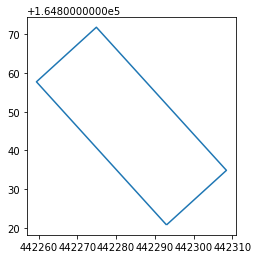

In [1204]:
bld_proj1.geometry.boundary.plot()

In [1205]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name      type                       geometry
2775  322278241  Charlotte City Hall  townhall  POINT (442283.958 164846.283)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

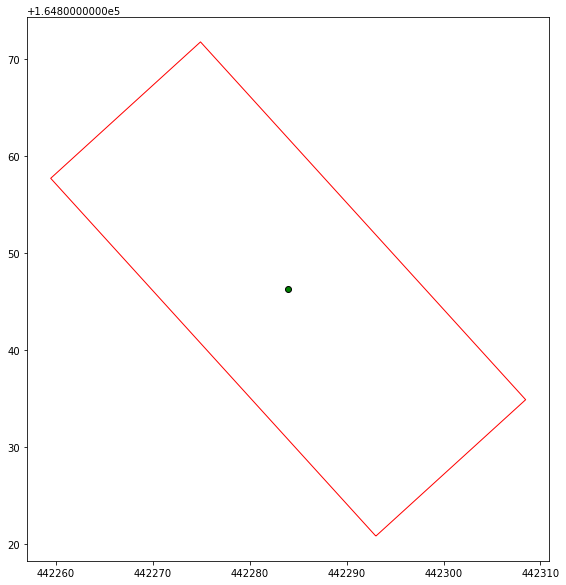

In [1206]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [1207]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  osm_id_sensor  buff_dist  \
0   393.654456  18.547945   5.958904   1236.0  ...     55186886.0        2.0   
7   160.742460  16.082192   4.602740    740.0  ...     16701397.0        2.0   
14   39.364881  15.465753   2.945205    328.0  ...    493705004.0        2.0   
21  149.292520  11.630137   4.780822   2049.0  ...     34764115.0        2.0   
28   33.307341   2.438356   1.136986   1443.0  ...    322993730.0        2.0   

                         geometry  min_dist_to_school min_dist_to_college  \
0   POINT (440167.090 163506.089)         2421.857994         9586.368741   
7   POINT (444442.876 164385.527)         1687.108336         4478.048087   
14  POINT (442277.682 160005.150)         3001.458672        14595.415186   
21  POINT (441173.175 164818.677)         2534.811945         5169.515202   
28  POINT (442252.867 164026.406)         2069.054243         2614.970164   

   min_dist_to_university  lanes  maxspeed  min_dist_to_polygon  \
0             8278.354216      4      35.0          2394.550560   
7             7268.572020      2      25.0          2779.921585   
14            3924.702931      2      25.0          5021.429426   
21            3389.043815      2      20.0          3298.256658   
28            5081.975065      2      25.0          2179.475405   

   min_dist_to_CBD  
0      8219.960278  
7      7242.577692  
14    15882.995661  
21     3645.426147  
28     2691.820923  

[5 rows x 23 columns]

In [1208]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0    55186886.0      8219.960278
7    16701397.0      7242.577692
14  493705004.0     15882.995661
21   34764115.0      3645.426147
28  322993730.0      2691.820923

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [693]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  \
0  POLYGON ((1469580.256 -28293.846, 1469621.427 ...   
1  POLYGON ((1470127.869 -28927.264, 1470120.113 ...   
2  POLYGON ((1470300.848 -29763.187, 1470279.817 ...   
3  POLYGON ((1470654.010 -28431.508, 1470667.060 ...   
4  POLYGON ((1473132.528 -29862.466, 1472673.139 ...   

                                           wktcolumn  
0  POLYGON ((1469580.2562000006 -28293.8456999994...  
1  POLYGON ((1470127.8685000017 -28927.2642999999...  
2  POLYGON ((1470300.8480000012 -29763.1872000005...  
3  POLYGON ((1470654.0102000013 -28431.5083000008...  
4  POLYGON ((1473132.5280000009 -29862.4664999991...

In [694]:
bg.shape

(6127, 17)

In [695]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [696]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  
0  POLYGON ((1469580.256 -28293.846, 1469621.427 ...  
1  POLYGON ((1470127.869 -28927.264, 1470120.113 ...  
2  POLYGON ((1470300.848 -29763.187, 1470279.817 ...  
3  POLYGON ((1470654.010 -28431.508, 1470667.060 ...  
4  POLYGON ((1473132.528 -29862.466, 1472673.139 ...

In [697]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:3358')
bg_proj.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  
0  POLYGON ((569549.337 261011.690, 569587.878 26...  
1  POLYGON ((569979.658 260297.634, 569969.427 26...  
2  POLYGON ((570001.577 259452.138, 569978.761 25...  
3  POLYGON ((570591.120 260688.296, 570601.863 26...  
4  POLYGON ((572796.199 258856.442, 572358.504 25...

In [698]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  AWATER     INTPTLAT  \
0  Block Group 1  G5030        S   983262.0     0.0  +36.0991247   
1  Block Group 2  G5030        S  1196525.0     0.0  +36.0922109   
2  Block Group 3  G5030        S  1352647.0     0.0  +36.0835374   
3  Block Group 4  G5030        S   979253.0     0.0  +36.0938695   
4  Block Group 1  G5030        S  1017947.0     0.0  +36.0889597   

       INTPTLON   Shape_Leng    Shape_Area  \
0  -079.4483765  4219.657537  9.832628e+05   
1  -079.4507937  5560.284248  1.196524e+06   
2  -079.4454912  6166.325038  1.352646e+06   
3  -079.4366101  4466.313064  9.792536e+05   
4  -079.4121098  4084.416155  1.017947e+06   

                                            geometry  Total block Area  
0  POLYGON ((569549.337 261011.690, 569587.878 26...      9.832279e+05  
1  POLYGON ((569979.658 260297.634, 569969.427 26...      1.196477e+06  
2  POLYGON ((570001.577 259452.138, 569978.761 25...      1.352588e+06  
3  POLYGON ((570591.120 260688.296, 570601.863 26...      9.792166e+05  
4  POLYGON ((572796.199 258856.442, 572358.504 25...      1.017906e+06

In [699]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA           STATE  STATEA  \
0  G37000100201001  2014-2018      NaN        NaN  North Carolina      37   
1  G37000100201002  2014-2018      NaN        NaN  North Carolina      37   
2  G37000100201003  2014-2018      NaN        NaN  North Carolina      37   
3  G37000100201004  2014-2018      NaN        NaN  North Carolina      37   
4  G37000100202001  2014-2018      NaN        NaN  North Carolina      37   

            COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AJWNM001  AJWNM002  \
0  Alamance County        1      NaN     NaN  ...       211       190   
1  Alamance County        1      NaN     NaN  ...       166       159   
2  Alamance County        1      NaN     NaN  ...       253        81   
3  Alamance County        1      NaN     NaN  ...       187       113   
4  Alamance County        1      NaN     NaN  ...       487       304   

   AJWNM003  AJWNM004  AJWNM005  AJWNM006  AJWNM007  AJWNM008  AJWNM009  \
0       130        12        99        12        12        45        42   
1        28        12        29        12        13        19        12   
2       243        16        12        12       118        42        36   
3        74        12        12        12       139        12        12   
4       342        12       184        12        12         7        12   

   AJWNM010  
0        14  
1        19  
2        19  
3        12  
4         7  

[5 rows x 58 columns]

In [428]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  AJWNM001 AJWNM002 AJWNM003  \
0  Block Group 1  G5030        S   983262.0  ...       211      190      130   
1  Block Group 2  G5030        S  1196525.0  ...       166      159       28   
2  Block Group 3  G5030        S  1352647.0  ...       253       81      243   
3  Block Group 4  G5030        S   979253.0  ...       187      113       74   
4  Block Group 1  G5030        S  1017947.0  ...       487      304      342   

   AJWNM004  AJWNM005 AJWNM006  AJWNM007 AJWNM008  AJWNM009  AJWNM010  
0        12        99       12        12       45        42        14  
1        12        29       12        13       19        12        19  
2        16        12       12       118       42        36        19  
3        12        12       12       139       12        12        12  
4        12       184       12        12        7        12         7  

[5 rows x 74 columns]

In [429]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AJWNE001','AJWNE002','AJWNE003','Total block Area']]
race2.head(5)

INTPTLAT      INTPTLON          GISJOIN   Shape_Leng    Shape_Area  \
0  +36.0991247  -079.4483765  G37000100201001  4219.657537  9.832628e+05   
1  +36.0922109  -079.4507937  G37000100201002  5560.284248  1.196524e+06   
2  +36.0835374  -079.4454912  G37000100201003  6166.325038  1.352646e+06   
3  +36.0938695  -079.4366101  G37000100201004  4466.313064  9.792536e+05   
4  +36.0889597  -079.4121098  G37000100202001  4084.416155  1.017947e+06   

                                            geometry  AJWNE001  AJWNE002  \
0  POLYGON ((569549.337 261011.690, 569587.878 26...      1388      1098   
1  POLYGON ((569979.658 260297.634, 569969.427 26...       952       883   
2  POLYGON ((570001.577 259452.138, 569978.761 25...      1007       151   
3  POLYGON ((570591.120 260688.296, 570601.863 26...       492       262   
4  POLYGON ((572796.199 258856.442, 572358.504 25...      1146       639   

   AJWNE003  Total block Area  
0       191      9.832279e+05  
1        26      1.196477e+06  
2       689      1.352588e+06  
3       124      9.792166e+05  
4       400      1.017906e+06

In [245]:
#race2["Total block Area"]=race2.area
#race2

In [246]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN   Shape_Leng    Shape_Area  \
3660  +35.3152775  -080.7518124  G37011900055232  5443.095436  1.531844e+06   
3674  +35.3223377  -080.7200438  G37011900056091  8350.385035  3.245874e+06   
3661  +35.3220608  -080.7399718  G37011900055233  5231.726276  1.461143e+06   
3673  +35.2994275  -080.7283447  G37011900056053  3857.392429  7.392306e+05   
3678  +35.3013340  -080.7197930  G37011900056121  7121.218746  1.992987e+06   

                                               geometry  AJWNE001  AJWNE002  \
3660  POLYGON ((451633.489 175329.019, 451614.322 17...      2710      1229   
3674  POLYGON ((453119.658 174201.736, 453095.506 17...      3462      1147   
3661  POLYGON ((451649.448 175347.158, 451644.811 17...      2141       574   
3673  POLYGON ((452591.963 173787.406, 452699.228 17...      2353      1085   
3678  POLYGON ((452931.798 173732.240, 452931.178 17...      3064       913   

      AJWNE003  Total block Area  
3660       860      1.531462e+06  
3674      1591      3.245058e+06  
3661       547      1.460777e+06  
3673       828      7.390443e+05  
3678      1536      1.992485e+06

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


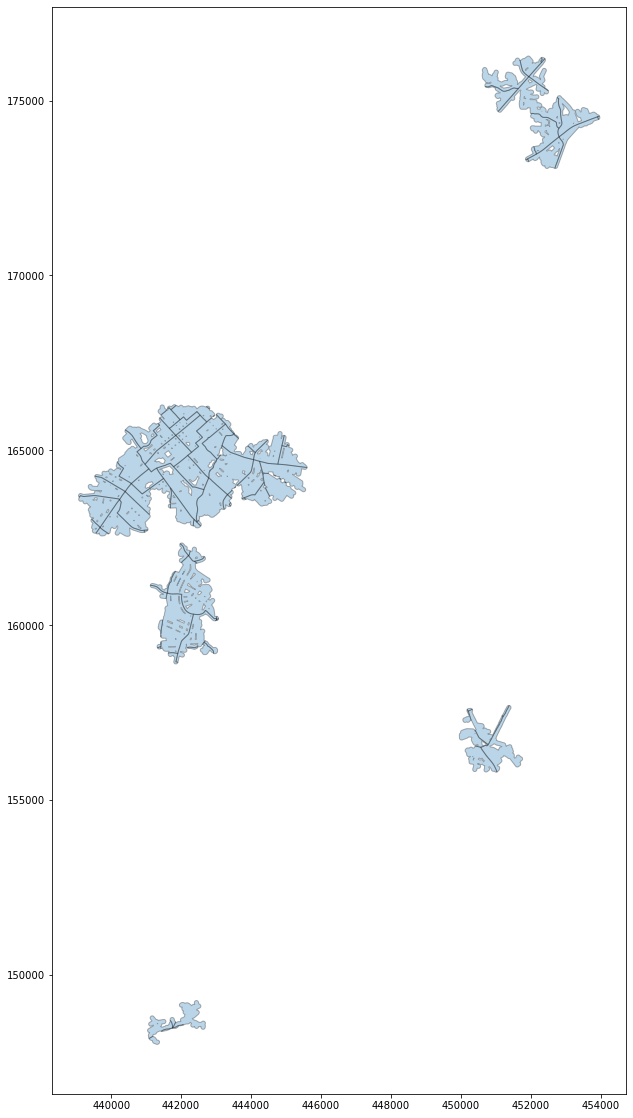

In [1220]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1221]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...     INTPTLAT      INTPTLON  \
0  393.654456  18.547945   5.958904   1236.0  ...  +35.2218499  -080.8584275   
1  149.292520  11.630137   4.780822   2049.0  ...  +35.2218499  -080.8584275   
2  393.654456  18.547945   5.958904   1236.0  ...  +35.2154182  -080.8517089   
3  149.292520  11.630137   4.780822   2049.0  ...  +35.2154182  -080.8517089   
4   33.307341   2.438356   1.136986   1443.0  ...  +35.2154182  -080.8517089   

           GISJOIN   Shape_Leng    Shape_Area  AJWNE001 AJWNE002 AJWNE003  \
0  G37011900004001  4786.586286  1.027138e+06      1762     1485      133   
1  G37011900004001  4786.586286  1.027138e+06      1762     1485      133   
2  G37011900004002  2495.016710  3.436644e+05      1372      959      280   
3  G37011900004002  2495.016710  3.436644e+05      1372      959      280   
4  G37011900004002  2495.016710  3.436644e+05      1372      959      280   

  Total block Area                                           geometry  
0     1.026879e+06  POLYGON ((440306.042 164516.137, 440306.409 16...  
1     1.026879e+06  POLYGON ((440362.525 164176.169, 440362.884 16...  
2     3.435778e+05  POLYGON ((440960.278 164367.289, 440965.069 16...  
3     3.435778e+05  POLYGON ((441102.716 163909.737, 441099.910 16...  
4     3.435778e+05  POLYGON ((441445.771 164160.354, 441443.049 16...  

[5 rows x 26 columns]

In [1222]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...          GISJOIN  \
0  393.654456  18.547945   5.958904   1236.0  ...  G37011900004001   
1  149.292520  11.630137   4.780822   2049.0  ...  G37011900004001   
2  393.654456  18.547945   5.958904   1236.0  ...  G37011900004002   
3  149.292520  11.630137   4.780822   2049.0  ...  G37011900004002   
4   33.307341   2.438356   1.136986   1443.0  ...  G37011900004002   

    Shape_Leng    Shape_Area  AJWNE001 AJWNE002  AJWNE003 Total block Area  \
0  4786.586286  1.027138e+06      1762     1485       133     1.026879e+06   
1  4786.586286  1.027138e+06      1762     1485       133     1.026879e+06   
2  2495.016710  3.436644e+05      1372      959       280     3.435778e+05   
3  2495.016710  3.436644e+05      1372      959       280     3.435778e+05   
4  2495.016710  3.436644e+05      1372      959       280     3.435778e+05   

                                            geometry  buffered area  \
0  POLYGON ((440306.042 164516.137, 440306.409 16...  250977.973414   
1  POLYGON ((440362.525 164176.169, 440362.884 16...  630334.266241   
2  POLYGON ((440960.278 164367.289, 440965.069 16...  183395.733013   
3  POLYGON ((441102.716 163909.737, 441099.910 16...  284990.528639   
4  POLYGON ((441445.771 164160.354, 441443.049 16...    2804.060891   

   area factor  
0     0.244409  
1     0.613835  
2     0.533782  
3     0.829479  
4     0.008161  

[5 rows x 28 columns]

In [1223]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AJWNE001','AJWNE002','AJWNE003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AJWNE001  AJWNE002  AJWNE003  area factor
0     55186886.0      1762      1485       133     0.244409
1     34764115.0      1762      1485       133     0.613835
2     55186886.0      1372       959       280     0.533782
3     34764115.0      1372       959       280     0.829479
4    322993730.0      1372       959       280     0.008161

In [1224]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AJWNE001    AJWNE002    AJWNE003
0     55186886.0   430.647895  362.946722   32.506339
1     34764115.0  1081.577485  911.545156   81.640071
2     55186886.0   732.349339  511.897242  149.459049
3     34764115.0  1138.045154  795.470337  232.254113
4    322993730.0    11.197382    7.826742    2.285180

# Aggregate by ID

In [1225]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      AJWNE001     AJWNE002     AJWNE003
0     16694967.0   1746.361114   780.906540   559.845657
1     16701397.0   4608.212894  3698.198502   599.477896
2     34764115.0   5541.734946  4125.524054   825.111221
3     51062797.0  13471.597342  8446.048100  3730.113569
4     51062957.0   3995.098984  2068.321204  1583.930401

# Percentange of White and African American

In [1226]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AJWNE002']/output_pct_race['AJWNE001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AJWNE003']/output_pct_race['AJWNE001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      AJWNE001     AJWNE002     AJWNE003  pct_white  \
0     16694967.0   1746.361114   780.906540   559.845657  44.716212   
1     16701397.0   4608.212894  3698.198502   599.477896  80.252336   
2     34764115.0   5541.734946  4125.524054   825.111221  74.444630   
3     51062797.0  13471.597342  8446.048100  3730.113569  62.695224   
4     51062957.0   3995.098984  2068.321204  1583.930401  51.771463   

   pct_African_American  
0             32.057840  
1             13.008902  
2             14.889042  
3             27.688725  
4             39.646837

In [1227]:
output_pct_race1=output_pct_race.drop(['AJWNE001','AJWNE002','AJWNE003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  16694967.0  44.716212             32.057840
1  16701397.0  80.252336             13.008902
2  34764115.0  74.444630             14.889042
3  51062797.0  62.695224             27.688725
4  51062957.0  51.771463             39.646837

# Percentage of Male and Female

In [1228]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALT0M040  ALT0M041  \
0      37  Alamance County        1      NaN  ...        56        18   
1      37  Alamance County        1      NaN  ...        31        32   
2      37  Alamance County        1      NaN  ...        19        44   
3      37  Alamance County        1      NaN  ...        27        41   
4      37  Alamance County        1      NaN  ...        33        70   

   ALT0M042  ALT0M043  ALT0M044  ALT0M045  ALT0M046  ALT0M047  ALT0M048  \
0        14        27        14        31        16        15        26   
1        24        26        21        33        20        26        23   
2        20        58        12         7        12        15        12   
3        15        44        12        13        13        12        20   
4        12        49        11        41        17        12        12   

   ALT0M049  
0        16  
1        16  
2        15  
3        12  
4        14  

[5 rows x 142 columns]

In [1229]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALT0M040 ALT0M041 ALT0M042  \
0  Block Group 1  G5030        S   983262.0  ...        56       18       14   
1  Block Group 2  G5030        S  1196525.0  ...        31       32       24   
2  Block Group 3  G5030        S  1352647.0  ...        19       44       20   
3  Block Group 4  G5030        S   979253.0  ...        27       41       15   
4  Block Group 1  G5030        S  1017947.0  ...        33       70       12   

   ALT0M043  ALT0M044 ALT0M045  ALT0M046 ALT0M047 ALT0M048  ALT0M049  
0        27        14       31        16       15       26        16  
1        26        21       33        20       26       23        16  
2        58        12        7        12       15       12        15  
3        44        12       13        13       12       20        12  
4        49        11       41        17       12       12        14  

[5 rows x 158 columns]

In [1230]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3337  G37011900001001      37      119  000100        1  371190001001   
3338  G37011900001002      37      119  000100        2  371190001002   
3339  G37011900001003      37      119  000100        3  371190001003   
3340  G37011900001004      37      119  000100        4  371190001004   
3341  G37011900001005      37      119  000100        5  371190001005   

           NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALT0M040 ALT0M041  \
3337  Block Group 1  G5030        S  495869.0  ...        29       53   
3338  Block Group 2  G5030        S  179471.0  ...        32       39   
3339  Block Group 3  G5030        S  193767.0  ...        90       45   
3340  Block Group 4  G5030        S  418131.0  ...        12       12   
3341  Block Group 5  G5030        S  652831.0  ...        46       58   

     ALT0M042  ALT0M043  ALT0M044 ALT0M045  ALT0M046 ALT0M047 ALT0M048  \
3337       60        39        12       12        15       12       12   
3338       12        12        12       33        33       12       12   
3339       91        12        10       39        21       12       12   
3340       12        12        12       12        12       12       12   
3341       12        12        12       12        20       12       12   

      ALT0M049  
3337        21  
3338        12  
3339        12  
3340        12  
3341        12  

[5 rows x 158 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


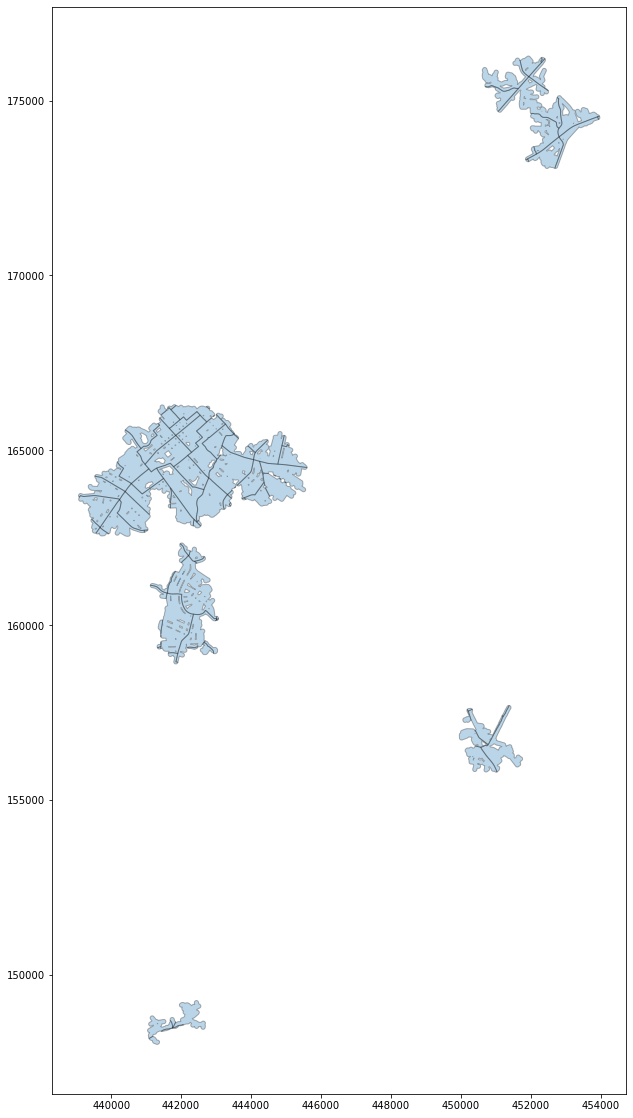

In [1231]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1232]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALT0M041  ALT0M042  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        68        25   
3  149.292520  11.630137   4.780822   2049.0  ...        68        25   
4   33.307341   2.438356   1.136986   1443.0  ...        68        25   

  ALT0M043  ALT0M044 ALT0M045  ALT0M046 ALT0M047 ALT0M048 ALT0M049  \
0       12        12       12        12       12       12       12   
1       12        12       12        12       12       12       12   
2       12        23       23        12       12       12       12   
3       12        23       23        12       12       12       12   
4       12        23       23        12       12       12       12   

                                            geometry  
0  POLYGON ((440306.042 164516.137, 440306.409 16...  
1  POLYGON ((440362.525 164176.169, 440362.884 16...  
2  POLYGON ((440960.278 164367.289, 440965.069 16...  
3  POLYGON ((441102.716 163909.737, 441099.910 16...  
4  POLYGON ((441445.771 164160.354, 441443.049 16...  

[5 rows x 174 columns]

In [1233]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALT0M043  ALT0M044  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        23   
3  149.292520  11.630137   4.780822   2049.0  ...        12        23   
4   33.307341   2.438356   1.136986   1443.0  ...        12        23   

  ALT0M045  ALT0M046 ALT0M047  ALT0M048 ALT0M049  \
0       12        12       12        12       12   
1       12        12       12        12       12   
2       23        12       12        12       12   
3       23        12       12        12       12   
4       23        12       12        12       12   

                                            geometry  buffered area  \
0  POLYGON ((440306.042 164516.137, 440306.409 16...  250977.973414   
1  POLYGON ((440362.525 164176.169, 440362.884 16...  630334.266241   
2  POLYGON ((440960.278 164367.289, 440965.069 16...  183395.733013   
3  POLYGON ((441102.716 163909.737, 441099.910 16...  284990.528639   
4  POLYGON ((441445.771 164160.354, 441443.049 16...    2804.060891   

  area factor  
0    0.244409  
1    0.613835  
2    0.533782  
3    0.829479  
4    0.008161  

[5 rows x 176 columns]

In [1234]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'ALT0E001', 'ALT0E002', 'ALT0E026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALT0E001  ALT0E002  ALT0E026  area factor
0     55186886.0      1868       965       903     0.244409
1     34764115.0      1868       965       903     0.613835
2     55186886.0      1622       957       665     0.533782
3     34764115.0      1622       957       665     0.829479
4    322993730.0      1622       957       665     0.008161

In [1235]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALT0E001    ALT0E002    ALT0E026
0     55186886.0   456.555204  235.854267  220.700936
1     34764115.0  1146.644008  592.350893  554.293115
2     55186886.0   865.794918  510.829677  354.965241
3     34764115.0  1345.414898  793.811379  551.603518
4    322993730.0    13.237722    7.810419    5.427303

In [1236]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALT0E001     ALT0E002     ALT0E026
0     16694967.0   1789.970705   837.464702   952.506003
1     16701397.0   5052.634992  2352.870802  2699.764190
2     34764115.0   6258.039337  3436.624635  2821.414702
3     51062797.0  14401.217417  7898.352649  6502.864768
4     51062957.0   4178.273655  2128.123254  2050.150401

In [1237]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['ALT0E002']/output_pct_gender['ALT0E001'])*100
output_pct_gender['pct_female']=(output_pct_gender['ALT0E026']/output_pct_gender['ALT0E001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALT0E001     ALT0E002     ALT0E026   pct_male  \
0     16694967.0   1789.970705   837.464702   952.506003  46.786503   
1     16701397.0   5052.634992  2352.870802  2699.764190  46.567203   
2     34764115.0   6258.039337  3436.624635  2821.414702  54.915357   
3     51062797.0  14401.217417  7898.352649  6502.864768  54.845034   
4     51062957.0   4178.273655  2128.123254  2050.150401  50.933075   

   pct_female  
0   53.213497  
1   53.432797  
2   45.084643  
3   45.154966  
4   49.066925

In [1238]:
output_pct_gender1=output_pct_gender.drop(['ALT0E001', 'ALT0E002', 'ALT0E026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  16694967.0  46.786503   53.213497
1  16701397.0  46.567203   53.432797
2  34764115.0  54.915357   45.084643
3  51062797.0  54.845034   45.154966
4  51062957.0  50.933075   49.066925

# Number of Student (student access) and Education (pct of at least college education population)

In [1239]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALWGM016  ALWGM017  \
0      37  Alamance County        1      NaN  ...        12        77   
1      37  Alamance County        1      NaN  ...        12        68   
2      37  Alamance County        1      NaN  ...        38       104   
3      37  Alamance County        1      NaN  ...        12        57   
4      37  Alamance County        1      NaN  ...        29        93   

   ALWGM018  ALWGM019  ALWGM020  ALWGM021  ALWGM022  ALWGM023  ALWGM024  \
0        29        43        64        74       117        45        21   
1        20        38        91        33       106        47        41   
2        62        13        52        62        12        14        12   
3        18        34        76        44        34        12        12   
4        99        27        80        71        53        12        12   

   ALWGM025  
0       119  
1        29  
2        15  
3        12  
4        12  

[5 rows x 94 columns]

In [1240]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALWGM016 ALWGM017 ALWGM018  \
0  Block Group 1  G5030        S   983262.0  ...        12       77       29   
1  Block Group 2  G5030        S  1196525.0  ...        12       68       20   
2  Block Group 3  G5030        S  1352647.0  ...        38      104       62   
3  Block Group 4  G5030        S   979253.0  ...        12       57       18   
4  Block Group 1  G5030        S  1017947.0  ...        29       93       99   

   ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  ALWGM025  
0        43        64       74       117       45       21       119  
1        38        91       33       106       47       41        29  
2        13        52       62        12       14       12        15  
3        34        76       44        34       12       12        12  
4        27        80       71        53       12       12        12  

[5 rows x 110 columns]

In [1241]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3337  G37011900001001      37      119  000100        1  371190001001   
3338  G37011900001002      37      119  000100        2  371190001002   
3339  G37011900001003      37      119  000100        3  371190001003   
3340  G37011900001004      37      119  000100        4  371190001004   
3341  G37011900001005      37      119  000100        5  371190001005   

           NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALWGM016 ALWGM017  \
3337  Block Group 1  G5030        S  495869.0  ...        12      113   
3338  Block Group 2  G5030        S  179471.0  ...        12       31   
3339  Block Group 3  G5030        S  193767.0  ...        12       15   
3340  Block Group 4  G5030        S  418131.0  ...        12       69   
3341  Block Group 5  G5030        S  652831.0  ...        12       20   

     ALWGM018  ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024  \
3337       25        44        79       51       200      121       41   
3338        8        36        64       81       197      123       34   
3339       12        32       119      183       154       77       62   
3340       12        12        12       12        42       12       12   
3341       12        54        37       12       200       44       12   

      ALWGM025  
3337        40  
3338        84  
3339        45  
3340        12  
3341        12  

[5 rows x 110 columns]

In [1242]:
#ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1243]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALWGM017  ALWGM018  \
0  393.654456  18.547945   5.958904   1236.0  ...        35        12   
1  149.292520  11.630137   4.780822   2049.0  ...        35        12   
2  393.654456  18.547945   5.958904   1236.0  ...        52        16   
3  149.292520  11.630137   4.780822   2049.0  ...        52        16   
4   33.307341   2.438356   1.136986   1443.0  ...        52        16   

  ALWGM019  ALWGM020 ALWGM021  ALWGM022 ALWGM023 ALWGM024 ALWGM025  \
0       17        47       32       150      111       60       31   
1       17        47       32       150      111       60       31   
2       52        71       44       155      110       38       26   
3       52        71       44       155      110       38       26   
4       52        71       44       155      110       38       26   

                                            geometry  
0  POLYGON ((440306.042 164516.137, 440306.409 16...  
1  POLYGON ((440362.525 164176.169, 440362.884 16...  
2  POLYGON ((440960.278 164367.289, 440965.069 16...  
3  POLYGON ((441102.716 163909.737, 441099.910 16...  
4  POLYGON ((441445.771 164160.354, 441443.049 16...  

[5 rows x 126 columns]

In [1244]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALWGM019  ALWGM020  \
0  393.654456  18.547945   5.958904   1236.0  ...        17        47   
1  149.292520  11.630137   4.780822   2049.0  ...        17        47   
2  393.654456  18.547945   5.958904   1236.0  ...        52        71   
3  149.292520  11.630137   4.780822   2049.0  ...        52        71   
4   33.307341   2.438356   1.136986   1443.0  ...        52        71   

  ALWGM021  ALWGM022 ALWGM023  ALWGM024 ALWGM025  \
0       32       150      111        60       31   
1       32       150      111        60       31   
2       44       155      110        38       26   
3       44       155      110        38       26   
4       44       155      110        38       26   

                                            geometry  buffered area  \
0  POLYGON ((440306.042 164516.137, 440306.409 16...  250977.973414   
1  POLYGON ((440362.525 164176.169, 440362.884 16...  630334.266241   
2  POLYGON ((440960.278 164367.289, 440965.069 16...  183395.733013   
3  POLYGON ((441102.716 163909.737, 441099.910 16...  284990.528639   
4  POLYGON ((441445.771 164160.354, 441443.049 16...    2804.060891   

  area factor  
0    0.244409  
1    0.613835  
2    0.533782  
3    0.829479  
4    0.008161  

[5 rows x 128 columns]

In [1245]:
# AH04E001,=total, AH04E019:    Some college, less than 1 year
#AH04E020:    Some college, 1 or more years, no degree
#        AH04E021:    Associate's degree
#        AH04E022:    Bachelor's degree
#        AH04E023:    Master's degree
#        AH04E024:    Professional school degree
#        AH04E025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'ALWGE001', 'ALWGE019','ALWGE020','ALWGE021', 'ALWGE022','ALWGE023','ALWGE024','ALWGE025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALWGE001  ALWGE019  ALWGE020  ALWGE021  ALWGE022  ALWGE023  \
0     55186886.0      1186        11        80        42       645       278   
1     34764115.0      1186        11        80        42       645       278   
2     55186886.0      1219        38        91        58       504       320   
3     34764115.0      1219        38        91        58       504       320   
4    322993730.0      1219        38        91        58       504       320   

   ALWGE024  ALWGE025  area factor  
0        83        26     0.244409  
1        83        26     0.613835  
2        48        24     0.533782  
3        48        24     0.829479  
4        48        24     0.008161

In [1246]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALWGE001   ALWGE019   ALWGE020   ALWGE021    ALWGE022  \
0     55186886.0   289.868561   2.688494  19.552685  10.265160  157.643526   
1     34764115.0   728.008455   6.752186  49.106810  25.781075  395.923654   
2     55186886.0   650.680644  20.283728  48.574191  30.959374  269.026288   
3     34764115.0  1011.134871  31.520201  75.482587  48.109781  418.057403   
4    322993730.0     9.948695   0.310132   0.742684   0.473359    4.113324   

     ALWGE023   ALWGE024   ALWGE025  
0   67.945582  20.285911   6.354623  
1  170.646164  50.948315  15.959713  
2  170.810341  25.621551  12.810776  
3  265.433272  39.814991  19.907495  
4    2.611634   0.391745   0.195873

In [1247]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALWGE001    ALWGE019     ALWGE020    ALWGE021  \
0     16694967.0   1220.737574   54.577234   227.387606   93.472336   
1     16701397.0   3820.310864  113.629560   428.497001  154.391510   
2     34764115.0   4573.571504  179.988737   275.554575  190.158269   
3     51062797.0  10602.785456  298.633448  1080.863837  801.149471   
4     51062957.0   2811.731337   89.876178   385.522429  123.621545   

      ALWGE022     ALWGE023    ALWGE024    ALWGE025  
0   329.793226   100.218865    6.793862    4.184810  
1  1711.315377   688.942260  268.552390  108.634860  
2  2267.290029  1024.552911  194.293214   80.276163  
3  4602.401466  1827.242667  463.185537  264.660642  
4  1103.030456   406.762583  142.431523   49.655053

# Number of students 

In [1248]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  \
0      37  Alamance County        1      NaN  ...        17        12   
1      37  Alamance County        1      NaN  ...        12        12   
2      37  Alamance County        1      NaN  ...        56        12   
3      37  Alamance County        1      NaN  ...        12        12   
4      37  Alamance County        1      NaN  ...         2        32   

   ALV5M012  ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  \
0        15        37        15        50        12        38        12   
1        21        12        16        14        12        41        50   
2        40        14        12        12         6        32        12   
3        12        12        22        24        12        28        12   
4        12        27        35        12        12        17        12   

   ALV5M019  
0       182  
1       154  
2       156  
3       155  
4       309  

[5 rows x 82 columns]

In [1249]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALV5M010 ALV5M011 ALV5M012  \
0  Block Group 1  G5030        S   983262.0  ...        17       12       15   
1  Block Group 2  G5030        S  1196525.0  ...        12       12       21   
2  Block Group 3  G5030        S  1352647.0  ...        56       12       40   
3  Block Group 4  G5030        S   979253.0  ...        12       12       12   
4  Block Group 1  G5030        S  1017947.0  ...         2       32       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        37        15       50        12       38       12       182  
1        12        16       14        12       41       50       154  
2        14        12       12         6       32       12       156  
3        12        22       24        12       28       12       155  
4        27        35       12        12       17       12       309  

[5 rows x 98 columns]

In [1250]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3337  G37011900001001      37      119  000100        1  371190001001   
3338  G37011900001002      37      119  000100        2  371190001002   
3339  G37011900001003      37      119  000100        3  371190001003   
3340  G37011900001004      37      119  000100        4  371190001004   
3341  G37011900001005      37      119  000100        5  371190001005   

           NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  ALV5M010 ALV5M011  \
3337  Block Group 1  G5030        S  495869.0  ...        12       12   
3338  Block Group 2  G5030        S  179471.0  ...        12       12   
3339  Block Group 3  G5030        S  193767.0  ...        12       12   
3340  Block Group 4  G5030        S  418131.0  ...        12       12   
3341  Block Group 5  G5030        S  652831.0  ...        12       12   

     ALV5M012  ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  \
3337       12        12        12       12        30       73       29   
3338       12        23        12       12        12      167       23   
3339       12        12        12       12        12       82       53   
3340       12        12        12       12        12       26       12   
3341       12        12        12       12        12       12       12   

      ALV5M019  
3337       270  
3338       231  
3339       292  
3340        76  
3341       357  

[5 rows x 98 columns]

In [1251]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M011  ALV5M012  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0       12        12       12        12       72       46      223   
1       12        12       12        12       72       46      223   
2       12        12       16        12       74       32      219   
3       12        12       16        12       74       32      219   
4       12        12       16        12       74       32      219   

                                            geometry  
0  POLYGON ((440306.042 164516.137, 440306.409 16...  
1  POLYGON ((440362.525 164176.169, 440362.884 16...  
2  POLYGON ((440960.278 164367.289, 440965.069 16...  
3  POLYGON ((441102.716 163909.737, 441099.910 16...  
4  POLYGON ((441445.771 164160.354, 441443.049 16...  

[5 rows x 114 columns]

In [1252]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M013  ALV5M014  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALV5M015  ALV5M016 ALV5M017  ALV5M018 ALV5M019  \
0       12        12       72        46      223   
1       12        12       72        46      223   
2       16        12       74        32      219   
3       16        12       74        32      219   
4       16        12       74        32      219   

                                            geometry  buffered area  \
0  POLYGON ((440306.042 164516.137, 440306.409 16...  250977.973414   
1  POLYGON ((440362.525 164176.169, 440362.884 16...  630334.266241   
2  POLYGON ((440960.278 164367.289, 440965.069 16...  183395.733013   
3  POLYGON ((441102.716 163909.737, 441099.910 16...  284990.528639   
4  POLYGON ((441445.771 164160.354, 441443.049 16...    2804.060891   

  area factor  
0    0.244409  
1    0.613835  
2    0.533782  
3    0.829479  
4    0.008161  

[5 rows x 116 columns]

In [1253]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0     55186886.0      1856       104        78     0.244409
1     34764115.0      1856       104        78     0.613835
2     55186886.0      1592       111        38     0.533782
3     34764115.0      1592       111        38     0.829479
4    322993730.0      1592       111        38     0.008161

In [1254]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALV5E001   ALV5E017   ALV5E018
0     55186886.0   453.622301  25.418491  19.063868
1     34764115.0  1139.277986  63.838853  47.879140
2     55186886.0   849.781448  59.249837  20.283728
3     34764115.0  1320.530528  92.072166  31.520201
4    322993730.0    12.992881   0.905911   0.310132

In [1255]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     55186886.0      44.482359
1     34764115.0     111.717992
2     55186886.0      79.533565
3     34764115.0     123.592367
4    322993730.0       1.216042

In [1256]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     16694967.0     127.554229
1     16701397.0     380.954811
2     34764115.0     608.165520
3     51062797.0    1731.258058
4     51062957.0     341.718973

In [1257]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  16694967.0      127.554229
1  16701397.0      380.954811
2  34764115.0      608.165520
3  51062797.0     1731.258058
4  51062957.0      341.718973

# Education ( pct of at least college population)

In [1258]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALWGE001    ALWGE019     ALWGE020    ALWGE021  \
0     16694967.0   1220.737574   54.577234   227.387606   93.472336   
1     16701397.0   3820.310864  113.629560   428.497001  154.391510   
2     34764115.0   4573.571504  179.988737   275.554575  190.158269   
3     51062797.0  10602.785456  298.633448  1080.863837  801.149471   
4     51062957.0   2811.731337   89.876178   385.522429  123.621545   

      ALWGE022     ALWGE023    ALWGE024    ALWGE025  \
0   329.793226   100.218865    6.793862    4.184810   
1  1711.315377   688.942260  268.552390  108.634860   
2  2267.290029  1024.552911  194.293214   80.276163   
3  4602.401466  1827.242667  463.185537  264.660642   
4  1103.030456   406.762583  142.431523   49.655053   

   total_at_least_college_education  
0                        816.427940  
1                       3473.962960  
2                       4212.113899  
3                       9338.137069  
4                       2300.899766

In [1259]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['ALWGE001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALWGE001    ALWGE019     ALWGE020    ALWGE021  \
0     16694967.0   1220.737574   54.577234   227.387606   93.472336   
1     16701397.0   3820.310864  113.629560   428.497001  154.391510   
2     34764115.0   4573.571504  179.988737   275.554575  190.158269   
3     51062797.0  10602.785456  298.633448  1080.863837  801.149471   
4     51062957.0   2811.731337   89.876178   385.522429  123.621545   

      ALWGE022     ALWGE023    ALWGE024    ALWGE025  \
0   329.793226   100.218865    6.793862    4.184810   
1  1711.315377   688.942260  268.552390  108.634860   
2  2267.290029  1024.552911  194.293214   80.276163   
3  4602.401466  1827.242667  463.185537  264.660642   
4  1103.030456   406.762583  142.431523   49.655053   

   total_at_least_college_education  pct_at_least_college_education  
0                        816.427940                       66.879889  
1                       3473.962960                       90.934039  
2                       4212.113899                       92.096820  
3                       9338.137069                       88.072489  
4                       2300.899766                       81.832134

In [1260]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  16694967.0                       66.879889
1  16701397.0                       90.934039
2  34764115.0                       92.096820
3  51062797.0                       88.072489
4  51062957.0                       81.832134

# Median Age

In [700]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  BTTRA  BTBGA  \
0      37  Alamance County        1      NaN  ...    NaN    NaN   
1      37  Alamance County        1      NaN  ...    NaN    NaN   
2      37  Alamance County        1      NaN  ...    NaN    NaN   
3      37  Alamance County        1      NaN  ...    NaN    NaN   
4      37  Alamance County        1      NaN  ...    NaN    NaN   

                                              NAME_E  ALT1E001  ALT1E002  \
0  Block Group 1, Census Tract 201, Alamance Coun...      44.7      48.1   
1  Block Group 2, Census Tract 201, Alamance Coun...      44.6      39.6   
2  Block Group 3, Census Tract 201, Alamance Coun...      25.5      21.5   
3  Block Group 4, Census Tract 201, Alamance Coun...      31.3      29.1   
4  Block Group 1, Census Tract 202, Alamance Coun...      37.1      38.4   

   ALT1E003                                             NAME_M  ALT1M001  \
0      39.9  Block Group 1, Census Tract 201, Alamance Coun...       6.6   
1      49.9  Block Group 2, Census Tract 201, Alamance Coun...      11.7   
2      26.6  Block Group 3, Census Tract 201, Alamance Coun...       4.8   
3      53.0  Block Group 4, Census Tract 201, Alamance Coun...      10.3   
4      36.4  Block Group 1, Census Tract 202, Alamance Coun...      15.8   

   ALT1M002  ALT1M003  
0       5.7       9.7  
1       8.8       8.4  
2      13.4       4.0  
3       3.3      27.7  
4      12.3      23.2  

[5 rows x 50 columns]

In [701]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  BTTRA BTBGA  \
0  Block Group 1  G5030        S   983262.0  ...    NaN   NaN   
1  Block Group 2  G5030        S  1196525.0  ...    NaN   NaN   
2  Block Group 3  G5030        S  1352647.0  ...    NaN   NaN   
3  Block Group 4  G5030        S   979253.0  ...    NaN   NaN   
4  Block Group 1  G5030        S  1017947.0  ...    NaN   NaN   

                                              NAME_E  ALT1E001  ALT1E002  \
0  Block Group 1, Census Tract 201, Alamance Coun...      44.7      48.1   
1  Block Group 2, Census Tract 201, Alamance Coun...      44.6      39.6   
2  Block Group 3, Census Tract 201, Alamance Coun...      25.5      21.5   
3  Block Group 4, Census Tract 201, Alamance Coun...      31.3      29.1   
4  Block Group 1, Census Tract 202, Alamance Coun...      37.1      38.4   

  ALT1E003                                             NAME_M ALT1M001  \
0     39.9  Block Group 1, Census Tract 201, Alamance Coun...      6.6   
1     49.9  Block Group 2, Census Tract 201, Alamance Coun...     11.7   
2     26.6  Block Group 3, Census Tract 201, Alamance Coun...      4.8   
3     53.0  Block Group 4, Census Tract 201, Alamance Coun...     10.3   
4     36.4  Block Group 1, Census Tract 202, Alamance Coun...     15.8   

  ALT1M002  ALT1M003  
0      5.7       9.7  
1      8.8       8.4  
2     13.4       4.0  
3      3.3      27.7  
4     12.3      23.2  

[5 rows x 66 columns]

In [702]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3660  G37011900055232      37      119  005523        2  371190055232   
3676  G37011900056102      37      119  005610        2  371190056102   
3674  G37011900056091      37      119  005609        1  371190056091   
3675  G37011900056101      37      119  005610        1  371190056101   
3661  G37011900055233      37      119  005523        3  371190055233   

           NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  BTTRA BTBGA  \
3660  Block Group 2  G5030        S  1500765.0  ...    NaN   NaN   
3676  Block Group 2  G5030        S  1145969.0  ...    NaN   NaN   
3674  Block Group 1  G5030        S  3230150.0  ...    NaN   NaN   
3675  Block Group 1  G5030        S  1218937.0  ...    NaN   NaN   
3661  Block Group 3  G5030        S  1457699.0  ...    NaN   NaN   

                                                 NAME_E  ALT1E001  ALT1E002  \
3660  Block Group 2, Census Tract 55.23, Mecklenburg...      30.2      25.3   
3676  Block Group 2, Census Tract 56.10, Mecklenburg...      32.3      28.1   
3674  Block Group 1, Census Tract 56.09, Mecklenburg...      22.9      23.3   
3675  Block Group 1, Census Tract 56.10, Mecklenburg...      25.5      25.8   
3661  Block Group 3, Census Tract 55.23, Mecklenburg...      28.9      30.7   

     ALT1E003                                             NAME_M ALT1M001  \
3660     30.7  Block Group 2, Census Tract 55.23, Mecklenburg...      1.3   
3676     34.7  Block Group 2, Census Tract 56.10, Mecklenburg...      4.4   
3674     22.6  Block Group 1, Census Tract 56.09, Mecklenburg...      0.7   
3675     24.0  Block Group 1, Census Tract 56.10, Mecklenburg...      5.8   
3661     26.2  Block Group 3, Census Tract 55.23, Mecklenburg...      1.9   

     ALT1M002  ALT1M003  
3660      3.1       1.4  
3676      6.2       5.3  
3674      1.0       0.7  
3675      7.1      12.8  
3661      3.1       4.2  

[5 rows x 66 columns]

In [703]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   BTBGA                                             NAME_E ALT1E001  \
0    NaN  Block Group 2, Census Tract 35, Mecklenburg Co...     42.5   
1    NaN  Block Group 2, Census Tract 35, Mecklenburg Co...     42.5   
2    NaN  Block Group 2, Census Tract 35, Mecklenburg Co...     42.5   
3    NaN  Block Group 2, Census Tract 35, Mecklenburg Co...     42.5   
4    NaN  Block Group 2, Census Tract 35, Mecklenburg Co...     42.5   

   ALT1E002 ALT1E003                                             NAME_M  \
0      46.0     40.8  Block Group 2, Census Tract 35, Mecklenburg Co...   
1      46.0     40.8  Block Group 2, Census Tract 35, Mecklenburg Co...   
2      46.0     40.8  Block Group 2, Census Tract 35, Mecklenburg Co...   
3      46.0     40.8  Block Group 2, Census Tract 35, Mecklenburg Co...   
4      46.0     40.8  Block Group 2, Census Tract 35, Mecklenburg Co...   

  ALT1M001 ALT1M002 ALT1M003  \
0      5.1      9.5      6.9   
1      5.1      9.5      6.9   
2      5.1      9.5      6.9   
3      5.1      9.5      6.9   
4      5.1      9.5      6.9   

                                            geometry  
0  POLYGON ((441699.773 163884.928, 441704.478 16...  
1  POLYGON ((441699.773 163884.928, 441704.478 16...  
2  POLYGON ((441699.773 163884.928, 441704.478 16...  
3  POLYGON ((440530.316 163697.045, 440534.940 16...  
4  POLYGON ((441699.773 163884.928, 441704.478 16...  

[5 rows x 82 columns]

In [704]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   ALT1E001  ALT1E002 ALT1E003  \
0      42.5      46.0     40.8   
1      42.5      46.0     40.8   
2      42.5      46.0     40.8   
3      42.5      46.0     40.8   
4      42.5      46.0     40.8   

                                              NAME_M ALT1M001  ALT1M002  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...      5.1       9.5   
1  Block Group 2, Census Tract 35, Mecklenburg Co...      5.1       9.5   
2  Block Group 2, Census Tract 35, Mecklenburg Co...      5.1       9.5   
3  Block Group 2, Census Tract 35, Mecklenburg Co...      5.1       9.5   
4  Block Group 2, Census Tract 35, Mecklenburg Co...      5.1       9.5   

  ALT1M003                                           geometry  buffered area  \
0      6.9  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
1      6.9  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
2      6.9  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
3      6.9  POLYGON ((440530.316 163697.045, 440534.940 16...  603895.083625   
4      6.9  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   

  area factor  
0    0.988580  
1    0.988580  
2    0.988580  
3    0.713602  
4    0.988580  

[5 rows x 84 columns]

In [705]:
#    Table 1:     Median Age by Sex
#    Universe:    Total population
#    Source code: B01002
#    NHGIS code:  ALT1
#        ALT1E001:    Median age: Total
#        ALT1E002:    Median age: Male
#        ALT1E003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID_x','ALT1E001']]
age_filter.columns=['osm_id_sensor','GEOID','ALT1E001']
age_filter.head()

osm_id_sensor         GEOID  ALT1E001
0     55186886.0  371190035002      42.5
1     34764115.0  371190035002      42.5
2    322993730.0  371190035002      42.5
3    235076258.0  371190035002      42.5
4    422138643.0  371190035002      42.5

In [706]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

In [707]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [708]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [709]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  UR  PCI  PUMA5A  \
0      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
1      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
2      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
3      37  Alamance County        1      NaN  ... NaN  NaN     NaN   
4      37  Alamance County        1      NaN  ... NaN  NaN     NaN   

                 GEOID  BTTRA  BTBGA  \
0  15000US370010201001    NaN    NaN   
1  15000US370010201002    NaN    NaN   
2  15000US370010201003    NaN    NaN   
3  15000US370010201004    NaN    NaN   
4  15000US370010202001    NaN    NaN   

                                              NAME_E  ALW1E001  \
0  Block Group 1, Census Tract 201, Alamance Coun...   37734.0   
1  Block Group 2, Census Tract 201, Alamance Coun...   61418.0   
2  Block Group 3, Census Tract 201, Alamance Coun...   13969.0   
3  Block Group 4, Census Tract 201, Alamance Coun...   33235.0   
4  Block Group 1, Census Tract 202, Alamance Coun...   36328.0   

                                              NAME_M  ALW1M001  
0  Block Group 1, Census Tract 201, Alamance Coun...   31008.0  
1  Block Group 2, Census Tract 201, Alamance Coun...    9485.0  
2  Block Group 3, Census Tract 201, Alamance Coun...    6327.0  
3  Block Group 4, Census Tract 201, Alamance Coun...   29891.0  
4  Block Group 1, Census Tract 202, Alamance Coun...   10942.0  

[5 rows x 46 columns]

In [710]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  UR PCI PUMA5A  \
0  Block Group 1  G5030        S   983262.0  ... NaN NaN    NaN   
1  Block Group 2  G5030        S  1196525.0  ... NaN NaN    NaN   
2  Block Group 3  G5030        S  1352647.0  ... NaN NaN    NaN   
3  Block Group 4  G5030        S   979253.0  ... NaN NaN    NaN   
4  Block Group 1  G5030        S  1017947.0  ... NaN NaN    NaN   

               GEOID_y  BTTRA BTBGA  \
0  15000US370010201001    NaN   NaN   
1  15000US370010201002    NaN   NaN   
2  15000US370010201003    NaN   NaN   
3  15000US370010201004    NaN   NaN   
4  15000US370010202001    NaN   NaN   

                                              NAME_E ALW1E001  \
0  Block Group 1, Census Tract 201, Alamance Coun...  37734.0   
1  Block Group 2, Census Tract 201, Alamance Coun...  61418.0   
2  Block Group 3, Census Tract 201, Alamance Coun...  13969.0   
3  Block Group 4, Census Tract 201, Alamance Coun...  33235.0   
4  Block Group 1, Census Tract 202, Alamance Coun...  36328.0   

                                              NAME_M  ALW1M001  
0  Block Group 1, Census Tract 201, Alamance Coun...   31008.0  
1  Block Group 2, Census Tract 201, Alamance Coun...    9485.0  
2  Block Group 3, Census Tract 201, Alamance Coun...    6327.0  
3  Block Group 4, Census Tract 201, Alamance Coun...   29891.0  
4  Block Group 1, Census Tract 202, Alamance Coun...   10942.0  

[5 rows x 62 columns]

In [711]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3660  G37011900055232      37      119  005523        2  371190055232   
3676  G37011900056102      37      119  005610        2  371190056102   
3674  G37011900056091      37      119  005609        1  371190056091   
3675  G37011900056101      37      119  005610        1  371190056101   
3661  G37011900055233      37      119  005523        3  371190055233   

           NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  UR PCI PUMA5A  \
3660  Block Group 2  G5030        S  1500765.0  ... NaN NaN    NaN   
3676  Block Group 2  G5030        S  1145969.0  ... NaN NaN    NaN   
3674  Block Group 1  G5030        S  3230150.0  ... NaN NaN    NaN   
3675  Block Group 1  G5030        S  1218937.0  ... NaN NaN    NaN   
3661  Block Group 3  G5030        S  1457699.0  ... NaN NaN    NaN   

                  GEOID_y  BTTRA BTBGA  \
3660  15000US371190055232    NaN   NaN   
3676  15000US371190056102    NaN   NaN   
3674  15000US371190056091    NaN   NaN   
3675  15000US371190056101    NaN   NaN   
3661  15000US371190055233    NaN   NaN   

                                                 NAME_E ALW1E001  \
3660  Block Group 2, Census Tract 55.23, Mecklenburg...  41186.0   
3676  Block Group 2, Census Tract 56.10, Mecklenburg...  35000.0   
3674  Block Group 1, Census Tract 56.09, Mecklenburg...  19324.0   
3675  Block Group 1, Census Tract 56.10, Mecklenburg...  56650.0   
3661  Block Group 3, Census Tract 55.23, Mecklenburg...  59624.0   

                                                 NAME_M  ALW1M001  
3660  Block Group 2, Census Tract 55.23, Mecklenburg...   10360.0  
3676  Block Group 2, Census Tract 56.10, Mecklenburg...    6291.0  
3674  Block Group 1, Census Tract 56.09, Mecklenburg...    5002.0  
3675  Block Group 1, Census Tract 56.10, Mecklenburg...   23891.0  
3661  Block Group 3, Census Tract 55.23, Mecklenburg...    9041.0  

[5 rows x 62 columns]

In [712]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   PCI  PUMA5A              GEOID_y  BTTRA BTBGA  \
0  NaN     NaN  15000US371190035002    NaN   NaN   
1  NaN     NaN  15000US371190035002    NaN   NaN   
2  NaN     NaN  15000US371190035002    NaN   NaN   
3  NaN     NaN  15000US371190035002    NaN   NaN   
4  NaN     NaN  15000US371190035002    NaN   NaN   

                                              NAME_E  ALW1E001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
1  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
2  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
3  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
4  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   

                                              NAME_M ALW1M001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
1  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
2  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
3  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
4  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   

                                            geometry  
0  POLYGON ((441699.773 163884.928, 441704.478 16...  
1  POLYGON ((441699.773 163884.928, 441704.478 16...  
2  POLYGON ((441699.773 163884.928, 441704.478 16...  
3  POLYGON ((440530.316 163697.045, 440534.940 16...  
4  POLYGON ((441699.773 163884.928, 441704.478 16...  

[5 rows x 78 columns]

In [713]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

               GEOID_y  BTTRA BTBGA  \
0  15000US371190035002    NaN   NaN   
1  15000US371190035002    NaN   NaN   
2  15000US371190035002    NaN   NaN   
3  15000US371190035002    NaN   NaN   
4  15000US371190035002    NaN   NaN   

                                              NAME_E  ALW1E001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
1  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
2  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
3  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   
4  Block Group 2, Census Tract 35, Mecklenburg Co...  161944.0   

                                              NAME_M ALW1M001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
1  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
2  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
3  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   
4  Block Group 2, Census Tract 35, Mecklenburg Co...  49387.0   

                                            geometry  buffered area  \
0  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
1  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
2  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
3  POLYGON ((440530.316 163697.045, 440534.940 16...  603895.083625   
4  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   

  area factor  
0    0.988580  
1    0.988580  
2    0.988580  
3    0.713602  
4    0.988580  

[5 rows x 80 columns]

In [714]:
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID_x', 'ALW1M001','area factor']]
income_filter.columns=['osm_id_sensor','GEOID', 'ALW1M001','area factor']
income_filter.head(5)

osm_id_sensor         GEOID  ALW1M001  area factor
0     55186886.0  371190035002   49387.0     0.988580
1     34764115.0  371190035002   49387.0     0.988580
2    322993730.0  371190035002   49387.0     0.988580
3    235076258.0  371190035002   49387.0     0.713602
4    422138643.0  371190035002   49387.0     0.988580

In [715]:
#income_filter.iloc[:, 2:3] = income_filter.iloc[:, 2:3].mul(income_filter['area factor'],axis=0)
#income_filter.head(5)

# HH_density

In [716]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  \
0      37  Alamance County        1      NaN  ...   
1      37  Alamance County        1      NaN  ...   
2      37  Alamance County        1      NaN  ...   
3      37  Alamance County        1      NaN  ...   
4      37  Alamance County        1      NaN  ...   

                                              NAME_M  ALU9M001  ALU9M002  \
0  Block Group 1, Census Tract 201, Alamance Coun...        99        80   
1  Block Group 2, Census Tract 201, Alamance Coun...       109       104   
2  Block Group 3, Census Tract 201, Alamance Coun...       101        89   
3  Block Group 4, Census Tract 201, Alamance Coun...        82        36   
4  Block Group 1, Census Tract 202, Alamance Coun...       115       100   

   ALU9M003  ALU9M004  ALU9M005  ALU9M006  ALU9M007  ALU9M008  ALU9M009  
0        68        74        48        59        71        74        24  
1       101        31        12        31        85        83        19  
2        61        91        39        87        80        78        14  
3        34        17        12        17        79        72        36  
4        69        63        22        61        77        77        12  

[5 rows x 62 columns]

In [717]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  \
0  Block Group 1  G5030        S   983262.0  ...   
1  Block Group 2  G5030        S  1196525.0  ...   
2  Block Group 3  G5030        S  1352647.0  ...   
3  Block Group 4  G5030        S   979253.0  ...   
4  Block Group 1  G5030        S  1017947.0  ...   

                                              NAME_M ALU9M001 ALU9M002  \
0  Block Group 1, Census Tract 201, Alamance Coun...       99       80   
1  Block Group 2, Census Tract 201, Alamance Coun...      109      104   
2  Block Group 3, Census Tract 201, Alamance Coun...      101       89   
3  Block Group 4, Census Tract 201, Alamance Coun...       82       36   
4  Block Group 1, Census Tract 202, Alamance Coun...      115      100   

   ALU9M003  ALU9M004 ALU9M005  ALU9M006 ALU9M007 ALU9M008  ALU9M009  
0        68        74       48        59       71       74        24  
1       101        31       12        31       85       83        19  
2        61        91       39        87       80       78        14  
3        34        17       12        17       79       72        36  
4        69        63       22        61       77       77        12  

[5 rows x 78 columns]

In [718]:
hhdensity1['Total Block HH']=hhdensity1.ALU9E001
hhdensity1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
0  G37000100201001      37      001  020100        1  370010201001   
1  G37000100201002      37      001  020100        2  370010201002   
2  G37000100201003      37      001  020100        3  370010201003   
3  G37000100201004      37      001  020100        4  370010201004   
4  G37000100202001      37      001  020200        1  370010202001   

        NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALU9M001 ALU9M002 ALU9M003  \
0  Block Group 1  G5030        S   983262.0  ...        99       80       68   
1  Block Group 2  G5030        S  1196525.0  ...       109      104      101   
2  Block Group 3  G5030        S  1352647.0  ...       101       89       61   
3  Block Group 4  G5030        S   979253.0  ...        82       36       34   
4  Block Group 1  G5030        S  1017947.0  ...       115      100       69   

   ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008 ALU9M009  Total Block HH  
0        74        48       59        71       74       24             609  
1        31        12       31        85       83       19             535  
2        91        39       87        80       78       14             429  
3        17        12       17        79       72       36             238  
4        63        22       61        77       77       12             334  

[5 rows x 79 columns]

In [719]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

GISJOIN STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x  \
3660  G37011900055232      37      119  005523        2  371190055232   
3676  G37011900056102      37      119  005610        2  371190056102   
3674  G37011900056091      37      119  005609        1  371190056091   
3675  G37011900056101      37      119  005610        1  371190056101   
3661  G37011900055233      37      119  005523        3  371190055233   

           NAMELSAD  MTFCC FUNCSTAT      ALAND  ...  ALU9M001 ALU9M002  \
3660  Block Group 2  G5030        S  1500765.0  ...       232      183   
3676  Block Group 2  G5030        S  1145969.0  ...       111      114   
3674  Block Group 1  G5030        S  3230150.0  ...       102       83   
3675  Block Group 1  G5030        S  1218937.0  ...        94       67   
3661  Block Group 3  G5030        S  1457699.0  ...       229      196   

     ALU9M003  ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008 ALU9M009  \
3660      172        87        12       87       177      173       92   
3676       67        90        12       90       128      130       80   
3674       43        68        23       66       129      130      103   
3675       52        45        32       38        75       75       65   
3661      174        72        43       58       168      163       75   

      Total Block HH  
3660            1330  
3676             940  
3674            1261  
3675             373  
3661             916  

[5 rows x 79 columns]

In [720]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   ALU9M002  ALU9M003 ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008 ALU9M009  \
0        72        72       12        12       12        97       91       32   
1        72        72       12        12       12        97       91       32   
2        72        72       12        12       12        97       91       32   
3        72        72       12        12       12        97       91       32   
4        72        72       12        12       12        97       91       32   

  Total Block HH                                           geometry  
0            598  POLYGON ((441699.773 163884.928, 441704.478 16...  
1            598  POLYGON ((441699.773 163884.928, 441704.478 16...  
2            598  POLYGON ((441699.773 163884.928, 441704.478 16...  
3            598  POLYGON ((440530.316 163697.045, 440534.940 16...  
4            598  POLYGON ((441699.773 163884.928, 441704.478 16...  

[5 rows x 95 columns]

In [721]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   ALU9M004  ALU9M005 ALU9M006  ALU9M007 ALU9M008  ALU9M009 Total Block HH  \
0        12        12       12        97       91        32            598   
1        12        12       12        97       91        32            598   
2        12        12       12        97       91        32            598   
3        12        12       12        97       91        32            598   
4        12        12       12        97       91        32            598   

                                            geometry  buffered area  \
0  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
1  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
2  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
3  POLYGON ((440530.316 163697.045, 440534.940 16...  603895.083625   
4  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   

  area factor  
0    0.988580  
1    0.988580  
2    0.988580  
3    0.713602  
4    0.988580  

[5 rows x 97 columns]

In [722]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID_x","Total Block HH",'buffered area']]
hh.columns=['osm_id_sensor',"GEOID","Total Block HH",'buffered area']
hh.head(5)

osm_id_sensor         GEOID  Total Block HH  buffered area
0     55186886.0  371190035002             598  836599.286406
1     34764115.0  371190035002             598  836599.286406
2    322993730.0  371190035002             598  836599.286406
3    235076258.0  371190035002             598  603895.083625
4    422138643.0  371190035002             598  836599.286406

In [723]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID_x','ALU9E001','area factor']]
hhdensity_filter.columns=['osm_id_sensor', 'GEOID','ALU9E001','area factor']
hh_factor=hhdensity_filter.copy()
hh_factor.head()

osm_id_sensor         GEOID  ALU9E001  area factor
0     55186886.0  371190035002       598     0.988580
1     34764115.0  371190035002       598     0.988580
2    322993730.0  371190035002       598     0.988580
3    235076258.0  371190035002       598     0.713602
4    422138643.0  371190035002       598     0.988580

In [724]:
hh_factor["buffered_hh"]=hh_factor['ALU9E001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['ALU9E001']
hh_factor.head() # factor is basically same

osm_id_sensor         GEOID  ALU9E001  area factor  buffered_hh  hh factor
0     55186886.0  371190035002       598     0.988580   591.171013   0.988580
1     34764115.0  371190035002       598     0.988580   591.171013   0.988580
2    322993730.0  371190035002       598     0.988580   591.171013   0.988580
3    235076258.0  371190035002       598     0.713602   426.733890   0.713602
4    422138643.0  371190035002       598     0.988580   591.171013   0.988580

In [725]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

osm_id_sensor         GEOID  buffered_hh
0     55186886.0  371190035002   591.171013
1     34764115.0  371190035002   591.171013
2    322993730.0  371190035002   591.171013
3    235076258.0  371190035002   426.733890
4    422138643.0  371190035002   591.171013

In [726]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


osm_id_sensor         GEOID    ALU9E001
0     55186886.0  371190035002  591.171013
1     34764115.0  371190035002  591.171013
2    322993730.0  371190035002  591.171013
3    235076258.0  371190035002  426.733890
4    422138643.0  371190035002  591.171013

In [727]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

osm_id_sensor      ALU9E001
0     16694967.0   7876.186401
1     16701397.0  15806.696239
2     34764115.0  19318.920970
3     51062797.0  38601.966889
4     51062957.0  19880.283987

In [728]:
# Aggregate by ID
output_hhdensity=pd.merge(output_hhdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_hhdensity=output_hhdensity.loc[:,['osm_id_sensor','ALU9E001','buffer_area']]

In [729]:
output_hhdensity['HH_density']=output_hhdensity.ALU9E001/output_hhdensity.buffer_area
output_hhdensity.head()

osm_id_sensor      ALU9E001  buffer_area   HH_density
0     16694967.0   7876.186401     5.471273  1439.552882
1     16701397.0  15806.696239     7.855091  2012.286966
2     34764115.0  19318.920970     7.930375  2436.066477
3     51062797.0  38601.966889     8.117275  4755.532568
4     51062797.0  38601.966889     8.024521  4810.500991

In [730]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id_sensor', 'HH_density']]
output_hhdensity1.columns=['osm_id', 'HH_density']
output_hhdensity1.head()

osm_id   HH_density
0  16694967.0  1439.552882
1  16701397.0  2012.286966
2  34764115.0  2436.066477
3  51062797.0  4755.532568
4  51062797.0  4810.500991

# Weighted HH_income

In [731]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

osm_id_sensor         GEOID  ALW1M001  area factor  buffered_hh
0     55186886.0  371190035002   49387.0     0.988580   591.171013
1     34764115.0  371190035002   49387.0     0.988580   591.171013
2    322993730.0  371190035002   49387.0     0.988580   591.171013
3    235076258.0  371190035002   49387.0     0.713602   426.733890
4    422138643.0  371190035002   49387.0     0.988580   591.171013

In [732]:
whh_income['wt_incme']=whh_income['ALW1M001'].mul(whh_income['buffered_hh'])
whh_income.head()

osm_id_sensor         GEOID  ALW1M001  area factor  buffered_hh  \
0     55186886.0  371190035002   49387.0     0.988580   591.171013   
1     34764115.0  371190035002   49387.0     0.988580   591.171013   
2    322993730.0  371190035002   49387.0     0.988580   591.171013   
3    235076258.0  371190035002   49387.0     0.713602   426.733890   
4    422138643.0  371190035002   49387.0     0.988580   591.171013   

       wt_incme  
0  2.919616e+07  
1  2.919616e+07  
2  2.919616e+07  
3  2.107511e+07  
4  2.919616e+07

In [733]:
income_filter=whh_income.drop(['GEOID','ALW1M001','area factor'],axis=1)
income_filter.head()

osm_id_sensor  buffered_hh      wt_incme
0     55186886.0   591.171013  2.919616e+07
1     34764115.0   591.171013  2.919616e+07
2    322993730.0   591.171013  2.919616e+07
3    235076258.0   426.733890  2.107511e+07
4    422138643.0   591.171013  2.919616e+07

In [734]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

osm_id_sensor   buffered_hh      wt_incme
0     16694967.0   7876.186401  1.435722e+08
1     16701397.0  15806.696239  3.557125e+08
2     34764115.0  19318.920970  4.662433e+08
3     51062797.0  76942.759352  1.790254e+09
4     51062957.0  19880.283987  5.090276e+08

In [735]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

osm_id_sensor   buffered_hh      wt_incme  HH weighted income
0     16694967.0   7876.186401  1.435722e+08        18228.649789
1     16701397.0  15806.696239  3.557125e+08        22503.914588
2     34764115.0  19318.920970  4.662433e+08        24134.026239
3     51062797.0  76942.759352  1.790254e+09        23267.354327
4     51062957.0  19880.283987  5.090276e+08        25604.643245

In [736]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

osm_id  Median_HH_income
0  16694967.0      18228.649789
1  16701397.0      22503.914588
2  34764115.0      24134.026239
3  51062797.0      23267.354327
4  51062957.0      25604.643245

# Population Density

In [737]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

   PCI  PUMA5A              GEOID_y  BTTRA BTBGA  \
0  NaN     NaN  15000US371190035002    NaN   NaN   
1  NaN     NaN  15000US371190035002    NaN   NaN   
2  NaN     NaN  15000US371190035002    NaN   NaN   
3  NaN     NaN  15000US371190035002    NaN   NaN   
4  NaN     NaN  15000US371190035002    NaN   NaN   

                                              NAME_E ALUBE001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
1  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
2  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
3  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
4  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   

                                              NAME_M ALUBM001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
1  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
2  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
3  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
4  Block Group 2, Census Tract 35, Mecklenburg Co...      190   

                                            geometry  
0  POLYGON ((441699.773 163884.928, 441704.478 16...  
1  POLYGON ((441699.773 163884.928, 441704.478 16...  
2  POLYGON ((441699.773 163884.928, 441704.478 16...  
3  POLYGON ((440530.316 163697.045, 440534.940 16...  
4  POLYGON ((441699.773 163884.928, 441704.478 16...  

[5 rows x 78 columns]

In [738]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

site_id                               site_name sensor_type  year  \
0  P001CHA                         Blue Line Trail   permanent  2019   
1  P004CHA                      South Tryon Street   permanent  2019   
2  P005CHA                        Stonewall Street   permanent  2019   
3  P009CHA     Little Sugar Creek Gwy-Freedom Park   permanent  2019   
4  P010CHA  Little Sugar Creek Gwy-near 3rd Street   permanent  2019   

      region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0  Charlotte             3.0  393.654456  18.547945   5.958904   1236.0  ...   
1  Charlotte             1.0  149.292520  11.630137   4.780822   2049.0  ...   
2  Charlotte             2.0   33.307341   2.438356   1.136986   1443.0  ...   
3  Charlotte             3.0  727.206548  14.178082   4.438356    574.0  ...   
4  Charlotte             3.0  687.448701  14.465753   4.534247    907.0  ...   

               GEOID_y  BTTRA BTBGA  \
0  15000US371190035002    NaN   NaN   
1  15000US371190035002    NaN   NaN   
2  15000US371190035002    NaN   NaN   
3  15000US371190035002    NaN   NaN   
4  15000US371190035002    NaN   NaN   

                                              NAME_E ALUBE001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
1  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
2  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
3  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   
4  Block Group 2, Census Tract 35, Mecklenburg Co...     1287   

                                              NAME_M ALUBM001  \
0  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
1  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
2  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
3  Block Group 2, Census Tract 35, Mecklenburg Co...      190   
4  Block Group 2, Census Tract 35, Mecklenburg Co...      190   

                                            geometry  buffered area  \
0  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
1  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
2  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   
3  POLYGON ((440530.316 163697.045, 440534.940 16...  603895.083625   
4  POLYGON ((441699.773 163884.928, 441704.478 16...  836599.286406   

  area factor  
0    0.988580  
1    0.988580  
2    0.988580  
3    0.713602  
4    0.988580  

[5 rows x 80 columns]

In [739]:
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'ALUBE001','area factor']]
pdensity_filter.head()

osm_id_sensor  ALUBE001  area factor
0     55186886.0      1287     0.988580
1     34764115.0      1287     0.988580
2    322993730.0      1287     0.988580
3    235076258.0      1287     0.713602
4    422138643.0      1287     0.988580

In [740]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID_x','ALUBE001','area factor']]
age_pop.columns=['osm_id_sensor', 'GEOID','ALUBE001','area factor']
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

osm_id_sensor         GEOID     ALUBE001  area factor
0     55186886.0  371190035002  1272.302831     0.988580
1     34764115.0  371190035002  1272.302831     0.988580
2    322993730.0  371190035002  1272.302831     0.988580
3    235076258.0  371190035002   918.405546     0.713602
4    422138643.0  371190035002  1272.302831     0.988580

In [741]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID_x', 'ALUBE001','area factor']]
pp.columns=['osm_id_sensor','GEOID', 'ALUBE001','area factor']
pp.columns=['osm_id','GEOID', 'ALUBE001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

osm_id         GEOID  pp factor
0   55186886.0  371190035002   0.988580
1   34764115.0  371190035002   0.988580
2  322993730.0  371190035002   0.988580
3  235076258.0  371190035002   0.713602
4  422138643.0  371190035002   0.988580

In [742]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

osm_id_sensor     ALUBE001
0     55186886.0  1272.302831
1     34764115.0  1272.302831
2    322993730.0  1272.302831
3    235076258.0   918.405546
4    422138643.0  1272.302831

In [743]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity=pd.merge(output_pdensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_pdensity=output_pdensity.loc[:,['osm_id_sensor','ALUBE001','buffer_area']]

In [744]:
output_pdensity['population_density']=output_pdensity.ALUBE001/output_pdensity.buffer_area
output_pdensity.head()

osm_id_sensor      ALUBE001  buffer_area  population_density
0     16694967.0  18375.759562     5.471273         3358.589586
1     16701397.0  34235.017328     7.855091         4358.322455
2     34764115.0  36931.154497     7.930375         4656.924038
3     51062797.0  76185.440794     8.117275         9385.592863
4     51062797.0  76185.440794     8.024521         9494.079395

In [745]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

osm_id  population_density
0  16694967.0         3358.589586
1  16701397.0         4358.322455
2  34764115.0         4656.924038
3  51062797.0         9385.592863
4  51062797.0         9494.079395

# Weighted Median Age

In [746]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

osm_id_sensor         GEOID     ALUBE001  area factor  ALT1E001
0     55186886.0  371190035002  1272.302831     0.988580      42.5
1     34764115.0  371190035002  1272.302831     0.988580      42.5
2    322993730.0  371190035002  1272.302831     0.988580      42.5
3    235076258.0  371190035002   918.405546     0.713602      42.5
4    422138643.0  371190035002  1272.302831     0.988580      42.5

In [747]:
w_age['w_age']=(w_age['ALUBE001'].mul(w_age['ALT1E001'],axis=0))
w_age.head()

osm_id_sensor         GEOID     ALUBE001  area factor  ALT1E001  \
0     55186886.0  371190035002  1272.302831     0.988580      42.5   
1     34764115.0  371190035002  1272.302831     0.988580      42.5   
2    322993730.0  371190035002  1272.302831     0.988580      42.5   
3    235076258.0  371190035002   918.405546     0.713602      42.5   
4    422138643.0  371190035002  1272.302831     0.988580      42.5   

          w_age  
0  54072.870336  
1  54072.870336  
2  54072.870336  
3  39032.235724  
4  54072.870336

In [748]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','ALT1E001','area factor'],axis=1)
age_filter1.head()

osm_id_sensor     ALUBE001         w_age
0     55186886.0  1272.302831  54072.870336
1     34764115.0  1272.302831  54072.870336
2    322993730.0  1272.302831  54072.870336
3    235076258.0   918.405546  39032.235724
4    422138643.0  1272.302831  54072.870336

In [749]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

osm_id_sensor       ALUBE001         w_age
0     16694967.0   18375.759562  6.578308e+05
1     16701397.0   34235.017328  1.154864e+06
2     34764115.0   36931.154497  1.179102e+06
3     51062797.0  151735.859117  4.889963e+06
4     51062957.0   39228.888722  1.296985e+06

In [750]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['ALUBE001']
output_median_age=output_median_age.drop(['ALUBE001','w_age'],axis=1)
output_median_age.head()

osm_id_sensor  median weighted age
0     16694967.0            35.798837
1     16701397.0            33.733423
2     34764115.0            31.927017
3     51062797.0            32.226810
4     51062957.0            33.061985

In [751]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

osm_id  Median Age
0  16694967.0   35.798837
1  16701397.0   33.733423
2  34764115.0   31.927017
3  51062797.0   32.226810
4  51062957.0   33.061985

In [752]:
data=[55186886,
16701397,
493705004,
34764115,
322993730,
492433486,
156886419,
235076258,
422138643,
169185539,
16694967,
51062957,
51062797,
51062797,
]
d1=pd.DataFrame(data,columns=['id'])
d1

id
0    55186886
1    16701397
2   493705004
3    34764115
4   322993730
5   492433486
6   156886419
7   235076258
8   422138643
9   169185539
10   16694967
11   51062957
12   51062797
13   51062797

In [753]:
cd=pd.merge(d1,output_median_age,left_on='id',right_on='osm_id',how='inner')
cd

id       osm_id  Median Age
0    55186886   55186886.0   31.842176
1    16701397   16701397.0   33.733423
2   493705004  493705004.0   36.960186
3    34764115   34764115.0   31.927017
4   322993730  322993730.0   33.389548
5   492433486  492433486.0   26.845901
6   156886419  156886419.0   39.692494
7   235076258  235076258.0   37.212765
8   422138643  422138643.0   33.471082
9   169185539  169185539.0   25.732393
10   16694967   16694967.0   35.798837
11   51062957   51062957.0   33.061985
12   51062797   51062797.0   32.226810
13   51062797   51062797.0   32.226810

# Employment Density

In [1313]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALY6M064  ALY6M065  \
0      37  Alamance County        1      NaN  ...        32        67   
1      37  Alamance County        1      NaN  ...        30        16   
2      37  Alamance County        1      NaN  ...        15        20   
3      37  Alamance County        1      NaN  ...        22        26   
4      37  Alamance County        1      NaN  ...        12        50   

   ALY6M066  ALY6M067  ALY6M068  ALY6M069  ALY6M070  ALY6M071  ALY6M072  \
0        12        12        12        12        51        51        12   
1        12        12        12        12        26        23        12   
2        12        12        12        12        45        45        12   
3        12        12        12        12        64        64        12   
4        12        12        12        12        74        61        12   

   ALY6M073  
0        12  
1        14  
2        12  
3        12  
4        39  

[5 rows x 190 columns]

In [1314]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALY6M065  ALY6M066  \
0  393.654456  18.547945   5.958904   1236.0  ...        55        12   
1  149.292520  11.630137   4.780822   2049.0  ...        55        12   
2  393.654456  18.547945   5.958904   1236.0  ...        96        12   
3  149.292520  11.630137   4.780822   2049.0  ...        96        12   
4   33.307341   2.438356   1.136986   1443.0  ...        96        12   

  ALY6M067  ALY6M068 ALY6M069  ALY6M070 ALY6M071 ALY6M072 ALY6M073  \
0       12        12       12        12       12       12       12   
1       12        12       12        12       12       12       12   
2       12        12       12        12       12       12       12   
3       12        12       12        12       12       12       12   
4       12        12       12        12       12       12       12   

                                            geometry  
0  POLYGON ((440306.042 164516.137, 440306.409 16...  
1  POLYGON ((440362.525 164176.169, 440362.884 16...  
2  POLYGON ((440960.278 164367.289, 440965.069 16...  
3  POLYGON ((441102.716 163909.737, 441099.910 16...  
4  POLYGON ((441445.771 164160.354, 441443.049 16...  

[5 rows x 222 columns]

In [1315]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALY6M067  ALY6M068  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALY6M069  ALY6M070 ALY6M071  ALY6M072 ALY6M073  \
0       12        12       12        12       12   
1       12        12       12        12       12   
2       12        12       12        12       12   
3       12        12       12        12       12   
4       12        12       12        12       12   

                                            geometry  buffered area  \
0  POLYGON ((440306.042 164516.137, 440306.409 16...  250977.973414   
1  POLYGON ((440362.525 164176.169, 440362.884 16...  630334.266241   
2  POLYGON ((440960.278 164367.289, 440965.069 16...  183395.733013   
3  POLYGON ((441102.716 163909.737, 441099.910 16...  284990.528639   
4  POLYGON ((441445.771 164160.354, 441443.049 16...    2804.060891   

  area factor  
0    0.244409  
1    0.613835  
2    0.533782  
3    0.829479  
4    0.008161  

[5 rows x 224 columns]

In [1316]:
filtered_columns=['osm_id_sensor','ALY6E001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALY6E001  area factor
0     55186886.0      1723     0.244409
1     34764115.0      1723     0.613835
2     55186886.0      1320     0.533782
3     34764115.0      1320     0.829479
4    322993730.0      1320     0.008161

In [1317]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALY6E001
0     55186886.0   421.115961
1     34764115.0  1057.637915
2     55186886.0   704.592658
3     34764115.0  1094.912247
4    322993730.0    10.772992

In [1318]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity=pd.merge(output_edensity,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_edensity=output_edensity.loc[:,['osm_id_sensor','ALY6E001','buffer_area']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1319]:
output_edensity['employment_density']=output_edensity.ALY6E001/output_edensity.buffer_area
output_edensity.head()

osm_id_sensor      ALY6E001  buffer_area  employment_density
0     16694967.0   1059.289700     0.547705         1934.051977
1     16701397.0   3657.213616     1.039467         3518.355867
2     34764115.0   5087.847448     1.030269         4938.368981
3     51062797.0  10481.285225     1.096798         9556.259414
4     51062797.0  10481.285225     1.119319         9363.986789

In [1320]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  16694967.0         1934.051977
1  16701397.0         3518.355867
2  34764115.0         4938.368981
3  51062797.0         9556.259414
4  51062797.0         9363.986789

# Number of Jobs within the Buffer (LEHD data)

In [1321]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  370010201001001     1     1     0     0     1     0     0      0      0   
1  370010201001007     3     0     3     0     3     0     0      0      0   
2  370010201001008     6     0     0     6     3     2     1      0      0   
3  370010201001009     3     0     0     3     2     0     1      0      0   
4  370010201001011     6     3     1     2     2     3     1      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [1322]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [1323]:
print(bg_lehd1.crs)

epsg:4269


In [1324]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:3358')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                           geometry  
0      0  POLYGON ((565886.568 249437.781, 565883.572 24...  
1      0  POLYGON ((566432.347 249702.645, 566417.542 24...  
2      0  POLYGON ((566856.053 250333.057, 566861.420 25...  
3      0  POLYGON ((567566.250 249939.573, 567561.394 24...  
4      0  POLYGON ((585255.196 260203.707, 585240.172 26...

In [1325]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        37        001    021801    2010  370010218012010       N          0   
1        37        001    021801    2013  370010218012013       N          0   
2        37        001    021801    2009  370010218012009       N          0   
3        37        001    021801    2001  370010218012001       N          0   
4        37        001    021206    3007  370010212063007       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((565886.568 249437.781, 565883.572 24...      12767.546340  
1      0  POLYGON ((566432.347 249702.645, 566417.542 24...       5081.695346  
2      0  POLYGON ((566856.053 250333.057, 566861.420 25...      15782.587533  
3      0  POLYGON ((567566.250 249939.573, 567561.394 24...      13429.851222  
4      0  POLYGON ((585255.196 260203.707, 585240.172 26...      17459.330234

In [1326]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
168246        37        119    001000    3004  371190010003004       N   
168254        37        119    002600    1024  371190026001024       N   
168259        37        119    000700    1022  371190007001022       N   
168281        37        119    000100    1028  371190001001028       N   
168297        37        119    005830    2000  371190058302000       N   

        HOUSING10  POP10                                           geometry  \
168246         80    124  POLYGON ((444132.029 164944.230, 444144.540 16...   
168254          1      0  POLYGON ((442794.907 163279.169, 442759.604 16...   
168259          5      3  POLYGON ((443162.723 165988.869, 443090.971 16...   
168281          0      0  MULTIPOLYGON (((441105.932 164945.565, 441109....   
168297         46    131  POLYGON ((441220.322 148782.779, 441215.094 14...   

        Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  \
168246     229502.451116  ...    0.0    0.0    0.0    0.0    0.0    0.0   
168254      20303.465417  ...    0.0    0.0    0.0    0.0    0.0    0.0   
168259      34835.885316  ...    0.0    0.0    0.0    0.0    0.0    0.0   
168281       3164.134289  ...    NaN    NaN    NaN    NaN    NaN    NaN   
168297     125669.847215  ...    0.0    0.0    0.0    0.0    0.0    0.0   

        CFS03  CFS04  CFS05  createdate  
168246    0.0    0.0    0.0  20201120.0  
168254    0.0    0.0    0.0  20201120.0  
168259    0.0    0.0    0.0  20201120.0  
168281    NaN    NaN    NaN         NaN  
168297    0.0    0.0    0.0  20201120.0  

[5 rows x 63 columns]

In [1327]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA03  CFA04 CFA05  CFS01  \
0  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
1  149.292520  11.630137   4.780822   2049.0  ...    0.0    0.0   0.0    0.0   
2  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
3  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
4  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   

  CFS02  CFS03 CFS04 CFS05  createdate  \
0   0.0    0.0   0.0   0.0  20201120.0   
1   0.0    0.0   0.0   0.0  20201120.0   
2   0.0    0.0   0.0   0.0  20201120.0   
3   0.0    0.0   0.0   0.0  20201120.0   
4   0.0    0.0   0.0   0.0  20201120.0   

                                            geometry  
0  POLYGON ((440958.170 164470.924, 440962.353 16...  
1  POLYGON ((440846.823 164351.050, 440897.536 16...  
2  POLYGON ((440836.603 162646.815, 440834.808 16...  
3  POLYGON ((440315.107 162874.491, 440304.133 16...  
4  POLYGON ((439560.889 162625.032, 439559.495 16...  

[5 rows x 79 columns]

In [1328]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
4  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA05  CFS01 CFS02  CFS03  \
0  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
1  149.292520  11.630137   4.780822   2049.0  ...    0.0    0.0   0.0    0.0   
2  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
3  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   
4  393.654456  18.547945   5.958904   1236.0  ...    0.0    0.0   0.0    0.0   

  CFS04  CFS05  createdate                                           geometry  \
0   0.0    0.0  20201120.0  POLYGON ((440958.170 164470.924, 440962.353 16...   
1   0.0    0.0  20201120.0  POLYGON ((440846.823 164351.050, 440897.536 16...   
2   0.0    0.0  20201120.0  POLYGON ((440836.603 162646.815, 440834.808 16...   
3   0.0    0.0  20201120.0  POLYGON ((440315.107 162874.491, 440304.133 16...   
4   0.0    0.0  20201120.0  POLYGON ((439560.889 162625.032, 439559.495 16...   

  buffered area area factor  
0  12212.192871    0.681082  
1  17930.583854    1.000000  
2   7335.404585    0.224797  
3   7875.664809    1.000000  
4  38386.762004    0.461995  

[5 rows x 81 columns]

In [1329]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor   C000  area factor
0     55186886.0   10.0     0.681082
1     34764115.0   10.0     1.000000
2     55186886.0    2.0     0.224797
3     55186886.0    2.0     1.000000
4     55186886.0  160.0     0.461995

In [1330]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor       C000
0     55186886.0   6.810817
1     34764115.0  10.000000
2     55186886.0   0.449593
3     55186886.0   2.000000
4     55186886.0  73.919192

In [1331]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor           C000
0     16694967.0    1636.576733
1     16701397.0    4335.227267
2     34764115.0   62897.739697
3     51062797.0  145399.612548
4     51062957.0   28563.106715

In [1332]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  16694967.0     1636.576733
1  16701397.0     4335.227267
2  34764115.0    62897.739697
3  51062797.0   145399.612548
4  51062957.0    28563.106715

# percentage of bike commute or Bike commute per Square miles

In [1333]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA           STATE  \
0  G37000100201001  2015-2019     NC      NaN        NaN  North Carolina   
1  G37000100201002  2015-2019     NC      NaN        NaN  North Carolina   
2  G37000100201003  2015-2019     NC      NaN        NaN  North Carolina   
3  G37000100201004  2015-2019     NC      NaN        NaN  North Carolina   
4  G37000100202001  2015-2019     NC      NaN        NaN  North Carolina   

   STATEA           COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  \
0      37  Alamance County        1      NaN  ...        12        12   
1      37  Alamance County        1      NaN  ...        12        12   
2      37  Alamance County        1      NaN  ...        12        12   
3      37  Alamance County        1      NaN  ...        12        12   
4      37  Alamance County        1      NaN  ...        12        12   

   ALU1M014  ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  \
0        12        12        12        12        12        21        12   
1        12        12        12        12        12        12        12   
2        12        12        12        12        12        27        12   
3        12        12        12        12        12        12        12   
4        12        12        12        12        12        13        12   

   ALU1M021  
0        14  
1        53  
2        26  
3        12  
4        12  

[5 rows x 86 columns]

In [1334]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  ALU1M014  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        30   
1  149.292520  11.630137   4.780822   2049.0  ...        12        30   
2  393.654456  18.547945   5.958904   1236.0  ...        12        52   
3  149.292520  11.630137   4.780822   2049.0  ...        12        52   
4   33.307341   2.438356   1.136986   1443.0  ...        12        52   

  ALU1M015  ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0       12        12       12        53      107       12       65   
1       12        12       12        53      107       12       65   
2       12        12       11        12       78       12       88   
3       12        12       11        12       78       12       88   
4       12        12       11        12       78       12       88   

                                            geometry  
0  POLYGON ((440306.042 164516.137, 440306.409 16...  
1  POLYGON ((440362.525 164176.169, 440362.884 16...  
2  POLYGON ((440960.278 164367.289, 440965.069 16...  
3  POLYGON ((441102.716 163909.737, 441099.910 16...  
4  POLYGON ((441445.771 164160.354, 441443.049 16...  

[5 rows x 118 columns]

In [1335]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id           site_name sensor_type  year     region  travel_pattern  \
0  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
1  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
2  P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
3  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
4  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

        AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  ALU1M016  \
0  393.654456  18.547945   5.958904   1236.0  ...        12        12   
1  149.292520  11.630137   4.780822   2049.0  ...        12        12   
2  393.654456  18.547945   5.958904   1236.0  ...        12        12   
3  149.292520  11.630137   4.780822   2049.0  ...        12        12   
4   33.307341   2.438356   1.136986   1443.0  ...        12        12   

  ALU1M017  ALU1M018 ALU1M019  ALU1M020 ALU1M021  \
0       12        53      107        12       65   
1       12        53      107        12       65   
2       11        12       78        12       88   
3       11        12       78        12       88   
4       11        12       78        12       88   

                                            geometry  buffered area  \
0  POLYGON ((440306.042 164516.137, 440306.409 16...  250977.973414   
1  POLYGON ((440362.525 164176.169, 440362.884 16...  630334.266241   
2  POLYGON ((440960.278 164367.289, 440965.069 16...  183395.733013   
3  POLYGON ((441102.716 163909.737, 441099.910 16...  284990.528639   
4  POLYGON ((441445.771 164160.354, 441443.049 16...    2804.060891   

  area factor  
0    0.244409  
1    0.613835  
2    0.533782  
3    0.829479  
4    0.008161  

[5 rows x 120 columns]

In [1336]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0     55186886.0      1723        71     0.244409
1     34764115.0      1723        71     0.613835
2     55186886.0      1320         0     0.533782
3     34764115.0      1320         0     0.829479
4    322993730.0      1320         0     0.008161

In [1337]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALU1E001   ALU1E018
0     55186886.0   421.115961  17.353008
1     34764115.0  1057.637915  43.582294
2     55186886.0   704.592658   0.000000
3     34764115.0  1094.912247   0.000000
4    322993730.0    10.772992   0.000000

In [1338]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom=pd.merge(output_bikecom,gdf1,left_on="osm_id_sensor",right_on="osm_id_sensor")
output_bikecom=output_bikecom.loc[:,['osm_id_sensor','ALU1E001','ALU1E018','buffer_area']]
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor      ALU1E001   ALU1E018  buffer_area
0     16694967.0   1017.238348   2.932307     0.547705
1     16701397.0   3586.397680  20.180421     1.039467
2     34764115.0   5063.443216  71.253703     1.030269
3     51062797.0  10352.527163  21.241945     1.096798
4     51062797.0  10352.527163  21.241945     1.119319

In [1339]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1340]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom.ALU1E018/output_bikecom.buffer_area
output_bikecom=output_bikecom.drop(['buffer_area'],axis=1)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  16694967.0     1017.238348       2.932307                     0.288261   
1  16701397.0     3586.397680      20.180421                     0.562693   
2  34764115.0     5063.443216      71.253703                     1.407218   
3  51062797.0    10352.527163      21.241945                     0.205186   
4  51062797.0    10352.527163      21.241945                     0.205186   

   bike commuter density  
0               5.353808  
1              19.414207  
2              69.160304  
3              19.367237  
4              18.977567

# Extract slope from raster file

In [1341]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1342]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:3358")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

ID      OSM_ID             OSM_NAME OSM_META    OSM_SOURCE   OSM_TARGET  \
0  493  12449451.0  Caroline Acres Road     None  1.132794e+08  113279439.0   
1  509  12451639.0       Elmsbrook Lane     None  1.132867e+08  113292987.0   
2  510  12451639.0       Elmsbrook Lane     None  1.132930e+08  113292988.0   
3  511  12451639.0       Elmsbrook Lane     None  1.132930e+08  113292990.0   
4  515  12451908.0        Sherrill Lane     None  1.132945e+08  113292988.0   
5  522  12453593.0     Barberville Road     None  1.132912e+08  113279439.0   
6  523  12453593.0     Barberville Road     None  1.132794e+08  172509790.0   
7  527  12454250.0          Sandra Lane     None  2.577942e+09  113307914.0   
8  528  12454250.0          Sandra Lane     None  1.133079e+08  113292987.0   
9  621  12553648.0        Vineyard Road     None  4.585004e+08  114475961.0   

   CLAZZ  FLAGS    SOURCE    TARGET        KM   KMH      COST  REVERSE_CO  \
0   32.0    3.0    1113.0    1114.0  1.568273  50.0  0.031365    0.031365   
1   31.0    3.0    1129.0    1152.0  0.374783  40.0  0.009370    0.009370   
2   31.0    3.0    1152.0    1136.0  0.140029  40.0  0.003501    0.003501   
3   31.0    3.0    1136.0    1130.0  0.050608  40.0  0.001265    0.001265   
4   32.0    3.0    1135.0    1136.0  0.264652  50.0  0.005293    0.005293   
5   21.0    1.0    1145.0    1114.0  4.135822  64.0  0.064622    0.064622   
6   21.0    1.0    1114.0    1146.0  0.204013  64.0  0.003188    0.003188   
7   32.0    3.0    1151.0  401184.0  0.021175  50.0  0.000423    0.000423   
8   32.0    3.0  401184.0    1152.0  0.361758  50.0  0.007235    0.007235   
9   32.0    3.0    1269.0    1270.0  1.175555  50.0  0.023511    0.023511   

          X1         Y1         X2         Y2  \
0 -80.885150  35.039891 -80.872211  35.035513   
1 -80.858101  35.013526 -80.854699  35.015422   
2 -80.854699  35.015422 -80.853436  35.016140   
3 -80.853436  35.016140 -80.852978  35.016398   
4 -80.851604  35.014356 -80.853436  35.016140   
5 -80.894102  35.006042 -80.872211  35.035513   
6 -80.872211  35.035513 -80.870582  35.036772   
7 -80.851784  35.013176 -80.852007  35.013231   
8 -80.852007  35.013231 -80.854699  35.015422   
9 -81.018770  35.054188 -81.026747  35.052999   

                                            geometry       length  
0  LINESTRING (-80.88515 35.03989, -80.88501 35.0...  1568.700163  
1  LINESTRING (-80.85810 35.01352, -80.85638 35.0...   375.037902  
2  LINESTRING (-80.85470 35.01542, -80.85344 35.0...   140.118663  
3  LINESTRING (-80.85344 35.01614, -80.85298 35.0...    50.640958  
4  LINESTRING (-80.85160 35.01435, -80.85216 35.0...   264.512575  
5  LINESTRING (-80.89410 35.00604, -80.89395 35.0...  4131.951072  
6  LINESTRING (-80.87221 35.03551, -80.87058 35.0...   204.010212  
7  LINESTRING (-80.85178 35.01317, -80.85201 35.0...    21.211418  
8  LINESTRING (-80.85201 35.01323, -80.85310 35.0...   361.690573  
9  LINESTRING (-81.01877 35.05419, -81.01932 35.0...  1176.033451

In [1343]:
# get the slope for each link of the network
#strava_slope_new=GeoDataFrame.explode(strava_slope_new)
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1344]:
strava_slope_new.head(5)

ID      OSM_ID             OSM_NAME OSM_META   OSM_SOURCE   OSM_TARGET  \
0  493  12449451.0  Caroline Acres Road     None  113279398.0  113279439.0   
1  509  12451639.0       Elmsbrook Lane     None  113286726.0  113292987.0   
2  510  12451639.0       Elmsbrook Lane     None  113292987.0  113292988.0   
3  511  12451639.0       Elmsbrook Lane     None  113292988.0  113292990.0   
4  515  12451908.0        Sherrill Lane     None  113294527.0  113292988.0   

   CLAZZ  FLAGS  SOURCE  TARGET  ...      COST  REVERSE_CO         X1  \
0   32.0    3.0  1113.0  1114.0  ...  0.031365    0.031365 -80.885150   
1   31.0    3.0  1129.0  1152.0  ...  0.009370    0.009370 -80.858101   
2   31.0    3.0  1152.0  1136.0  ...  0.003501    0.003501 -80.854699   
3   31.0    3.0  1136.0  1130.0  ...  0.001265    0.001265 -80.853436   
4   32.0    3.0  1135.0  1136.0  ...  0.005293    0.005293 -80.851604   

          Y1         X2         Y2  \
0  35.039891 -80.872211  35.035513   
1  35.013526 -80.854699  35.015422   
2  35.015422 -80.853436  35.016140   
3  35.016140 -80.852978  35.016398   
4  35.014356 -80.853436  35.016140   

                                            geometry       length  \
0  LINESTRING (-80.88515 35.03989, -80.88501 35.0...  1568.700163   
1  LINESTRING (-80.85810 35.01352, -80.85638 35.0...   375.037902   
2  LINESTRING (-80.85470 35.01542, -80.85344 35.0...   140.118663   
3  LINESTRING (-80.85344 35.01614, -80.85298 35.0...    50.640958   
4  LINESTRING (-80.85160 35.01435, -80.85216 35.0...   264.512575   

                                 starting point  \
0  POINT (-80.88514944997581 35.03988864664797)   
1  POINT (-80.85810019499068 35.01352385541379)   
2  POINT (-80.85469799748483 35.01541916122972)   
3   POINT (-80.85343519844221 35.0161376633469)   
4  POINT (-80.85160330086475 35.01435406478736)   

                                   ending point  
0  POINT (-80.87221076869713 35.03551015532087)  
1  POINT (-80.85469799748483 35.01541916122972)  
2   POINT (-80.85343519844221 35.0161376633469)  
3  POINT (-80.85297739879528 35.01639566410614)  
4   POINT (-80.85343519844221 35.0161376633469)  

[5 rows x 22 columns]

In [1345]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                    geometry  start_lon  start_lat
0  12449451.0  POINT (-80.88515 35.03989) -80.885149  35.039889
1  12451639.0  POINT (-80.85810 35.01352) -80.858100  35.013524
2  12451639.0  POINT (-80.85470 35.01542) -80.854698  35.015419
3  12451639.0  POINT (-80.85344 35.01614) -80.853435  35.016138
4  12451908.0  POINT (-80.85160 35.01435) -80.851603  35.014354

In [1346]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1347]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

OSM_ID                    geometry    end_lon    end_lat
0  12449451.0  POINT (-80.87221 35.03551) -80.872211  35.035510
1  12451639.0  POINT (-80.85470 35.01542) -80.854698  35.015419
2  12451639.0  POINT (-80.85344 35.01614) -80.853435  35.016138
3  12451639.0  POINT (-80.85298 35.01640) -80.852977  35.016396
4  12451908.0  POINT (-80.85344 35.01614) -80.853435  35.016138

In [1348]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1349]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

OSM_ID  start_lon  start_lat  starting_ele
0  12449451.0 -80.885149  35.039889    186.001068
1  12451639.0 -80.858100  35.013524    208.861877
2  12451639.0 -80.854698  35.015419    205.182907
3  12451639.0 -80.853435  35.016138    204.623383
4  12451908.0 -80.851603  35.014354    202.496506

In [1350]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID    end_lon    end_lat  ending_ele
0  12449451.0 -80.872211  35.035510  194.582718
1  12451639.0 -80.854698  35.015419  205.182907
2  12451639.0 -80.853435  35.016138  204.623383
3  12451639.0 -80.852977  35.016396  206.038193
4  12451908.0 -80.853435  35.016138  204.623383

In [1351]:
strava_slope_new=strava_slope_new.loc[:, ['OSM_ID',"geometry","length"]]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1352]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')

In [1353]:
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['OSM_ID'], keep='first')
strava_all1.head()

OSM_ID                                           geometry  \
0   12449451.0  LINESTRING (-80.88515 35.03989, -80.88501 35.0...   
1   12451639.0  LINESTRING (-80.85810 35.01352, -80.85638 35.0...   
28  12451908.0  LINESTRING (-80.85160 35.01435, -80.85216 35.0...   
29  12453593.0  LINESTRING (-80.89410 35.00604, -80.89395 35.0...   
37  12454250.0  LINESTRING (-80.85178 35.01317, -80.85201 35.0...   

         length  start_lon  start_lat  starting_ele    end_lon    end_lat  \
0   1568.700163 -80.885149  35.039889    186.001068 -80.872211  35.035510   
1    375.037902 -80.858100  35.013524    208.861877 -80.854698  35.015419   
28   264.512575 -80.851603  35.014354    202.496506 -80.853435  35.016138   
29  4131.951072 -80.894101  35.006039    173.448090 -80.872211  35.035510   
37    21.211418 -80.851784  35.013174    198.751572 -80.852006  35.013229   

    ending_ele     slope  
0   194.582718  0.547055  
1   205.182907  0.980960  
28  204.623383  0.804074  
29  194.582718  0.511493  
37  198.446533  1.438086

In [1354]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

epsg:4269


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1355]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=3358)
strava_all2_slope.head(10)

OSM_ID                                           geometry  \
0   12449451.0  LINESTRING (437624.231 144719.873, 437636.857 ...   
1   12451639.0  LINESTRING (440036.838 141749.273, 440196.033 ...   
28  12451908.0  LINESTRING (440631.374 141830.271, 440580.745 ...   
29  12453593.0  LINESTRING (436736.078 140981.287, 436753.814 ...   
37  12454250.0  LINESTRING (440612.471 141699.695, 440592.274 ...   
45  12553648.0  LINESTRING (425468.317 146545.171, 425418.463 ...   
46  12553864.0  LINESTRING (434505.189 150268.737, 434506.558 ...   
47  12554332.0  LINESTRING (422999.977 154437.804, 423013.167 ...   
48  12554918.0  LINESTRING (428885.021 149014.756, 428787.042 ...   
49  12555685.0  LINESTRING (431881.953 151053.030, 431859.049 ...   

         length  start_lon  start_lat  starting_ele    end_lon    end_lat  \
0   1568.700163 -80.885149  35.039889    186.001068 -80.872211  35.035510   
1    375.037902 -80.858100  35.013524    208.861877 -80.854698  35.015419   
28   264.512575 -80.851603  35.014354    202.496506 -80.853435  35.016138   
29  4131.951072 -80.894101  35.006039    173.448090 -80.872211  35.035510   
37    21.211418 -80.851784  35.013174    198.751572 -80.852006  35.013229   
45  1176.033451 -81.018769  35.054186    176.517899 -81.026746  35.052996   
46   213.835662 -80.920507  35.089363    189.158203 -80.919947  35.091233   
47   475.064917 -81.047608  35.124866    189.565735 -81.044377  35.127136   
48   149.660066 -80.981860  35.077065    197.543625 -80.982959  35.078067   
49   375.164921 -80.949441  35.095971    186.431656 -80.952224  35.097014   

    ending_ele     slope  
0   194.582718  0.547055  
1   205.182907  0.980960  
28  204.623383  0.804074  
29  194.582718  0.511493  
37  198.446533  1.438086  
45  192.393295  1.349910  
46  184.709732  2.080322  
47  178.800903  2.265971  
48  200.654099  2.078359  
49  180.750885  1.514206

In [1356]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=bridge_only, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge
0     16701397.0       0
1     34764115.0       1
2     51062797.0       0
3     55186886.0       0
4    156886419.0       0

In [1357]:
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1358]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)

geometry     slope  \
20109  LINESTRING (441660.798 163964.844, 441566.651 ...  1.331268   
20349  LINESTRING (441362.647 164652.176, 441415.011 ...  2.038221   
20926  LINESTRING (441903.533 164185.797, 441823.325 ...  2.465843   
20934  LINESTRING (441338.149 164511.072, 441347.397 ...  4.137419   
21124  LINESTRING (441114.680 165006.178, 441088.370 ...  2.551293   

       index_right  osm_id_sensor  
20109           24     34764115.0  
20349           24     34764115.0  
20926           24     34764115.0  
20934           24     34764115.0  
21124           24     34764115.0

In [1359]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     16701397.0       0  LINESTRING (444681.769 163610.749, 444681.379 ...   
1     16701397.0       0  LINESTRING (445017.959 164131.182, 445046.605 ...   
2     16701397.0       0  LINESTRING (444453.666 163879.417, 444489.211 ...   
3     16701397.0       0  LINESTRING (443860.777 163743.376, 443866.928 ...   
4     16701397.0       0  LINESTRING (445124.854 164861.498, 445118.070 ...   

      slope  index_right  
0  6.357119           10  
1  2.415740           10  
2  1.068875           10  
3  4.623802           10  
4  1.648758           10

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

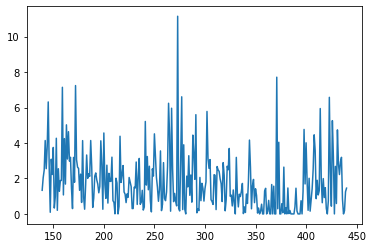

In [1360]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

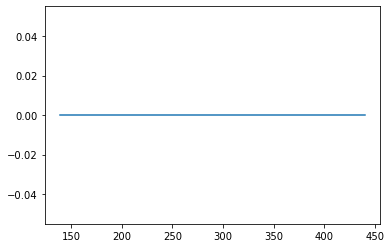

In [1361]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [1362]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     16701397.0       0  LINESTRING (444681.769 163610.749, 444681.379 ...   
1     16701397.0       0  LINESTRING (445017.959 164131.182, 445046.605 ...   
2     16701397.0       0  LINESTRING (444453.666 163879.417, 444489.211 ...   
3     16701397.0       0  LINESTRING (443860.777 163743.376, 443866.928 ...   
4     16701397.0       0  LINESTRING (445124.854 164861.498, 445118.070 ...   

      slope  index_right  
0  6.357119           10  
1  2.415740           10  
2  1.068875           10  
3  4.623802           10  
4  1.648758           10

In [1363]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
139     34764115.0       1  LINESTRING (441660.798 163964.844, 441566.651 ...   
140     34764115.0       1  LINESTRING (441362.647 164652.176, 441415.011 ...   
141     34764115.0       1  LINESTRING (441903.533 164185.797, 441823.325 ...   
142     34764115.0       1  LINESTRING (441338.149 164511.072, 441347.397 ...   
143     34764115.0       1  LINESTRING (441114.680 165006.178, 441088.370 ...   

     slope  index_right  
139    0.0           24  
140    0.0           24  
141    0.0           24  
142    0.0           24  
143    0.0           24

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

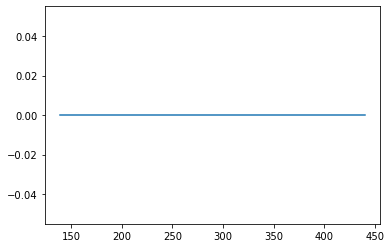

In [1364]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [1365]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0   16701397.0  2.227619
1   34764115.0  0.000000
2   51062797.0  2.169738
3   55186886.0  2.000994
4  156886419.0  2.271259

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [1366]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1367]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [1368]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [1369]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [1370]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [1371]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [1372]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [1373]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/portland/KPDX/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [1374]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/charlotte_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        65.8        59       65     59.7       50       96     81.4       58   
1        54.7        50       50     48.0       44      100     78.8       69   
2        52.0        48       54     51.2       48      100     97.0       90   
3        55.6        53       60     54.7       49      100     97.1       80   
4        52.0        44       41     38.2       35       85     61.9       35   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      50.2        35       50     42.8       33       93     77.4       60   
361      57.3        44       55     48.9       41       93     75.2       53   
362      64.1        60       64     61.1       55       93     89.9       75   
363      64.2        51       63     48.4       30       87     60.2       23   
364      47.8        38       34     31.2       29       76     54.3       33   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0          17       8.3         3      29.4      29.3      29.2   
1          10       5.0         0      29.4      29.4      29.3   
2           6       2.5         0      29.3      29.2      29.2   
3          18       7.3         3      29.2      29.1      28.8   
4          17      10.8         3      29.2      29.0      28.8   
..        ...       ...       ...       ...       ...       ...   
360         7       2.1         0      29.5      29.5      29.4   
361         8       3.1         0      29.5      29.4      29.4   
362        17      10.3         5      29.4      29.2      29.0   
363        21      14.1         8      29.0      28.9      28.9   
364        14       7.8         3      29.1      29.1      29.0   

     Precipitation        Date  
0             0.13    2019-1-1  
1             0.00    2019-1-2  
2             0.53    2019-1-3  
3             0.31    2019-1-4  
4             0.61    2019-1-5  
..             ...         ...  
360           0.00  2019-12-27  
361           0.00  2019-12-28  
362           0.18  2019-12-29  
363           0.09  2019-12-30  
364           0.00  2019-12-31  

[365 rows x 16 columns]

In [1375]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0        65.8     81.4           0.13
1        54.7     78.8           0.00
2        52.0     97.0           0.53
3        55.6     97.1           0.31
4        52.0     61.9           0.61
..        ...      ...            ...
360      50.2     77.4           0.00
361      57.3     75.2           0.00
362      64.1     89.9           0.18
363      64.2     60.2           0.09
364      47.8     54.3           0.00

[365 rows x 3 columns]

In [1376]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [1377]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [1378]:
output_weather2.isnull().values.any()

False

In [1379]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         63.593151
Hum_avg          65.583288
Precipitation     0.148247
dtype: float64

# Aggregate all output together in a dataframe

In [1380]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_bikecom,output_lane,output_intersection_density1a,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope]

In [1381]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')

In [1382]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

In [1383]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740   
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205   
3   34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   
4  322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0   1236.0     4761.673078      45.640361                     0.958494  ...   
1    740.0     3586.397680      20.180421                     0.562693  ...   
2    328.0     1825.832244      10.826223                     0.592947  ...   
3   2049.0     5063.443216      71.253703                     1.407218  ...   
4   1443.0     2119.666792      20.442083                     0.964401  ...   

   Median Age Median_HH_income   HH_density  population_density  \
0  607.955056     20574.782586  3068.733545         5742.104249   
1  446.481673     19789.327868  2433.464934         4860.795632   
2  362.297740     76283.977968  1807.480423         4645.721546   
3  511.337351     25721.806787  3664.976065         6074.181206   
4  307.900010     18916.017561  1850.983611         3190.011736   

   employment_density  Number of jobs     slope   Temp_avg   Hum_avg   \
0         4182.670960     9205.527589  2.000994  63.593151  65.583288   
1         3518.355867     4335.227267  2.227619  63.593151  65.583288   
2         2243.874641     1320.287803       NaN  63.593151  65.583288   
3         4938.368981    62897.739697  0.000000  63.593151  65.583288   
4         2056.064785    29861.668301  2.439724  63.593151  65.583288   

   Precipitation  
0       0.148247  
1       0.148247  
2       0.148247  
3       0.148247  
4       0.148247  

[5 rows x 85 columns]

In [1384]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_2019_updated_Charlotte_0.75_mile_network_buffer_data.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [1385]:
# Make dynamic visualization
#!pip install keplergl

In [1386]:
ecoshort.head(5)

site_id           site_name sensor_type  year     region  travel_pattern  \
0   P001CHA     Blue Line Trail   permanent  2019  Charlotte             3.0   
7   P002CHA           Pecan Ave   permanent  2019  Charlotte             3.0   
14  P003CHA       Selwyn Avenue   permanent  2019  Charlotte             3.0   
21  P004CHA  South Tryon Street   permanent  2019  Charlotte             1.0   
28  P005CHA    Stonewall Street   permanent  2019  Charlotte             2.0   

         AADBT    stv_adb  stv_c_adb  stl_raw  ...  osm_id_sensor  buff_dist  \
0   393.654456  18.547945   5.958904   1236.0  ...     55186886.0        2.0   
7   160.742460  16.082192   4.602740    740.0  ...     16701397.0        2.0   
14   39.364881  15.465753   2.945205    328.0  ...    493705004.0        2.0   
21  149.292520  11.630137   4.780822   2049.0  ...     34764115.0        2.0   
28   33.307341   2.438356   1.136986   1443.0  ...    322993730.0        2.0   

                         geometry  min_dist_to_school min_dist_to_college  \
0   POINT (440167.090 163506.089)         2421.857994         9586.368741   
7   POINT (444442.876 164385.527)         1687.108336         4478.048087   
14  POINT (442277.682 160005.150)         3001.458672        14595.415186   
21  POINT (441173.175 164818.677)         2534.811945         5169.515202   
28  POINT (442252.867 164026.406)         2069.054243         2614.970164   

   min_dist_to_university  lanes  maxspeed  min_dist_to_polygon  \
0             8278.354216      4      35.0          2394.550560   
7             7268.572020      2      25.0          2779.921585   
14            3924.702931      2      25.0          5021.429426   
21            3389.043815      2      20.0          3298.256658   
28            5081.975065      2      25.0          2179.475405   

   min_dist_to_CBD  
0      8219.960278  
7      7242.577692  
14    15882.995661  
21     3645.426147  
28     2691.820923  

[5 rows x 23 columns]

In [1387]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epsg:3358


In [1388]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:3358")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D.head()

osm_id_sensor                    geometry
0      55186886.0  POINT (-80.86114 35.20964)
7      16701397.0  POINT (-80.81436 35.21828)
14    493705004.0  POINT (-80.83725 35.17844)
21     34764115.0  POINT (-80.85036 35.22164)
28    322993730.0  POINT (-80.83834 35.21468)

In [1389]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor       Lon       Lat
0      55186886.0 -80.86114  35.20964
7      16701397.0 -80.81436  35.21828
14    493705004.0 -80.83725  35.17844
21     34764115.0 -80.85036  35.22164
28    322993730.0 -80.83834  35.21468

In [1390]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [1391]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:3358")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:3358


osm_id_sensor       Lon       Lat  \
0     55186886.0 -80.86114  35.20964   
1     16701397.0 -80.81436  35.21828   
2    493705004.0 -80.83725  35.17844   
3     34764115.0 -80.85036  35.22164   
4    322993730.0 -80.83834  35.21468   

                                            geometry  
0  POLYGON ((-80.86636 35.20117, -80.86638 35.201...  
1  POLYGON ((-80.81529 35.20944, -80.81535 35.209...  
2  POLYGON ((-80.84123 35.16847, -80.84128 35.168...  
3  POLYGON ((-80.84763 35.21314, -80.84763 35.213...  
4  POLYGON ((-80.83671 35.20392, -80.83678 35.203...

In [1392]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740   
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205   
3   34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   
4  322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0   1236.0     4761.673078      45.640361                     0.958494  ...   
1    740.0     3586.397680      20.180421                     0.562693  ...   
2    328.0     1825.832244      10.826223                     0.592947  ...   
3   2049.0     5063.443216      71.253703                     1.407218  ...   
4   1443.0     2119.666792      20.442083                     0.964401  ...   

   employment_density Number of jobs     slope   Temp_avg   Hum_avg   \
0         4182.670960    9205.527589  2.000994  63.593151  65.583288   
1         3518.355867    4335.227267  2.227619  63.593151  65.583288   
2         2243.874641    1320.287803       NaN  63.593151  65.583288   
3         4938.368981   62897.739697  0.000000  63.593151  65.583288   
4         2056.064785   29861.668301  2.439724  63.593151  65.583288   

   Precipitation  osm_id_sensor       Lon       Lat  \
0       0.148247     55186886.0 -80.86114  35.20964   
1       0.148247     16701397.0 -80.81436  35.21828   
2       0.148247    493705004.0 -80.83725  35.17844   
3       0.148247     34764115.0 -80.85036  35.22164   
4       0.148247    322993730.0 -80.83834  35.21468   

                                            geometry  
0  POLYGON ((-80.86636 35.20117, -80.86638 35.201...  
1  POLYGON ((-80.81529 35.20944, -80.81535 35.209...  
2  POLYGON ((-80.84123 35.16847, -80.84128 35.168...  
3  POLYGON ((-80.84763 35.21314, -80.84763 35.213...  
4  POLYGON ((-80.83671 35.20392, -80.83678 35.203...  

[5 rows x 89 columns]

In [1393]:
#buffer_vis=gdf1.loc[:,['osm_id_sensor','geometry']]
#buffer_vis.columns=['osm_id','geometry']
#buffer_vis

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1394]:
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_2019_Network_buffer_0.75_mile_eco_short_Charlotte.csv', sep=',', na_rep='0', index=False)


In [1395]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [1396]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

In [1397]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [1398]:
#df_dynamic1.dtypes

In [1399]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [1400]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Charellote/Charlotte/keplergl_2019_Network_buffer_0.75_mile_eco_short_Charlotte.csv")
data=data.fillna(0)
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0    551868…

In [1401]:
data.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0   55186886.0  P001CHA   permanent  393.654456  18.547945   5.958904   
1   16701397.0  P002CHA   permanent  160.742460  16.082192   4.602740   
2  493705004.0  P003CHA   permanent   39.364881  15.465753   2.945205   
3   34764115.0  P004CHA   permanent  149.292520  11.630137   4.780822   
4  322993730.0  P005CHA   permanent   33.307341   2.438356   1.136986   

   stl_raw  Total Commuter  Bike Commuter  Percentage of Bike Commuter  ...  \
0   1236.0     4761.673078      45.640361                     0.958494  ...   
1    740.0     3586.397680      20.180421                     0.562693  ...   
2    328.0     1825.832244      10.826223                     0.592947  ...   
3   2049.0     5063.443216      71.253703                     1.407218  ...   
4   1443.0     2119.666792      20.442083                     0.964401  ...   

   employment_density  Number of jobs     slope   Temp_avg   Hum_avg   \
0         4182.670960     9205.527589  2.000994  63.593151  65.583288   
1         3518.355867     4335.227267  2.227619  63.593151  65.583288   
2         2243.874641     1320.287803  0.000000  63.593151  65.583288   
3         4938.368981    62897.739697  0.000000  63.593151  65.583288   
4         2056.064785    29861.668301  2.439724  63.593151  65.583288   

   Precipitation  osm_id_sensor       Lon       Lat  \
0       0.148247     55186886.0 -80.86114  35.20964   
1       0.148247     16701397.0 -80.81436  35.21828   
2       0.148247    493705004.0 -80.83725  35.17844   
3       0.148247     34764115.0 -80.85036  35.22164   
4       0.148247    322993730.0 -80.83834  35.21468   

                                            geometry  
0  POLYGON ((-80.86635941159237 35.20116856492148...  
1  POLYGON ((-80.81529217418218 35.20943671475373...  
2  POLYGON ((-80.84123447309305 35.16846529610708...  
3  POLYGON ((-80.84762800386537 35.21313591018728...  
4  POLYGON ((-80.83671328331037 35.20391950487311...  

[5 rows x 89 columns]

In [1402]:
# save as htm file
map_2.save_to_html(file_name="Eco_short_Charlotte_keplergl_network_0.75_mile_buffer19.html")

Map saved to Eco_short_Charlotte_keplergl_network_0.75_mile_buffer19.html!


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1403]:
#conda list ipython

In [1404]:
end = time.time()
print("Tune Fit Time:", end - start)

Tune Fit Time: 1622.2109699249268


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT